# House keeping

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from pathlib import Path
from typing import List, Union, Dict, Optional
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_folder = Path(r"/content/drive/MyDrive/Polymer_Scattering _ML/Excel files/main_dataset/")

In [3]:
raw_data_dir = data_folder/"Rh distribution.csv"
print(f"does it exist: {data_folder.exists()}, {raw_data_dir}")
raw_rh_data = pd.read_csv(raw_data_dir)

does it exist: True, /content/drive/MyDrive/Polymer_Scattering _ML/Excel files/main_dataset/Rh distribution.csv


In [4]:
pls_data_clean_dir = data_folder/"dataset_wo_block_cp_(fp-hsp)_added_additive_dropped_polyHSP_dropped.pkl"
print(f"does it exist: {pls_data_clean_dir.exists()}, {pls_data_clean_dir}")
pls_data_cleaned = pd.read_pickle(pls_data_clean_dir)

does it exist: True, /content/drive/MyDrive/Polymer_Scattering _ML/Excel files/main_dataset/dataset_wo_block_cp_(fp-hsp)_added_additive_dropped_polyHSP_dropped.pkl


# Rh distribution handling

In [5]:
rh_data = raw_rh_data[["index to extract",	"derived Rh (nm)",	"normalized intensity (0-1)"]].copy()

In [6]:
rh_data

index to extract  derived Rh (nm)  normalized intensity (0-1)
0                  3.0            2.562                       0.071
1                  3.0            3.520                       0.290
2                  3.0            4.826                       0.468
3                  3.0            5.896                       0.790
4                  3.0            8.571                       0.759
...                ...              ...                         ...
8390             902.0          136.560                      -4.780
8391             902.0          148.910                      -4.920
8392             902.0          177.060                      -4.950
8393             902.0          203.360                      -4.990
8394             902.0          221.750                      -5.000

[8395 rows x 3 columns]

## illustrations

In [7]:
grouped_rh_data = rh_data.groupby("index to extract").agg({
    "derived Rh (nm)": lambda x: list(x),
    "normalized intensity (0-1)": lambda x: list(x)
}).reset_index()

In [8]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [9]:
grouped_rh_data['normalized intensity (0-1) corrected'] = grouped_rh_data['normalized intensity (0-1)'].apply(
    lambda x: scaler.fit_transform(np.array(x).reshape(-1, 1)).flatten()
)

In [10]:
grouped_rh_data

index to extract                                    derived Rh (nm)  \
0                 3.0  [2.562, 3.52, 4.826, 5.896, 8.571, 11.302, 15....   
1                 4.0  [1.218, 1.769, 2.57, 3.734, 5.425, 7.881, 11.0...   
2                 5.0  [1.369, 1.976, 2.851, 4.157, 5.979, 8.794, 12....   
3                 6.0  [5.696, 8.875, 11.846, 17.209, 25.002, 36.323,...   
4                 7.0  [16.339, 26.249, 42.89, 67.746, 110.692, 177.8...   
..                ...                                                ...   
291             898.0  [42.81, 54.56, 64.87, 71.97, 87.07, 105.33, 11...   
292             899.0  [9.83, 11.69, 12.97, 15.42, 18.33, 22.18, 28.2...   
293             900.0  [12.97, 16.24, 19.64, 25.91, 30.28, 33.02, 38....   
294             901.0  [11.69, 13.66, 15.96, 18.65, 19.99, 22.18, 23....   
295             902.0  [11.29, 12.31, 14.89, 15.69, 17.1, 20.34, 22.1...   

                            normalized intensity (0-1)  \
0    [0.071, 0.29, 0.468, 0.79, 0.759, 0.528, 0.302...   
1    [0.008, 0.009, 0.031, 0.131, 0.301, 0.306, 0.1...   
2    [0.007, 0.008, 0.004, 0.012, 0.095, 0.144, 0.0...   
3    [0.008, 0.042, 0.038, 0.034, 0.019, 0.022, 0.0...   
4    [0.026, 0.031, 0.035, 0.115, 0.087, 0.038, 0.0...   
..                                                 ...   
291  [-0.92, -0.93, -0.92, -0.86, -0.75, -0.67, -0....   
292  [-1.96, -1.96, -1.94, -1.88, -1.88, -1.93, -1....   
293  [-3.0, -3.0, -2.99, -2.96, -2.81, -2.66, -2.54...   
294  [-3.98, -3.96, -3.96, -3.93, -3.79, -3.67, -3....   
295  [-4.99, -4.98, -4.91, -4.85, -4.69, -4.73, -4....   

                  normalized intensity (0-1) corrected  
0    [0.053125, 0.28125, 0.46666666666666673, 0.802...  
1    [0.0, 0.0010101010101010097, 0.023232323232323...  
2    [0.04004004004004005, 0.041041041041041046, 0....  
3    [0.0, 0.03472931562819203, 0.03064351378958120...  
4    [0.0, 0.004608294930875577, 0.0082949308755760...  
..                                                 ...  
291  [0.0235294117647058, 0.0117647058823529, 0.023...  
292  [0.06097560975609717, 0.06097560975609717, 0.0...  
293  [0.0, 0.0, 0.011904761904761862, 0.04761904761...  
294  [0.0, 0.02631578947368407, 0.02631578947368407...  
295  [0.013333333333332753, 0.026666666666665506, 0...  

[296 rows x 4 columns]

In [11]:

# for idx, (rh_values, intensity_values) in enumerate(zip(grouped_rh_data['derived Rh (nm)'], grouped_rh_data['normalized intensity (0-1)'])):
#     index_label = grouped_rh_data['index to extract'][idx]
#     plt.figure(figsize=(10, 6))

#     plt.plot(rh_values, intensity_values, marker='o', linestyle='-', color='b', label=index_label)
#     plt.xlabel("Rh (nm)")
#     plt.ylabel("Normalized Intensity (0-1)")
#     plt.title("Hydrodynamic Radius (Rh) vs. Normalized Intensity")
#     plt.yscale("linear")  # or "log" if you need a log scale for intensity
#     plt.xscale("log")  # assuming you want Rh on a log scale, as suggested by the plot you've shown
#     plt.legend()
#     plt.show()

In [12]:
# # min max applied
for idx, (rh_values, intensity_values) in enumerate(zip(grouped_rh_data['derived Rh (nm)'], grouped_rh_data['normalized intensity (0-1) corrected'])):
    index_label = grouped_rh_data['index to extract'][idx]
    plt.figure(figsize=(10, 6))

    plt.plot(rh_values, intensity_values, marker='o', linestyle='-', color='b', label=index_label)
    plt.xlabel("Rh (nm)")
    plt.ylabel("Normalized Intensity (0-1)")
    plt.title("Hydrodynamic Radius (Rh) vs. Normalized Intensity")
    plt.yscale("linear")  # or "log" if you need a log scale for intensity
    plt.xscale("log")  # assuming you want Rh on a log scale, as suggested by the plot you've shown
    plt.legend()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
def intensity_weighted_average(R_h: np.ndarray, I: np.ndarray) -> float:
    # Ensure R_h and I are numpy arrays for element-wise operations
    R_h = np.array(R_h)
    I = np.array(I)

    # Intensity-weighted average of hydrodynamic radius
    weighted_avg = np.sum(R_h * I) / np.sum(I)

    return weighted_avg

In [14]:
def intensity_weighted_average_over_log(R_h: np.ndarray, I: np.ndarray) -> float:
    # Ensure R_h and I are numpy arrays for element-wise operations
    R_h = np.array(R_h)
    I = np.array(I)

    # Intensity-weighted average of hydrodynamic radius
    weighted_avg = np.sum(np.log10(R_h) * I) / np.sum(I)
    Rh_derived = 10**weighted_avg
    return Rh_derived

In [15]:
grouped_rh_data["intensity weighted average Rh (nm)"] = grouped_rh_data.apply(
        lambda row: intensity_weighted_average(row['derived Rh (nm)'], row['normalized intensity (0-1) corrected']),
    axis=1)


In [16]:
grouped_rh_data["intensity weighted average over log(Rh (nm))"] = grouped_rh_data.apply(
        lambda row: intensity_weighted_average_over_log(row['derived Rh (nm)'], row['normalized intensity (0-1) corrected']),
    axis=1)


In [17]:
grouped_rh_data

index to extract                                    derived Rh (nm)  \
0                 3.0  [2.562, 3.52, 4.826, 5.896, 8.571, 11.302, 15....   
1                 4.0  [1.218, 1.769, 2.57, 3.734, 5.425, 7.881, 11.0...   
2                 5.0  [1.369, 1.976, 2.851, 4.157, 5.979, 8.794, 12....   
3                 6.0  [5.696, 8.875, 11.846, 17.209, 25.002, 36.323,...   
4                 7.0  [16.339, 26.249, 42.89, 67.746, 110.692, 177.8...   
..                ...                                                ...   
291             898.0  [42.81, 54.56, 64.87, 71.97, 87.07, 105.33, 11...   
292             899.0  [9.83, 11.69, 12.97, 15.42, 18.33, 22.18, 28.2...   
293             900.0  [12.97, 16.24, 19.64, 25.91, 30.28, 33.02, 38....   
294             901.0  [11.69, 13.66, 15.96, 18.65, 19.99, 22.18, 23....   
295             902.0  [11.29, 12.31, 14.89, 15.69, 17.1, 20.34, 22.1...   

                            normalized intensity (0-1)  \
0    [0.071, 0.29, 0.468, 0.79, 0.759, 0.528, 0.302...   
1    [0.008, 0.009, 0.031, 0.131, 0.301, 0.306, 0.1...   
2    [0.007, 0.008, 0.004, 0.012, 0.095, 0.144, 0.0...   
3    [0.008, 0.042, 0.038, 0.034, 0.019, 0.022, 0.0...   
4    [0.026, 0.031, 0.035, 0.115, 0.087, 0.038, 0.0...   
..                                                 ...   
291  [-0.92, -0.93, -0.92, -0.86, -0.75, -0.67, -0....   
292  [-1.96, -1.96, -1.94, -1.88, -1.88, -1.93, -1....   
293  [-3.0, -3.0, -2.99, -2.96, -2.81, -2.66, -2.54...   
294  [-3.98, -3.96, -3.96, -3.93, -3.79, -3.67, -3....   
295  [-4.99, -4.98, -4.91, -4.85, -4.69, -4.73, -4....   

                  normalized intensity (0-1) corrected  \
0    [0.053125, 0.28125, 0.46666666666666673, 0.802...   
1    [0.0, 0.0010101010101010097, 0.023232323232323...   
2    [0.04004004004004005, 0.041041041041041046, 0....   
3    [0.0, 0.03472931562819203, 0.03064351378958120...   
4    [0.0, 0.004608294930875577, 0.0082949308755760...   
..                                                 ...   
291  [0.0235294117647058, 0.0117647058823529, 0.023...   
292  [0.06097560975609717, 0.06097560975609717, 0.0...   
293  [0.0, 0.0, 0.011904761904761862, 0.04761904761...   
294  [0.0, 0.02631578947368407, 0.02631578947368407...   
295  [0.013333333333332753, 0.026666666666665506, 0...   

     intensity weighted average Rh (nm)  \
0                            172.704610   
1                            460.991569   
2                            297.111362   
3                            523.358769   
4                            805.773279   
..                                  ...   
291                         1909.602113   
292                         1280.309694   
293                          186.810855   
294                           84.016143   
295                           89.534537   

     intensity weighted average over log(Rh (nm))  
0                                       56.731922  
1                                      136.045562  
2                                      161.773713  
3                                      275.191877  
4                                      713.829646  
..                                            ...  
291                                   1153.716886  
292                                    680.713065  
293                                    151.764113  
294                                     64.200267  
295                                     75.413214  

[296 rows x 6 columns]

In [18]:
# grouped_rh_data.set_index('index to extract', inplace=True)

In [19]:
# grouped_rh_data.to_pickle(data_folder/"Rh distribution-intensity weighted.pkl")

# Data Analysis

## mapping

In [20]:
pls_data_folder = Path(r"/content/drive/MyDrive/Polymer_Scattering _ML/Excel files/visualization data/")

In [21]:
pls_data_dir = data_folder/"Polymer_Solution_Scattering_Dataset.xlsx"
pls_data = pd.read_excel(pls_data_dir, sheet_name='Main_dataset')
print(f"does it exist: {pls_data_folder.exists()}, {pls_data_dir}")


does it exist: True, /content/drive/MyDrive/Polymer_Scattering _ML/Excel files/main_dataset/Polymer_Solution_Scattering_Dataset.xlsx


In [22]:
pls_mapped = pls_data.copy()
grouped_rh_data_s=grouped_rh_data.copy()

In [23]:
def map_intensity_weighted_rh(index, rh_data, main_data, columns):
    """
    Map values from `rh_data` to `main_data` for given columns, with fallback logic.

    Parameters:
        index: Index of the row in `main_data`.
        rh_data: DataFrame containing reference data.
        main_data: DataFrame containing the main data.
        columns: List of column names to map.

    Returns:
        A dictionary of values for the specified columns.
    """
    results = {}
    for col in columns:
        if index in rh_data.index:
            # If the index exists in `rh_data`, return its value for the column
            results[col] = rh_data.loc[index, col]
        else:
            # If no match and specific columns, return fallback value
            if col in ['intensity weighted average Rh (nm)', 'intensity weighted average over log(Rh (nm))']:
                results[col] = main_data.at[index, 'Rh1 (nm)']
            else:
                results[col] = np.nan
    return results


In [24]:
Rh_columns_to_map = [
    'intensity weighted average over log(Rh (nm))',
    'intensity weighted average Rh (nm)',
    'derived Rh (nm)',
    'normalized intensity (0-1) corrected'
]


In [25]:
# # grouped_rh_data.set_index('index to extract', inplace=True)
# def map_intensity_weighted_rh(index, rh_data, main_data,column):
#     # Check if the index exists in rh_dataset
#     if index in rh_data.index:
#         return rh_data.loc[index, column]
#     else:
#         # If no match, return the previous value from 'Rh1 (nm)'
#         return main_data.at[index, 'Rh1 (nm)']

# # Apply the function to each index in main_dataset
# pls_mapped['intensity weighted average Rh (nm)'] = pls_mapped.index.to_series().apply(
#     map_intensity_weighted_rh, args=(grouped_rh_data, pls_mapped,'intensity weighted average Rh (nm)')
# )

# pls_mapped['intensity weighted average over log(Rh (nm))'] = pls_mapped.index.to_series().apply(
#     map_intensity_weighted_rh, args=(grouped_rh_data, pls_mapped,'intensity weighted average over log(Rh (nm))'))


In [26]:
# mapped_values = pls_mapped.index.to_series().apply(
#     map_intensity_weighted_rh, args=(grouped_rh_data_s, pls_mapped, Rh_columns_to_map)
# )

# # Convert the result (a series of dictionaries) into a DataFrame
# mapped_values_df = pd.DataFrame(list(mapped_values))

# # Merge the new columns back into the main dataset
# pls_mapped = pd.concat([pls_mapped, mapped_values_df], axis=1)

In [27]:
# pls_mapped

In [28]:
# pls_mapped[['name',    "DLS Angle (deg)",
#     "Concentration (mg/ml)",
#     "Temperature SANS/SLS/DLS/SEC (K)",
#     "Aging time (hour)",
#     "To Aging Temperature (K)",
#     "Stirring /sonication/heating time(min)",
#     "Sonication time (min)",
#     "Sonication/Stirring/heating Temperature (K)",
#     "storage temperature (K)",
#     "Storage time (hour)",
#     "Solvent(s)",
#     "Deuterated solvent","Rh1 (nm)", "intensity weighted average Rh (nm)",'intensity weighted average over log(Rh (nm))','Doi','Lp (nm)']].loc[61:92]

In [29]:
pls_data_cleaned['derived Rh (nm)']

0                                                    NaN
1                                                    NaN
2                                                    NaN
3      [2.562, 3.52, 4.826, 5.896, 8.571, 11.302, 15....
4      [1.218, 1.769, 2.57, 3.734, 5.425, 7.881, 11.0...
                             ...                        
735    [42.81, 54.56, 64.87, 71.97, 87.07, 105.33, 11...
736    [9.83, 11.69, 12.97, 15.42, 18.33, 22.18, 28.2...
737    [12.97, 16.24, 19.64, 25.91, 30.28, 33.02, 38....
738    [11.69, 13.66, 15.96, 18.65, 19.99, 22.18, 23....
739    [11.29, 12.31, 14.89, 15.69, 17.1, 20.34, 22.1...
Name: derived Rh (nm), Length: 740, dtype: object

In [30]:
pls_data_cleaned.columns.to_list()

['name',
 'Mw (g/mol)',
 'Mn (g/mol)',
 'PDI',
 'Regioregularity R%',
 'DP',
 'SANS',
 'SAXS/GWAXS',
 'DLS',
 'SLS',
 'SEC (GPC)',
 'DLS Angle (deg)',
 'Concentration (mg/ml)',
 'Temperature SANS/SLS/DLS/SEC (K)',
 'Dark/light',
 'Applied Electrical Field (Kv/cm)',
 'Duration of Applied Electrical Field (min)',
 'Aging type',
 'Aging time (hour)',
 'Aging temp (K)',
 'Sonic/stir (bool)',
 'E field (kV/cm)',
 'Illumination (lux)',
 'Aging time (hour).1',
 'To Aging Temperature (K)',
 'Stirring /heating time(min)',
 'Sonication time (min)',
 'Sonication/Stirring/heating Temperature (K)',
 'storage temperature (K)',
 'Storage time (hour)',
 'Solvent(s)',
 'Deuterated solvent',
 'Solid additive',
 'Solid additive quantity (mg/ml)',
 'Solvent solubility parameter (Hansen)',
 'Polymer solubility parameter ',
 'Polymer solubility parameter 𝛿d [MPa1/2]',
 'Polymer solubility parameter  𝛿p [MPa1/2]',
 'Polymer solubility parameter 𝛿h [MPa1/2]',
 'Rh1 (nm)',
 'I1 (Normalized 1-0)',
 'Rh2 (nm)',


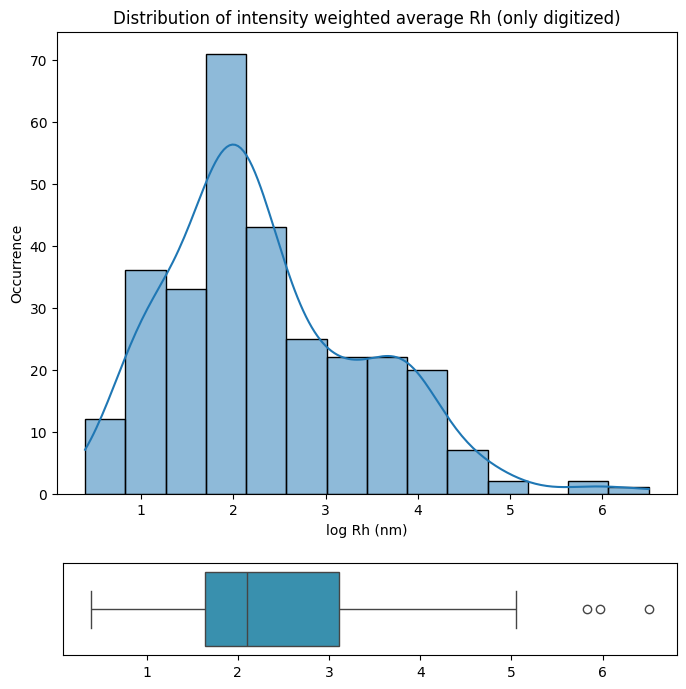

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with KDE
sns.histplot(np.log10(grouped_rh_data['intensity weighted average Rh (nm)']), kde=True, ax=ax)  # kde=True adds a KDE line to the histogram
ax.set_xlabel('log Rh (nm)')  # Set the label for x-axis
ax.set_ylabel('Occurrence')    # Set the label for y-axis
ax.set_title('Distribution of intensity weighted average Rh (only digitized)')  # Set the title for the plot

# Create inset box plot
box_inset = ax.inset_axes([0.01, -0.35, 0.99, 0.2])  # Adjust position for the inset box plot
sns.boxplot(x=np.log10(grouped_rh_data['intensity weighted average Rh (nm)']), ax=box_inset, color='#259AC1')

# Customize the inset box plot
box_inset.set(yticks=[], xlabel=None)  # Remove y-ticks and x-label from the box plot
box_inset.tick_params(axis='x', labelsize=10)

# Display the plot
plt.show()

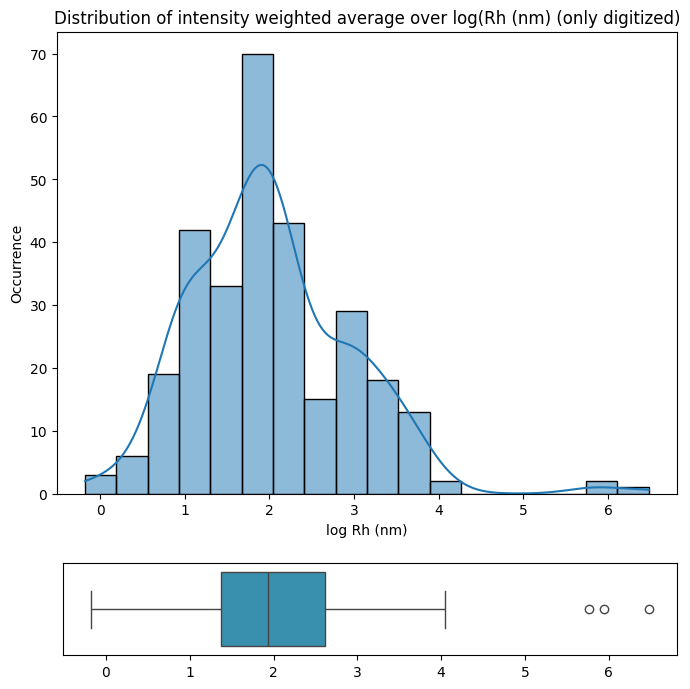

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with KDE
sns.histplot(np.log10(grouped_rh_data['intensity weighted average over log(Rh (nm))']), kde=True, ax=ax)  # kde=True adds a KDE line to the histogram
ax.set_xlabel('log Rh (nm)')  # Set the label for x-axis
ax.set_ylabel('Occurrence')    # Set the label for y-axis
ax.set_title('Distribution of intensity weighted average over log(Rh (nm) (only digitized)')  # Set the title for the plot

# Create inset box plot
box_inset = ax.inset_axes([0.01, -0.35, 0.99, 0.2])  # Adjust position for the inset box plot
sns.boxplot(x=np.log10(grouped_rh_data['intensity weighted average over log(Rh (nm))']), ax=box_inset, color='#259AC1')

# Customize the inset box plot
box_inset.set(yticks=[], xlabel=None)  # Remove y-ticks and x-label from the box plot
box_inset.tick_params(axis='x', labelsize=10)

# Display the plot
plt.show()

## Distribution

##PLS pristine dataset analysis

### PLS-xlxs dataset (pristine)

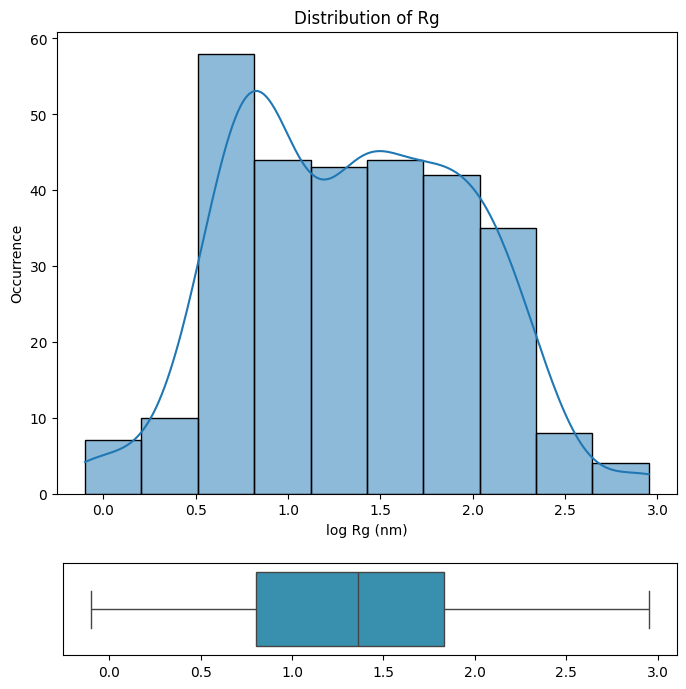

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with KDE
sns.histplot(np.log10(pls_data['Rg1 (nm)']), kde=True, ax=ax)  # kde=True adds a KDE line to the histogram
ax.set_xlabel('log Rg (nm)')  # Set the label for x-axis
ax.set_ylabel('Occurrence')    # Set the label for y-axis
ax.set_title('Distribution of Rg')  # Set the title for the plot

# Create inset box plot
box_inset = ax.inset_axes([0.01, -0.35, 0.99, 0.2])  # Adjust position for the inset box plot
sns.boxplot(x=np.log10(pls_data['Rg1 (nm)']), ax=box_inset, color='#259AC1')

# Customize the inset box plot
box_inset.set(yticks=[], xlabel=None)  # Remove y-ticks and x-label from the box plot
box_inset.tick_params(axis='x', labelsize=10)

# Display the plot
plt.show()

In [34]:
rh_values = pls_mapped['Rh1 (nm)'].dropna()  # Remove NaN values
rh_values = rh_values[rh_values > 0]  # Keep only positive values, as log10 is undefined for non-positive numbers

# Now plot with the filtered values
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with KDE
sns.histplot(np.log10(rh_values), kde=True, ax=ax)
ax.set_xlabel('log Rh (nm)')
ax.set_ylabel('Occurrence')
ax.set_title('Distribution of Rh (before digitizing)')

# Create inset box plot
box_inset = ax.inset_axes([0.01, -0.35, 0.99, 0.2])
sns.boxplot(x=np.log10(rh_values), ax=box_inset, color='#259AC1')

# Customize the inset box plot
box_inset.set(yticks=[], xlabel=None)
box_inset.tick_params(axis='x', labelsize=10)

# Display the plot
plt.show()

TypeError: '>' not supported between instances of 'str' and 'int'

In [35]:
pls_data['intensity weighted Rh (nm)']

KeyError: 'intensity weighted Rh (nm)'

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with KDE
sns.histplot(np.log10(pls_data['intensity weighted Rh (nm)']), kde=True, ax=ax)  # kde=True adds a KDE line to the histogram
ax.set_xlabel('log Rh (nm)')  # Set the label for x-axis
ax.set_ylabel('Occurrence')    # Set the label for y-axis
ax.set_title('Distribution of intensity weighted Rh (after processing)')  # Set the title for the plot

# Create inset box plot
box_inset = ax.inset_axes([0.01, -0.35, 0.99, 0.2])  # Adjust position for the inset box plot
sns.boxplot(x=np.log10(pls_data['intensity weighted Rh (nm)']), ax=box_inset, color='#259AC1')

# Customize the inset box plot
box_inset.set(yticks=[], xlabel=None)  # Remove y-ticks and x-label from the box plot
box_inset.tick_params(axis='x', labelsize=10)

# Display the plot
plt.show()

In [ ]:
# higher_1000_before_digi = len(pls_data[pls_data['Rh1 (nm)']>1000])
# higher_1000_after_digi = len(pls_data[pls_data['intensity weighted Rh (nm)']>1000])
# higher_1000_digitized_data = len(grouped_rh_data[grouped_rh_data['intensity weighted average Rh (nm)']>1000])

## PLS cleaned data

### initial data analysis

In [36]:
analysis_data =pls_data_cleaned[["name", "DLS Angle (deg)",
    "Concentration (mg/ml)",
    "Temperature SANS/SLS/DLS/SEC (K)",
    "Aging time (hour)",
    "To Aging Temperature (K)",
    "Stirring /heating time(min)",
    "Sonication time (min)",
    "Sonication/Stirring/heating Temperature (K)",
    "storage temperature (K)",
    "Storage time (hour)",
    "Solvent(s)",
    "Deuterated solvent","Rh1 (nm)", "intensity weighted average Rh (nm)",'Rh (IW avg log)','Doi','Lp (nm)']].copy()


In [37]:
digitized_data_after_mapped_to_clean_dataset = pls_data_cleaned[pls_data_cleaned['matched index'].notna()]

In [38]:
type(digitized_data_after_mapped_to_clean_dataset['normalized intensity (0-1) corrected'].loc[3])

numpy.ndarray

In [39]:
pls_dataset_Rh_without_plot = pls_data_cleaned[pls_data_cleaned['matched index'].isna()]

In [40]:
digitized_data_after_mapped_to_clean_dataset[digitized_data_after_mapped_to_clean_dataset['Rh (IW avg log)']>10000]['Rh (IW avg log)']

102    1.034870e+04
104    1.103287e+04
280    5.783660e+05
281    8.747589e+05
282    3.032654e+06
Name: Rh (IW avg log), dtype: float64

In [41]:
pls_dataset_Rh_without_plot[pls_dataset_Rh_without_plot['Rh (IW avg log)']>10000]['Rh (IW avg log)']

158    50000.0
Name: Rh (IW avg log), dtype: float64

In [42]:
analysis_data[analysis_data['Rh (IW avg log)']>10000]['Rh (IW avg log)']

102    1.034870e+04
104    1.103287e+04
158    5.000000e+04
280    5.783660e+05
281    8.747589e+05
282    3.032654e+06
Name: Rh (IW avg log), dtype: float64

In [43]:
def plot_single_distribution_plot(data: pd.DataFrame,
                                  feature: str,
                                  title: str,
                                  x_label: str,
                                  transform_function: callable = None) -> None:
    """
    Plots a single distribution and box plot for a given feature with optional transformation.

    Args:
        data (pd.DataFrame): Data containing the feature to be plotted.
        feature (str): Name of the feature to plot.
        title (str): Title of the plot.
        x_label (str): Label for the x-axis.
        fname (str): Name of the output file.
        saving_dir (Path): Directory to save the plot.
        transform_function (callable): Transformation function to apply to the data (e.g., np.log2).
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    # Apply transformation function if provided
    transformed_data = transform_function(data[feature]) if transform_function else data[feature]

    # Plot histogram with optional KDE
    sns.histplot(transformed_data, kde=True, ax=ax)
    ax.set_xlabel(x_label)  # Set the label for x-axis
    ax.set_ylabel('Occurrence')  # Set the label for y-axis
    ax.set_title(title)  # Set the title for the plot

    # Create inset box plot
    box_inset = ax.inset_axes([0.01, -0.35, 0.99, 0.2])  # Adjust position for the inset box plot
    sns.boxplot(x=transformed_data, ax=box_inset, color='#259AC1')

    # Customize the inset box plot
    box_inset.set(yticks=[], xlabel=None)  # Remove y-ticks and x-label from the box plot
    box_inset.tick_params(axis='x', labelsize=10)

    # Ensure saving directory exists

    # Save the plot

    # Close the plot to free memory
    plt.show()

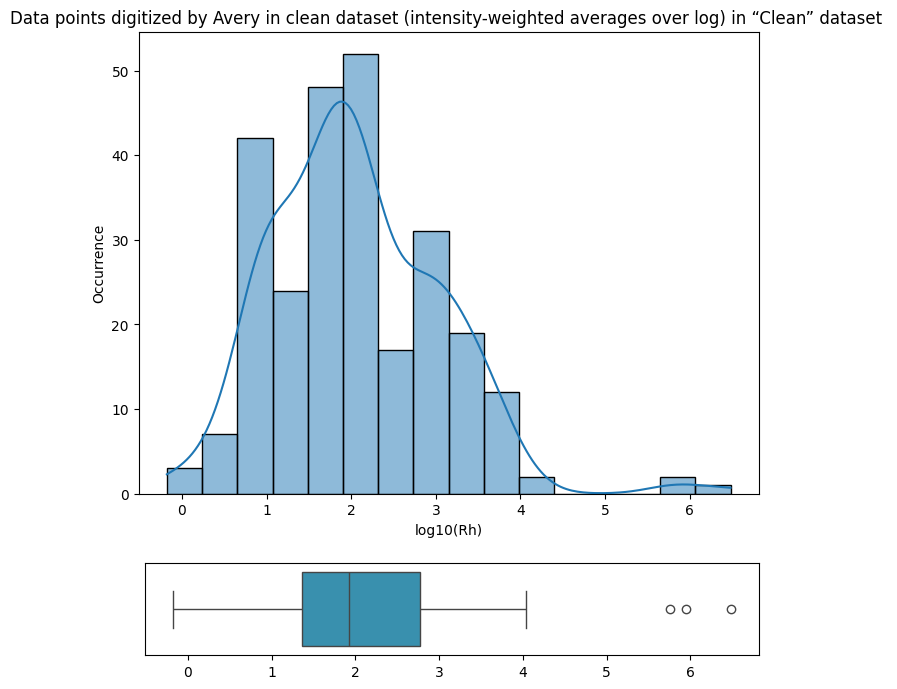

In [44]:
plot_single_distribution_plot(digitized_data_after_mapped_to_clean_dataset, 'Rh (IW avg log)', transform_function=np.log10, title="Data points digitized by Avery in clean dataset (intensity-weighted averages over log) in “Clean” dataset ",
                               x_label="log10(Rh)")

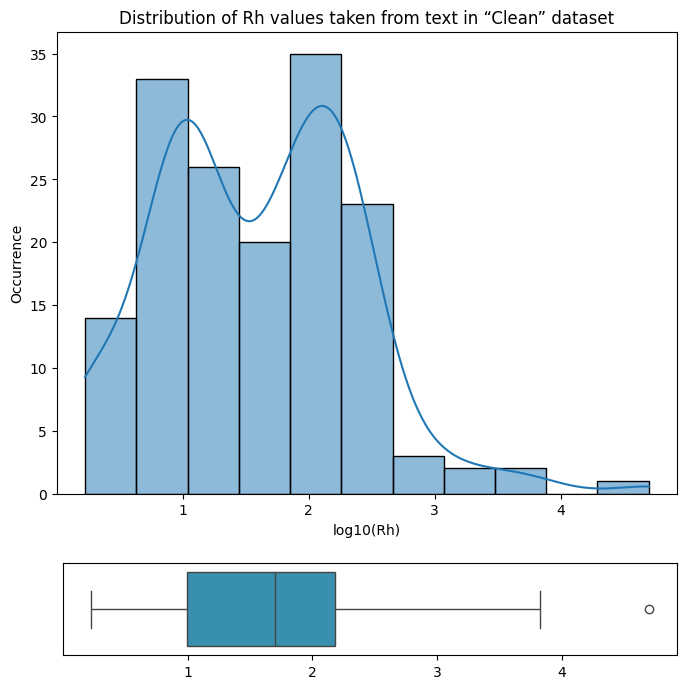

In [45]:
plot_single_distribution_plot(pls_dataset_Rh_without_plot, 'Rh (IW avg log)', transform_function=np.log10, title="Distribution of Rh values taken from text in “Clean” dataset",
                               x_label="log10(Rh)")

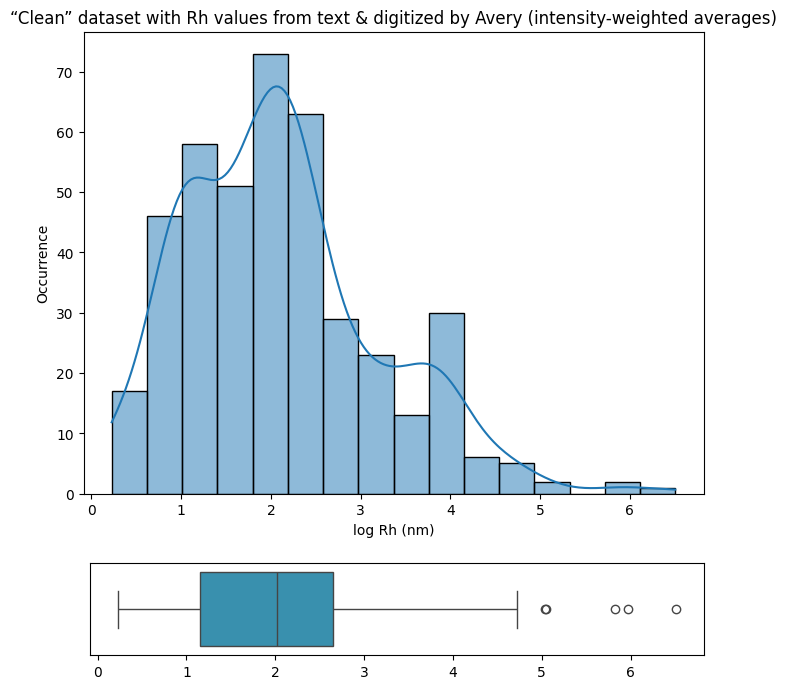

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with KDE
sns.histplot(np.log10(analysis_data['intensity weighted average Rh (nm)']), kde=True, ax=ax)  # kde=True adds a KDE line to the histogram
ax.set_xlabel('log Rh (nm)')  # Set the label for x-axis
ax.set_ylabel('Occurrence')    # Set the label for y-axis
ax.set_title('“Clean” dataset with Rh values from text & digitized by Avery (intensity-weighted averages)')  # Set the title for the plot

# Create inset box plot
box_inset = ax.inset_axes([0.01, -0.35, 0.99, 0.2])  # Adjust position for the inset box plot
sns.boxplot(x=np.log10(analysis_data['intensity weighted average Rh (nm)']), ax=box_inset, color='#259AC1')

# Customize the inset box plot
box_inset.set(yticks=[], xlabel=None)  # Remove y-ticks and x-label from the box plot
box_inset.tick_params(axis='x', labelsize=10)

# Display the plot
plt.show()

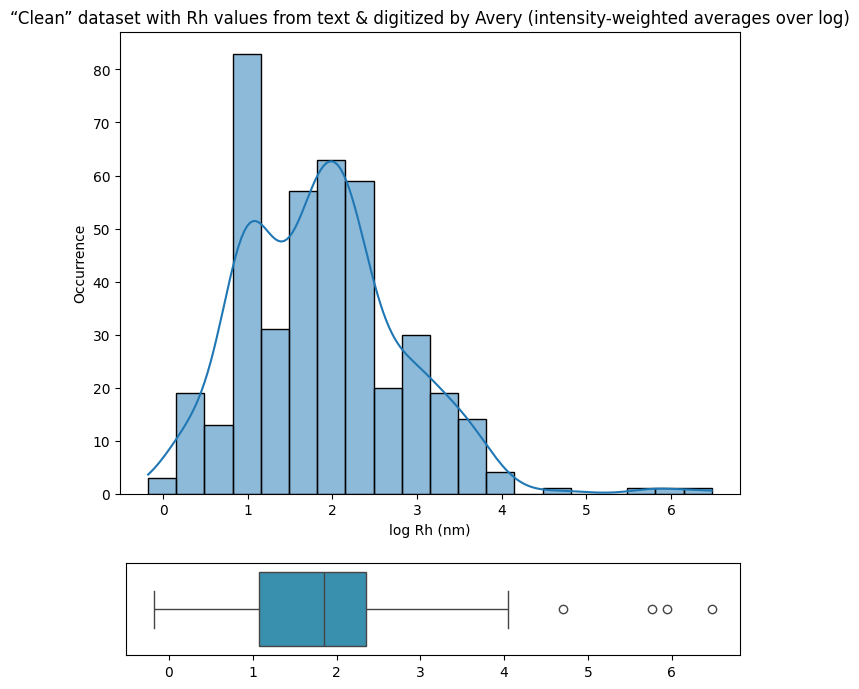

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with KDE
sns.histplot(np.log10(analysis_data['Rh (IW avg log)']), kde=True, ax=ax)  # kde=True adds a KDE line to the histogram
ax.set_xlabel('log Rh (nm)')  # Set the label for x-axis
ax.set_ylabel('Occurrence')    # Set the label for y-axis
ax.set_title('“Clean” dataset with Rh values from text & digitized by Avery (intensity-weighted averages over log)')  # Set the title for the plot

# Create inset box plot
box_inset = ax.inset_axes([0.01, -0.35, 0.99, 0.2])  # Adjust position for the inset box plot
sns.boxplot(x=np.log10(analysis_data['Rh (IW avg log)']), ax=box_inset, color='#259AC1')

# Customize the inset box plot
box_inset.set(yticks=[], xlabel=None)  # Remove y-ticks and x-label from the box plot
box_inset.tick_params(axis='x', labelsize=10)

# Display the plot
plt.show()

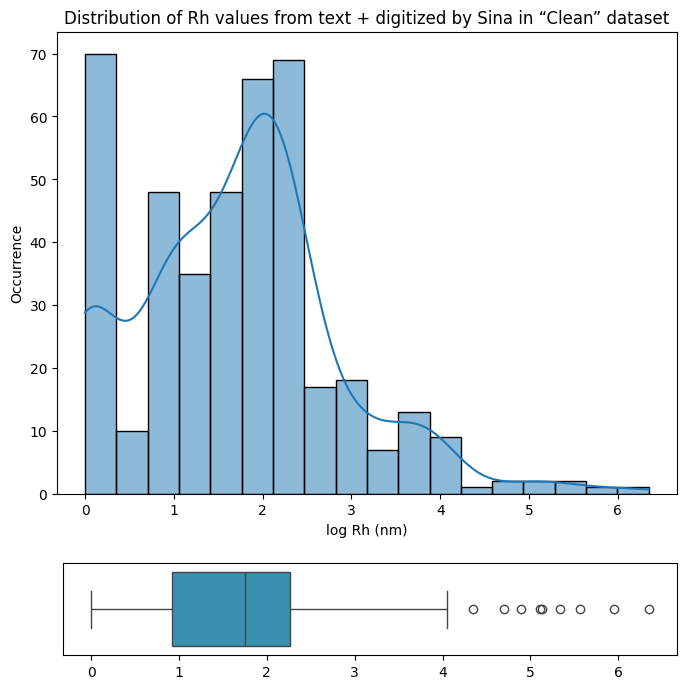

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with KDE
sns.histplot(np.log10(analysis_data["Rh1 (nm)"]), kde=True, ax=ax)  # kde=True adds a KDE line to the histogram
ax.set_xlabel('log Rh (nm)')  # Set the label for x-axis
ax.set_ylabel('Occurrence')    # Set the label for y-axis
ax.set_title('Distribution of Rh values from text + digitized by Sina in “Clean” dataset')  # Set the title for the plot

# Create inset box plot
box_inset = ax.inset_axes([0.01, -0.35, 0.99, 0.2])  # Adjust position for the inset box plot
sns.boxplot(x=np.log10(analysis_data["Rh1 (nm)"]), ax=box_inset, color='#259AC1')

# Customize the inset box plot
box_inset.set(yticks=[], xlabel=None)  # Remove y-ticks and x-label from the box plot
box_inset.tick_params(axis='x', labelsize=10)

# Display the plot
plt.show()

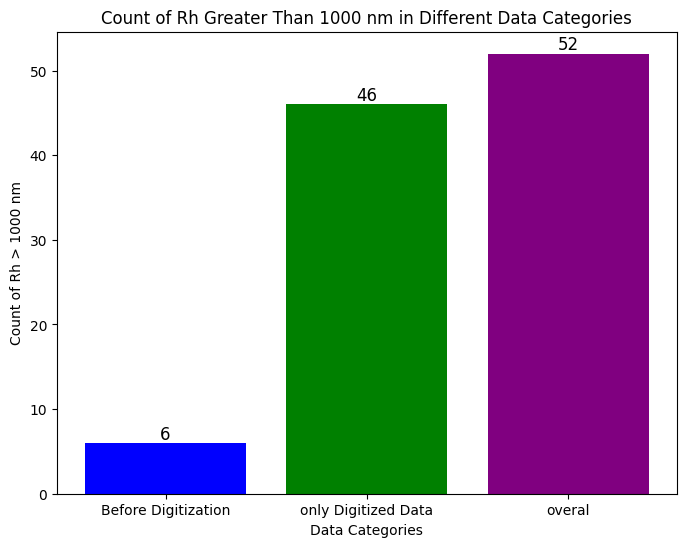

In [49]:
rh_counts = {
    'Before Digitization': len(pls_dataset_Rh_without_plot[pls_dataset_Rh_without_plot['Rh (IW avg log)'] > 1000]),
    'only Digitized Data': len(digitized_data_after_mapped_to_clean_dataset[digitized_data_after_mapped_to_clean_dataset['Rh (IW avg log)'] > 1000]),
    'overal': len(pls_data_cleaned[pls_data_cleaned['Rh (IW avg log)'] > 1000]),
}

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(rh_counts.keys(), rh_counts.values(), color=['blue', 'green', 'purple'])
plt.xlabel('Data Categories')
plt.ylabel('Count of Rh > 1000 nm')
plt.title('Count of Rh Greater Than 1000 nm in Different Data Categories')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.show()

### find peaks

In [50]:
derived_peaks_df = digitized_data_after_mapped_to_clean_dataset.copy()

In [51]:
def sort_rh_and_intensity(row):
    # Zip the two lists together
    combined = list(zip(row["derived Rh (nm)"], row["normalized intensity (0-1) corrected"]))
    # Sort by the first element (Rh values)
    combined_sorted = sorted(combined, key=lambda x: x[0])
    # Unzip the sorted pairs back into two lists
    rh_sorted, intensity_sorted = zip(*combined_sorted)
    return pd.Series({"derived Rh (nm)": list(rh_sorted), "normalized intensity (0-1) corrected": list(intensity_sorted)})


derived_peaks_df[["derived Rh (nm)", "normalized intensity (0-1) corrected"]] = derived_peaks_df.apply(sort_rh_and_intensity, axis=1)


In [52]:
from scipy.signal import find_peaks

def find_peaks_and_rh(
    intensity_data: List[float],
    rh_data: List[float],
    prominence: float,
    threshold: Optional[float] = None
) -> tuple[List[int], List[float]]:
    """
    Finds peaks in intensity data and optionally filters them by an Rh threshold.

    Parameters:
    - intensity_data: List of intensity values.
    - rh_data: List of Rh values corresponding to the intensity data.
    - prominence: Minimum prominence of peaks to be considered.
    - threshold: Optional; Minimum Rh value for peaks to be included.

    Returns:
    - Tuple containing:
        1. List of indices of peaks (filtered or unfiltered).
        2. List of corresponding Rh values at the peaks.
    """
    # Find peaks based on intensity data
    peaks, _ = find_peaks(intensity_data, prominence=prominence)

    if threshold is not None:

        # Filter peaks based on Rh threshold
        filtered_peaks = [i for i in peaks if float(rh_data[i]) > threshold]
        rh_at_filtered_peaks = [rh_data[i] for i in filtered_peaks]
        return filtered_peaks, rh_at_filtered_peaks
    else:
        # Return all peaks if no threshold is provided
        rh_at_peaks = [rh_data[i] for i in peaks]
        return peaks, rh_at_peaks

In [53]:
# Function to apply `find_peaks_and_rh` row-wise
def apply_find_peaks(row,prominence, threshold:Optional[float]=None):
    # Ensure that the values are lists of the correct shape for each row
    intensity_data = row['normalized intensity (0-1) corrected']
    rh_data = row['derived Rh (nm)']

    # Call the `find_peaks_and_rh` function
    peaks, rh_at_peaks = find_peaks_and_rh(intensity_data, rh_data, prominence, threshold)

    # Return the peaks and corresponding Rh values as a Series
    return pd.Series([peaks, rh_at_peaks])


In [54]:
# # Function to apply `find_peaks_and_rh` row-wise
# def apply_find_peaks_above_one_nm(row,prominence):
#     # Ensure that the values are lists of the correct shape for each row
#     intensity_data = row['normalized intensity (0-1) corrected']
#     rh_data = row['derived Rh (nm)']

#     # Call the `find_peaks_and_rh` function
#     peaks, rh_at_peaks = find_peaks_and_rh_above_one_nm(intensity_data, rh_data,prominence)

#     # Return the peaks and corresponding Rh values as a Series
#     return pd.Series([peaks, rh_at_peaks])

In [55]:
derived_peaks_df[['peaks_above_one', 'Rh (above 1 nm) at peaks']] = derived_peaks_df.apply(
     lambda row: apply_find_peaks(row, prominence=0.1,threshold=1.01), axis=1
    )

In [56]:
derived_peaks_df[['peaks', 'Rh at peaks']] = derived_peaks_df.apply(
     lambda row: apply_find_peaks(row, prominence=0.1), axis=1
    )

In [57]:
def visualize_curves(df,peak,rh_col):
  for idx, (rh_values, intensity_values) in enumerate(zip(df['derived Rh (nm)'], df['normalized intensity (0-1) corrected'])):
      # Extract matched index label
      index_label = df.iloc[idx]['matched index']
      # Extract peaks and their corresponding Rh values
      peaks_indices = df.iloc[idx][peak]
      rh_at_peaks = df.iloc[idx][rh_col]
      intensity_at_peaks = [intensity_values[i] for i in peaks_indices]

      plt.figure(figsize=(10, 6))

      # Plot normalized intensity vs derived Rh
      plt.plot(rh_values, intensity_values, marker='o', linestyle='-', color='b', label=f'Curve {index_label}')

      # Add scatter points for peaks
      plt.scatter(rh_at_peaks, intensity_at_peaks, color='r', s=100, label='Peaks')

      # Labels and formatting
      plt.xlabel("Rh (nm)")
      plt.ylabel("Normalized Intensity (0-1)")
      plt.title(f"Hydrodynamic Radius (Rh) vs. Normalized Intensity - Curve {index_label}")
      plt.yscale("linear")  # Adjust scale as needed
      plt.xscale("log")  # Assuming Rh should be on a log scale
      plt.legend()
      plt.show()

In [58]:
visualize_curves(derived_peaks_df,peak="peaks_above_one",rh_col="Rh (above 1 nm) at peaks")

Output hidden; open in https://colab.research.google.com to view.

In [59]:
manual_handle_index = [7,8,136, 137, 140, 142, 144, 146, 149, 226, 228, 232, 246, 260, 279, 324, 326,
331, 334, 339, 340, 343, 449, 540, 542, 545, 547, 548, 549, 550, 552,
638, 639, 640, 804, 805, 806, 816, 829, 832, 17,812,840,855,861,899,866]


In [60]:
def find_rh(rh_data, peaks):
    rh_at_peaks = [rh_data[i] for i in peaks]
    return rh_at_peaks

def replace_manual_assigned_peaks(row,col):
  rh_data = row['derived Rh (nm)']
  peak =  row[col]
  rh_at_peaks = find_rh(rh_data, peak)
  return pd.Series([rh_at_peaks])

In [61]:
manual_handle_data = derived_peaks_df[derived_peaks_df['matched index'].isin(manual_handle_index)]
manual_handle_data[['peaks_above_one', 'Rh (above 1 nm) at peaks']] =manual_handle_data.apply(
     lambda row: apply_find_peaks(row, prominence=0.05,threshold=1), axis=1
    )

In [62]:
manual_handle_data_all_rh = derived_peaks_df[derived_peaks_df['matched index'].isin(manual_handle_index)]
manual_handle_data_all_rh[['peaks', 'Rh at peaks']] =manual_handle_data_all_rh.apply(
     lambda row: apply_find_peaks(row, prominence=0.05), axis=1
    )

In [63]:
manual_handle_data[manual_handle_data['matched index'].isin([7])]
# manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'].isin([326])]



name  Mw (g/mol)  Mn (g/mol)  PDI Regioregularity R%   DP  SANS  SAXS/GWAXS  \
7  PFO     46000.0         NaN  NaN                NaN  NaN     0           0   

   DLS  SLS  ...  polymer dH        Ra  abs(solvent dD - polymer dD)  \
7  1.0    1  ...         0.9  7.408956                         0.026   

   abs(solvent dP - polymer dP) abs(solvent dH - polymer dH)  log Rg (nm)  \
7                         2.842                        6.842          NaN   

   peaks_above_one Rh (above 1 nm) at peaks peaks  Rh at peaks  
7          [3, 10]        [67.746, 747.254]  [10]    [747.254]  

[1 rows x 178 columns]

In [64]:
manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'].isin([7])]


name  Mw (g/mol)  Mn (g/mol)  PDI Regioregularity R%   DP  SANS  SAXS/GWAXS  \
7  PFO     46000.0         NaN  NaN                NaN  NaN     0           0   

   DLS  SLS  ...  polymer dH        Ra  abs(solvent dD - polymer dD)  \
7  1.0    1  ...         0.9  7.408956                         0.026   

   abs(solvent dP - polymer dP) abs(solvent dH - polymer dH)  log Rg (nm)  \
7                         2.842                        6.842          NaN   

   peaks_above_one Rh (above 1 nm) at peaks    peaks        Rh at peaks  
7             [10]                [747.254]  [3, 10]  [67.746, 747.254]  

[1 rows x 178 columns]

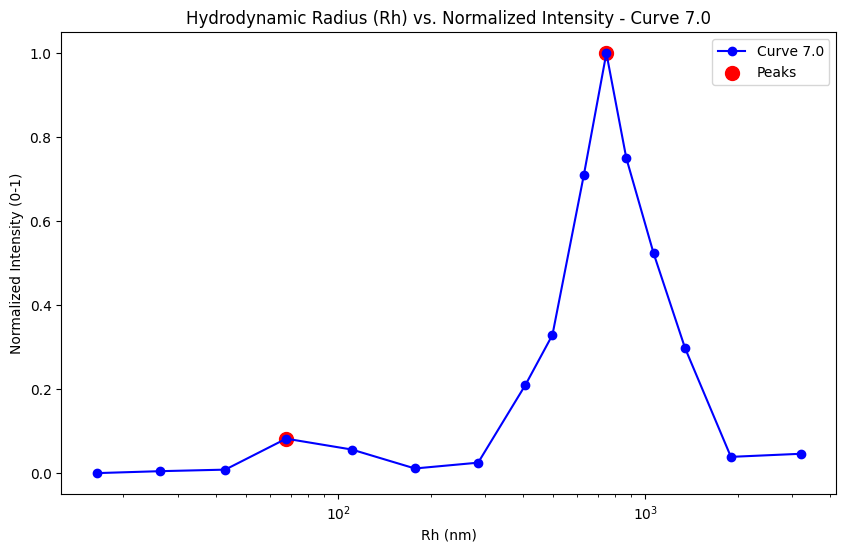

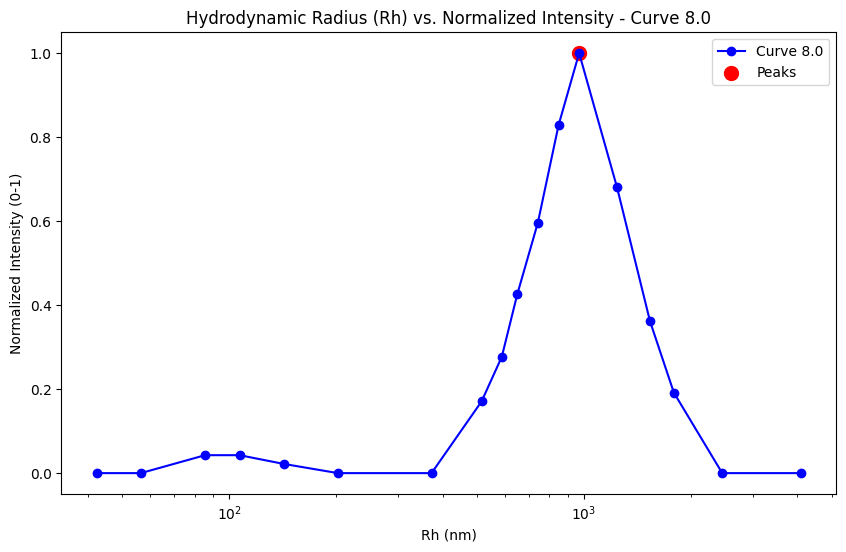

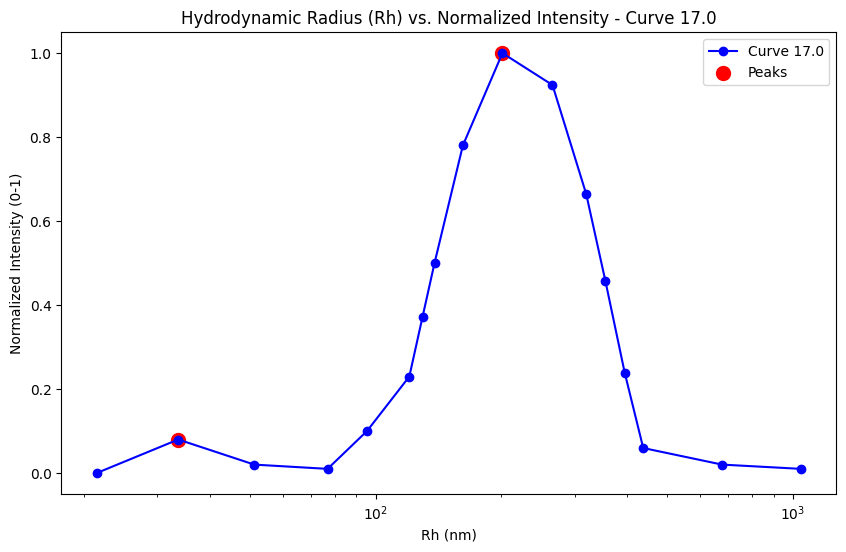

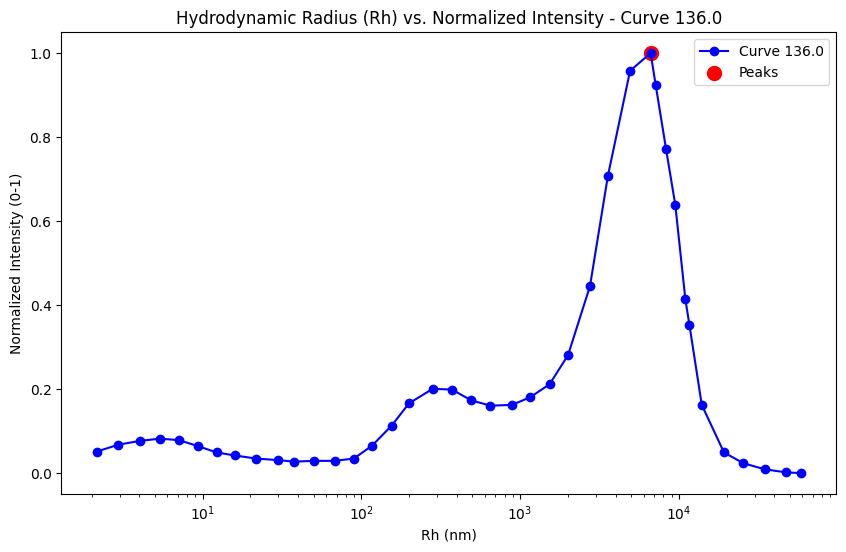

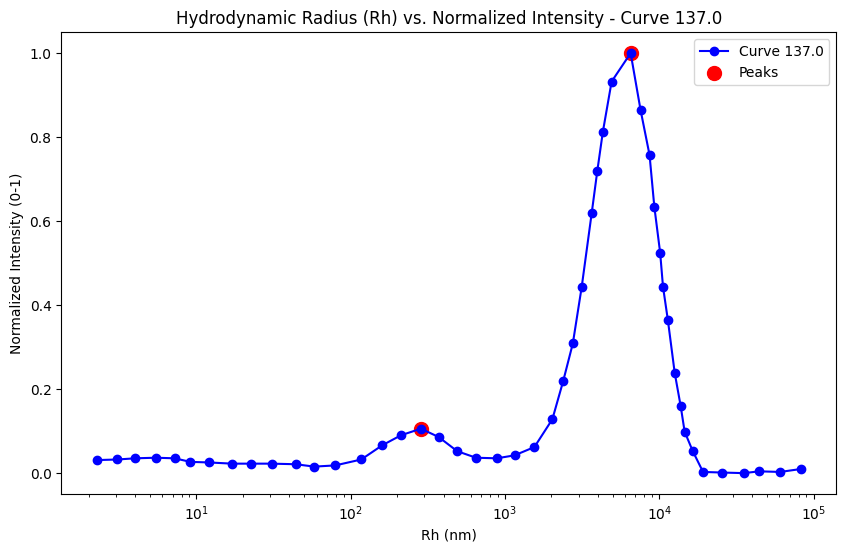

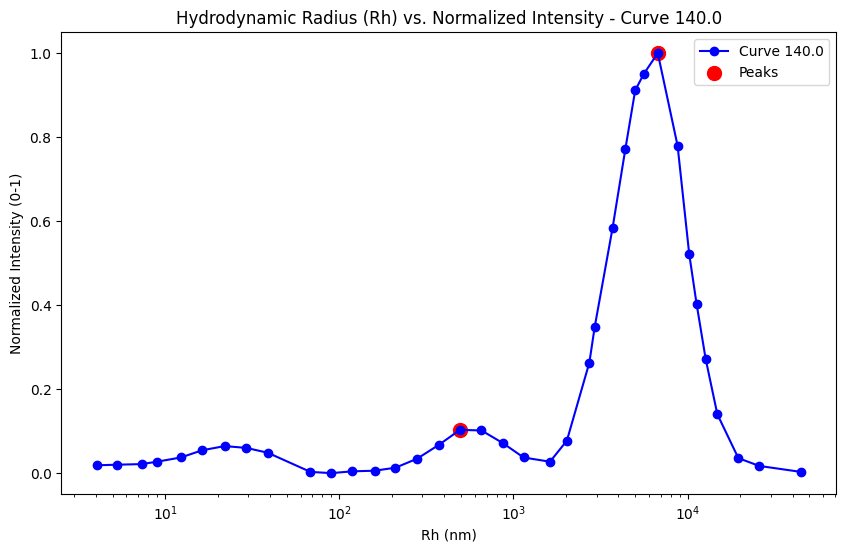

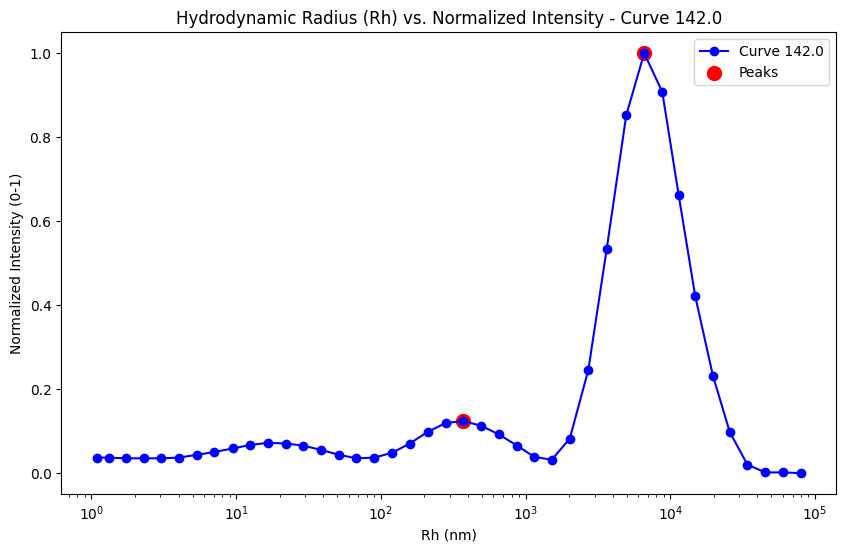

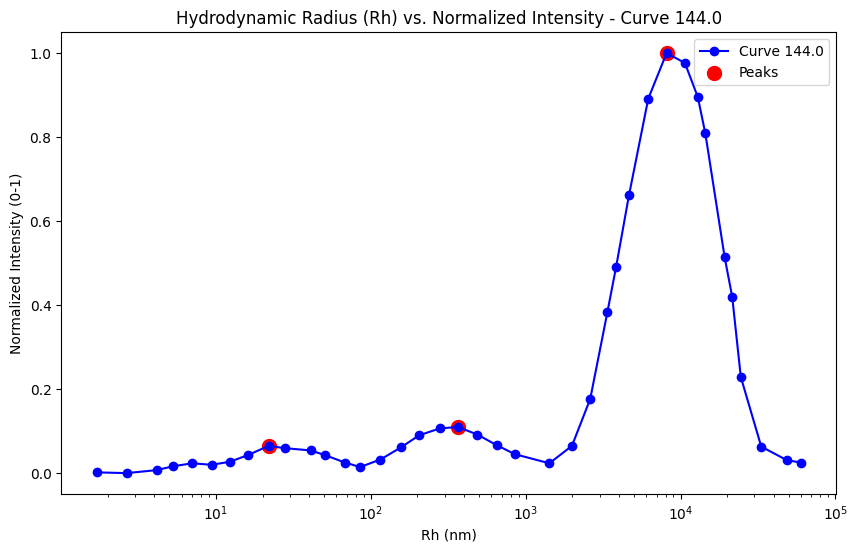

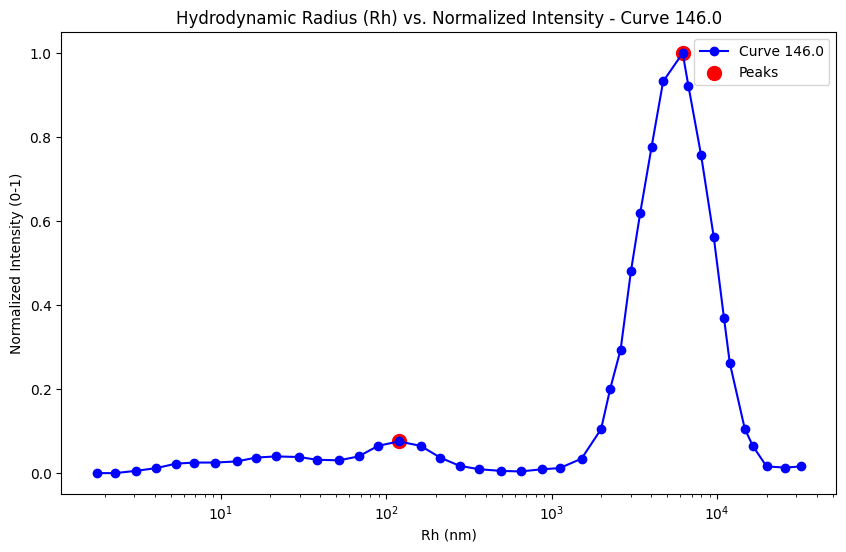

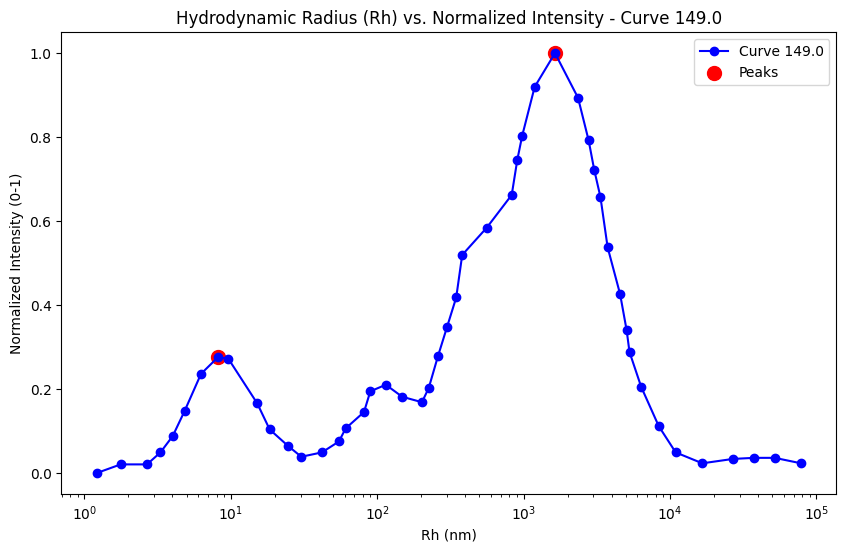

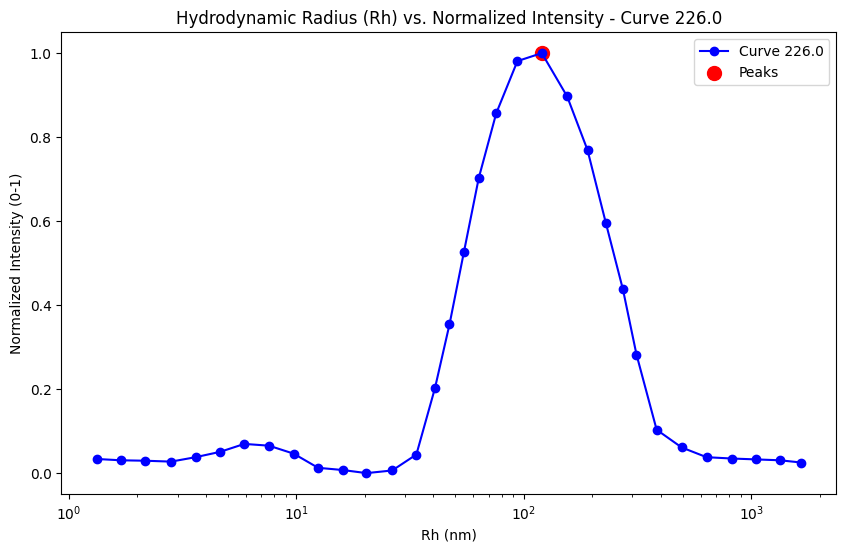

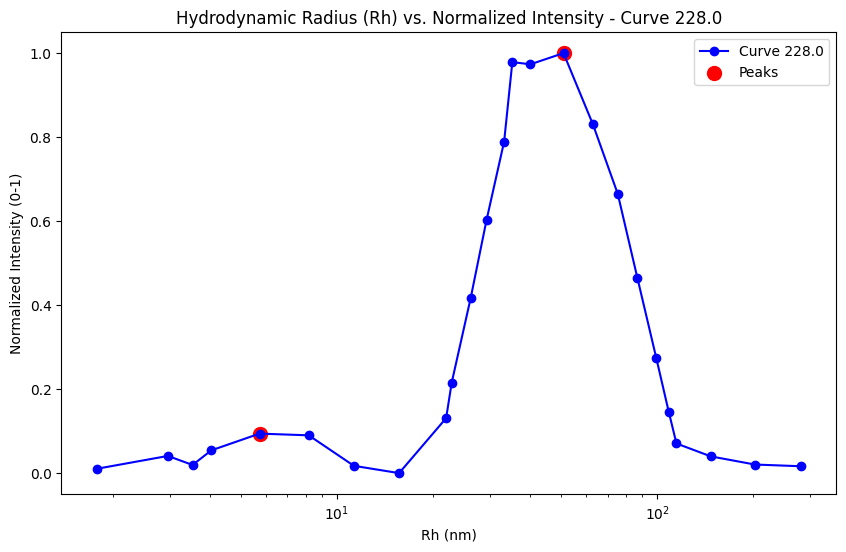

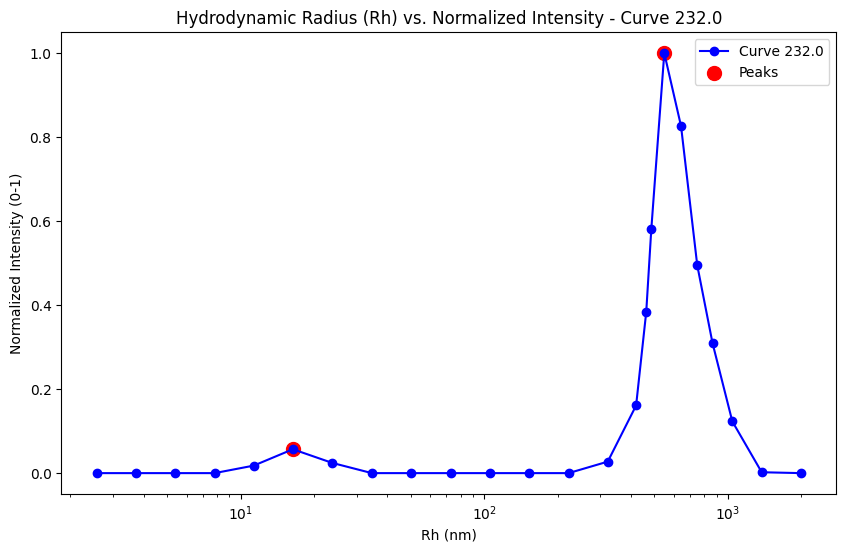

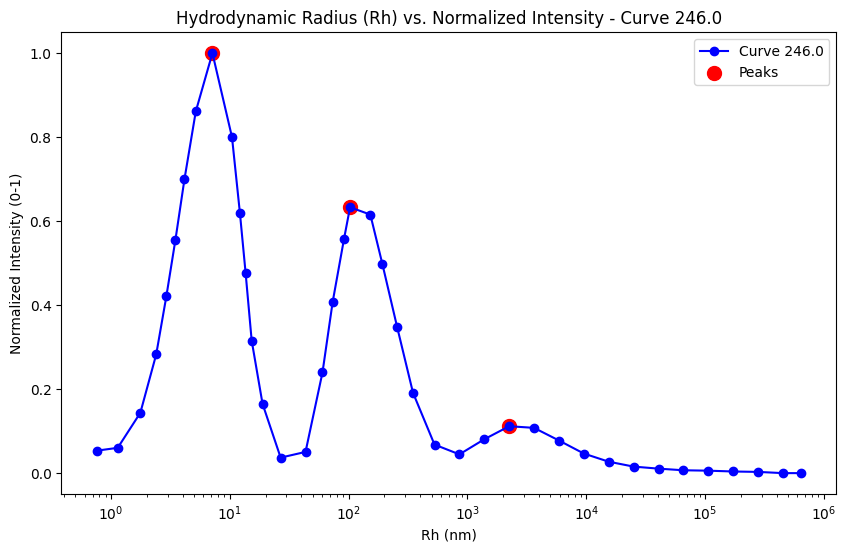

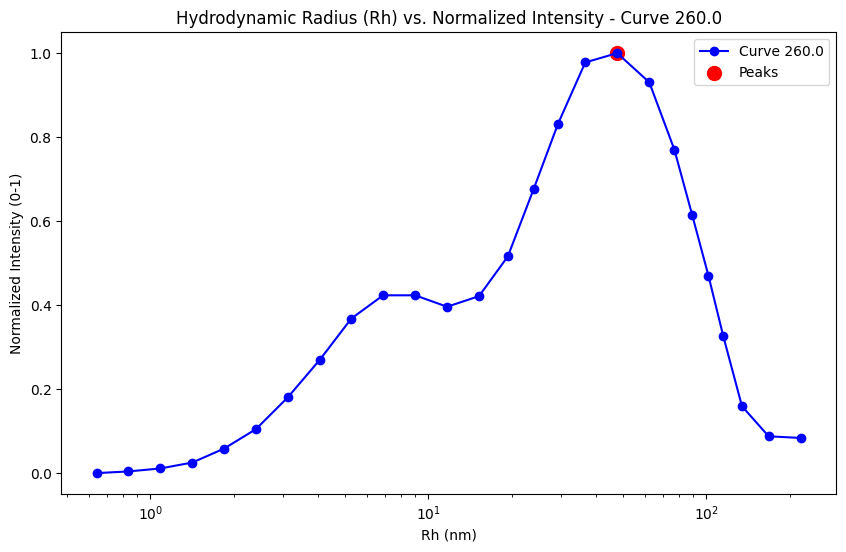

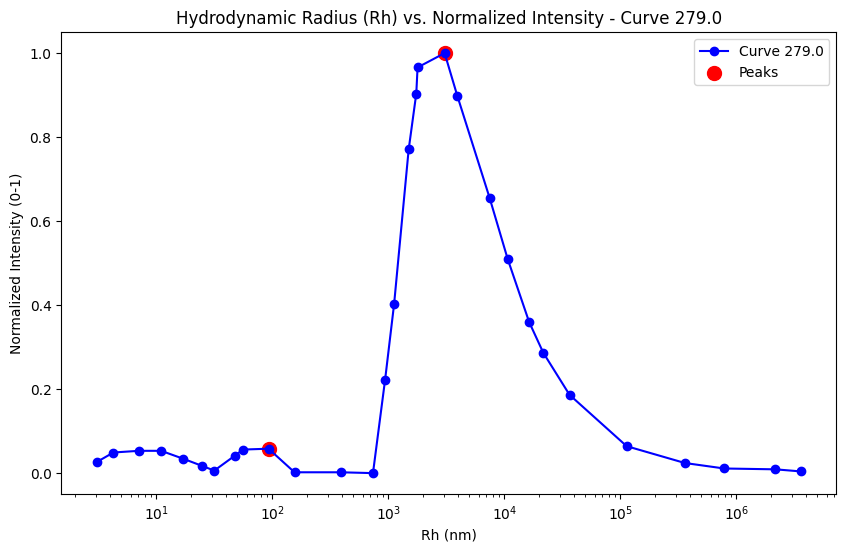

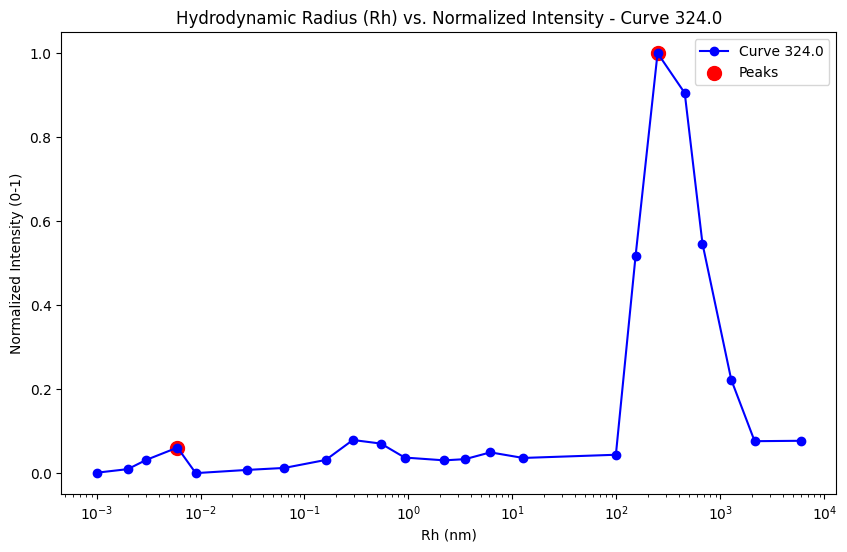

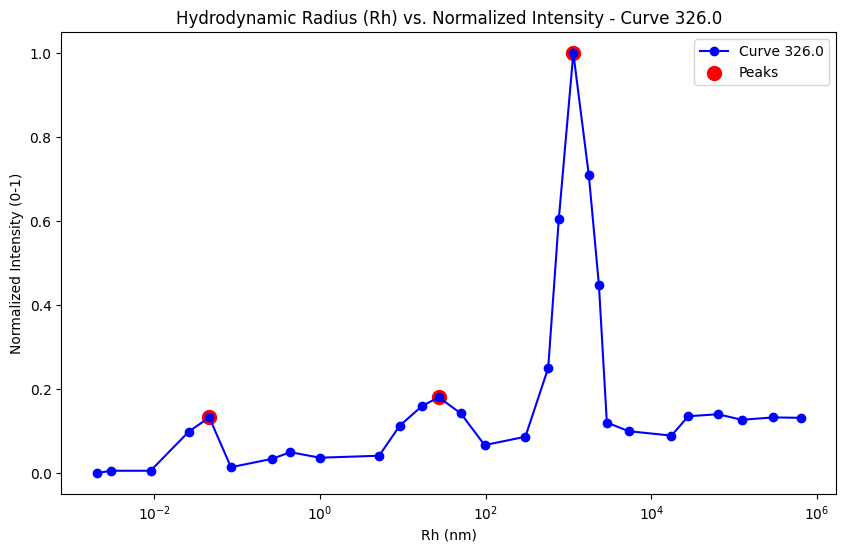

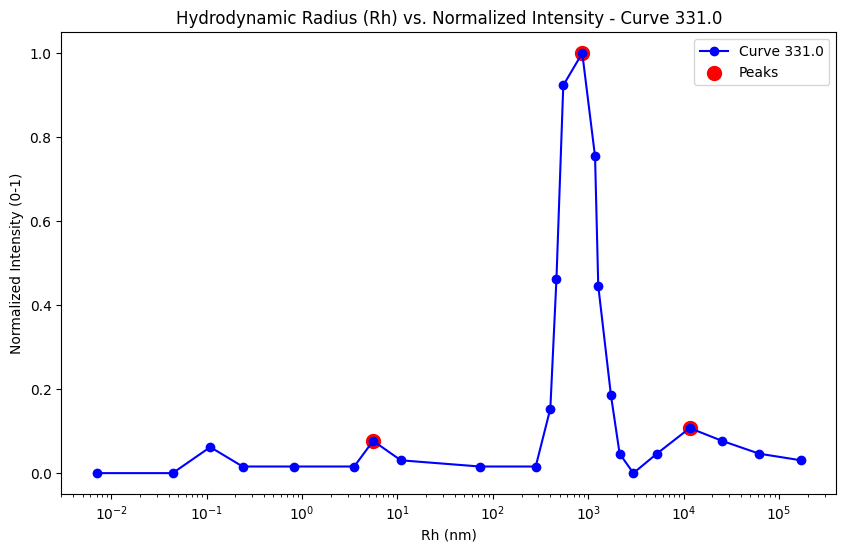

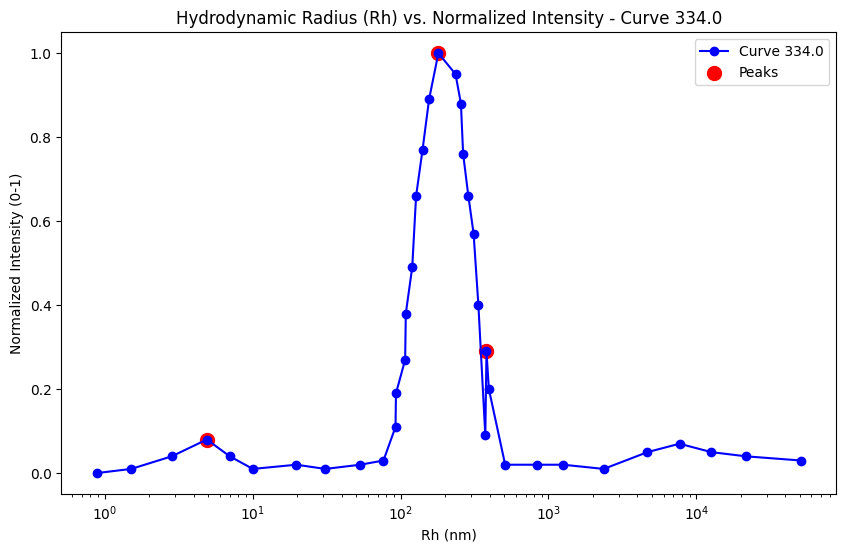

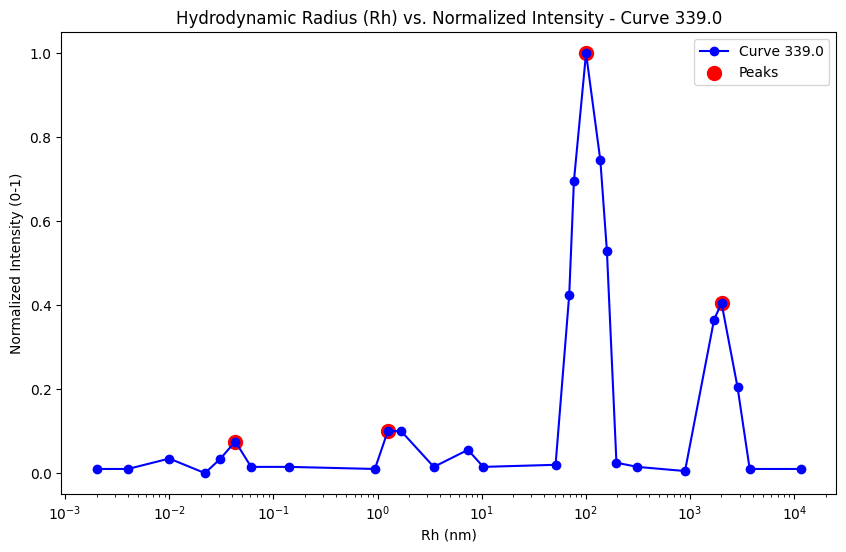

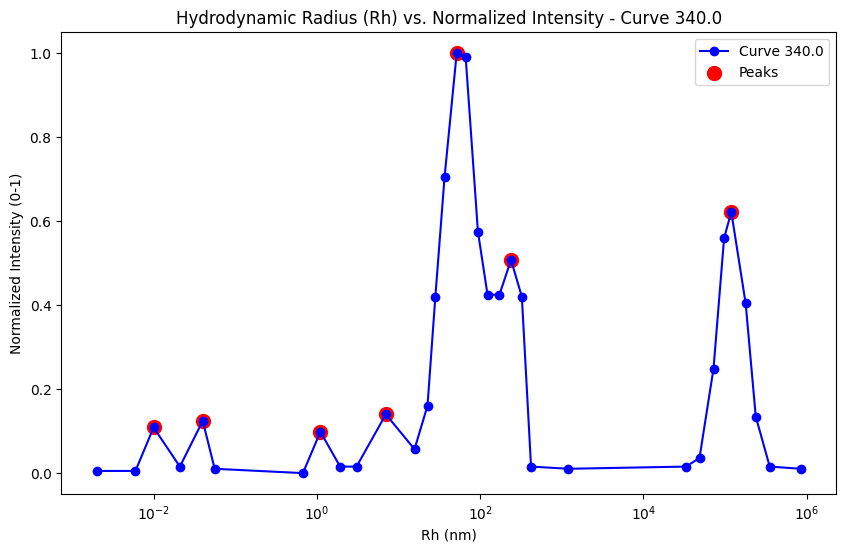

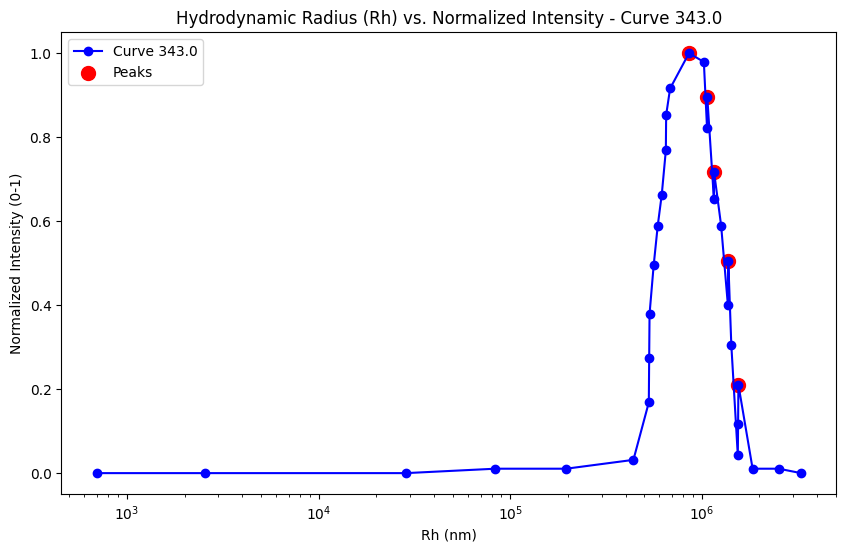

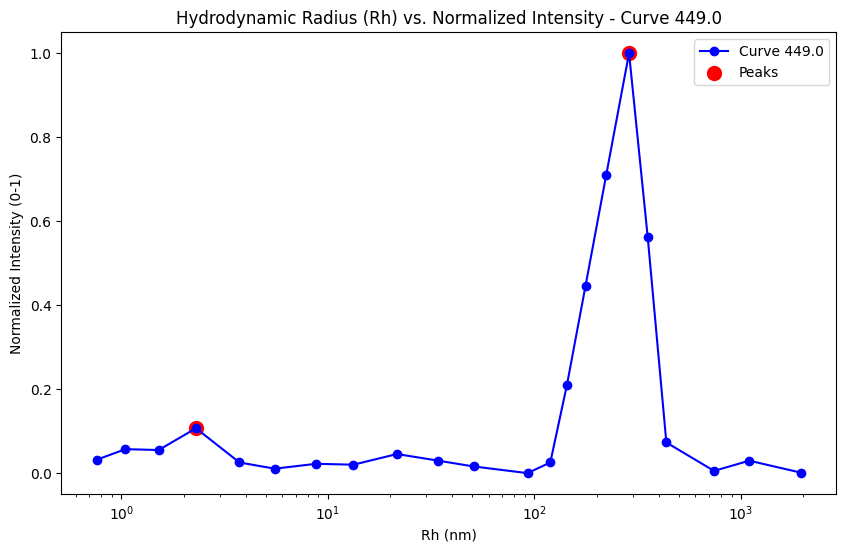

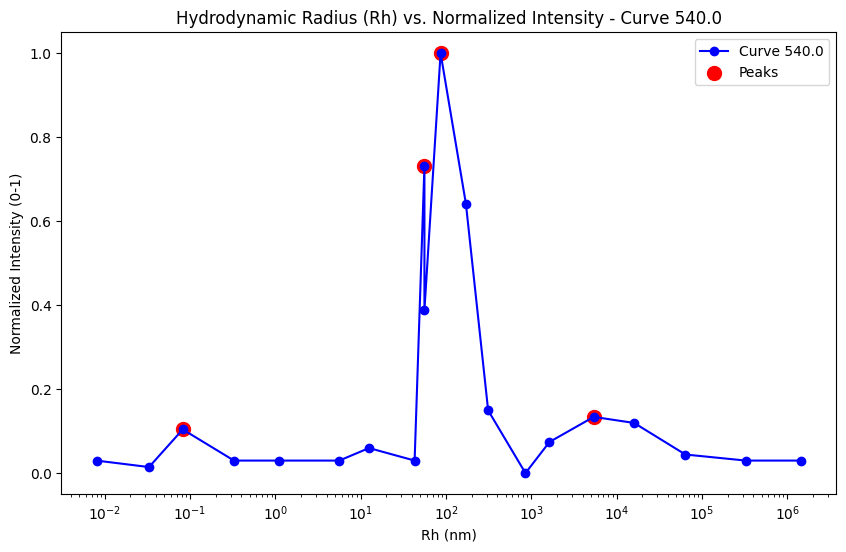

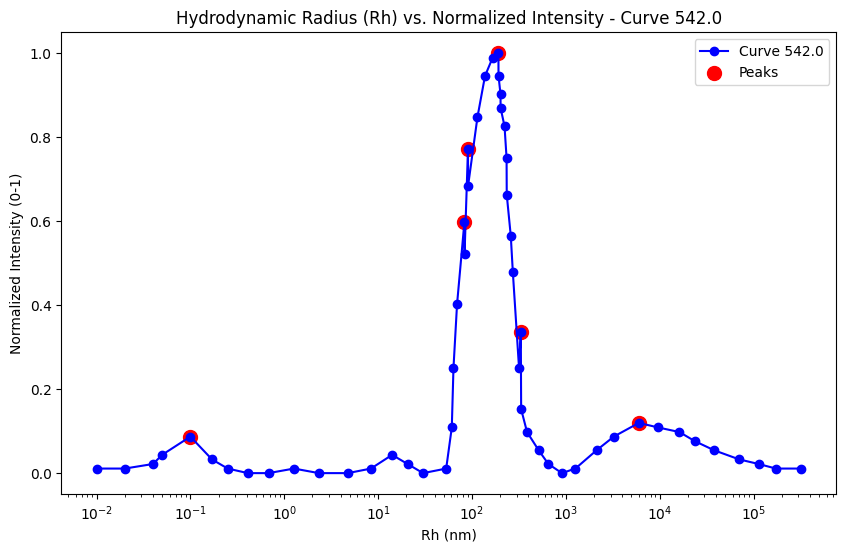

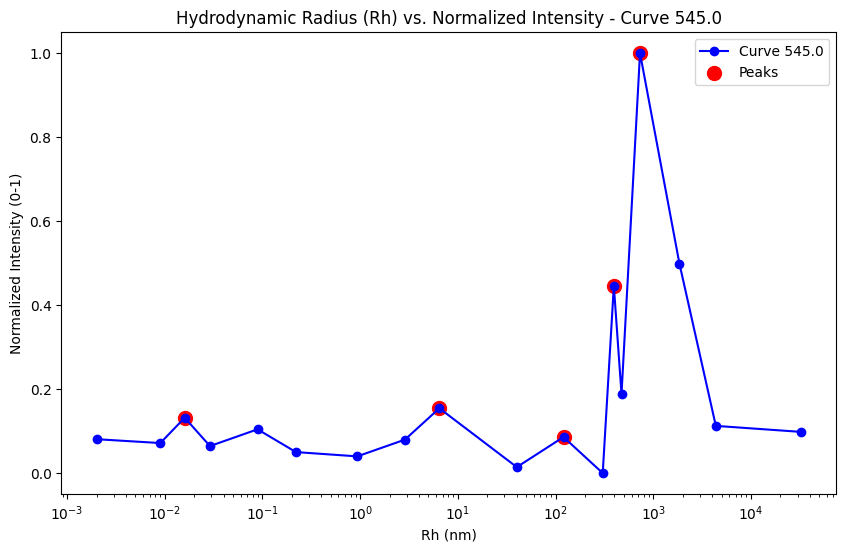

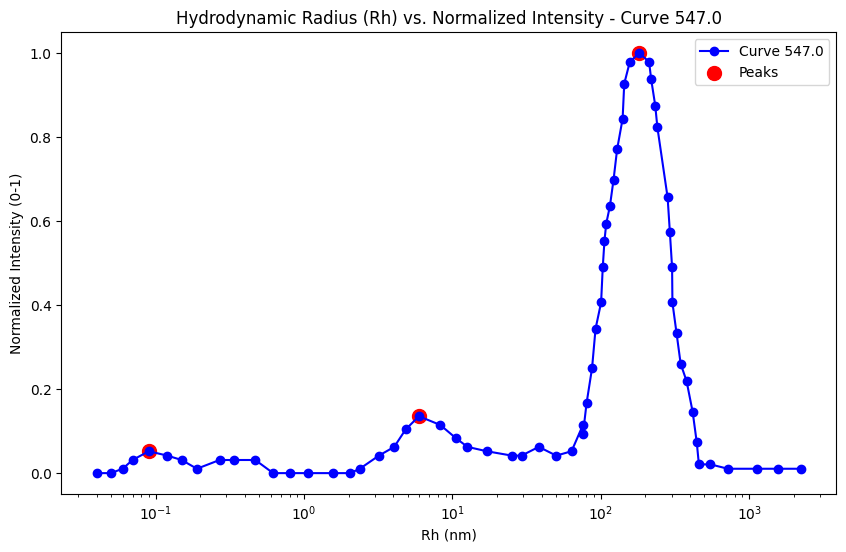

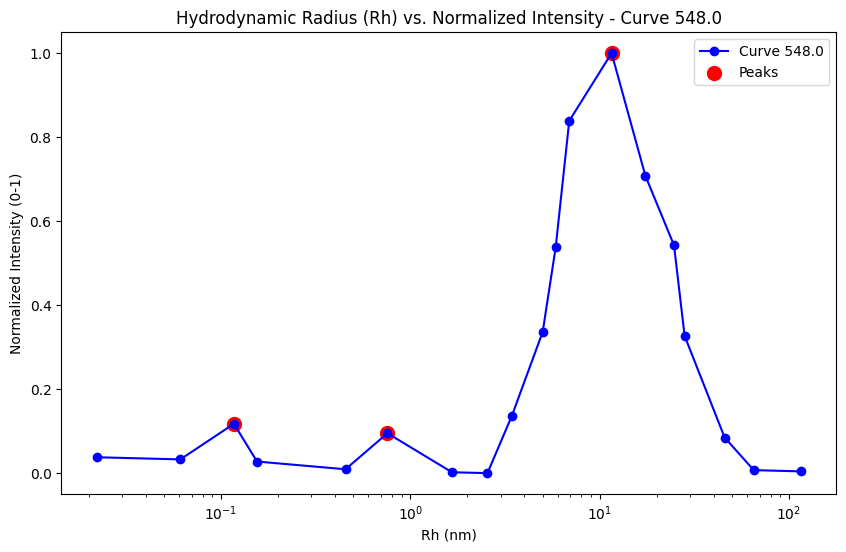

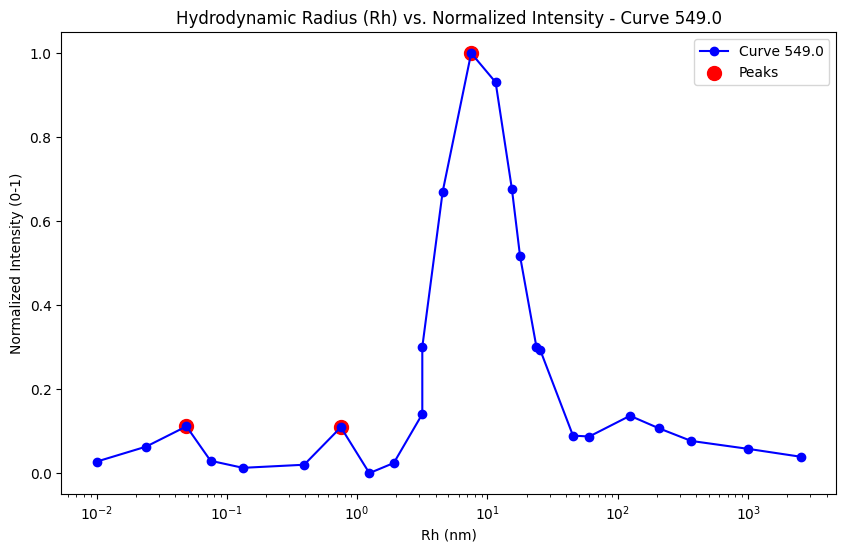

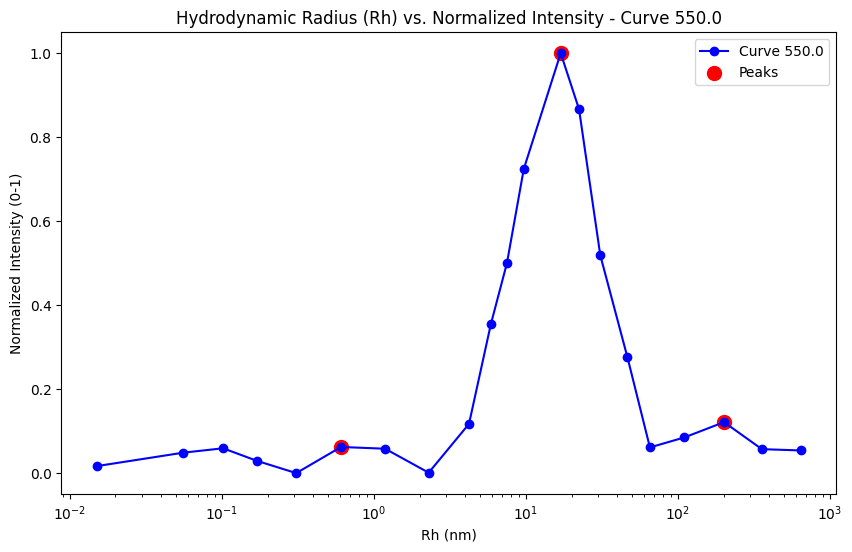

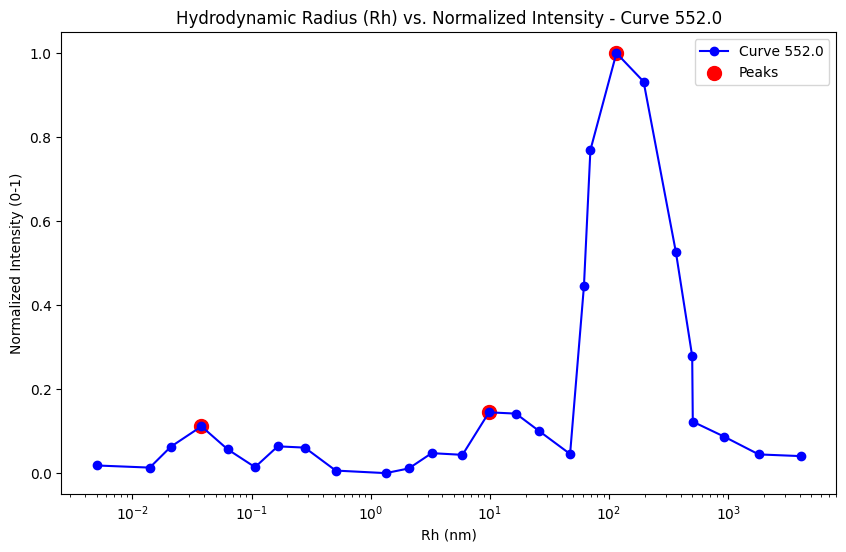

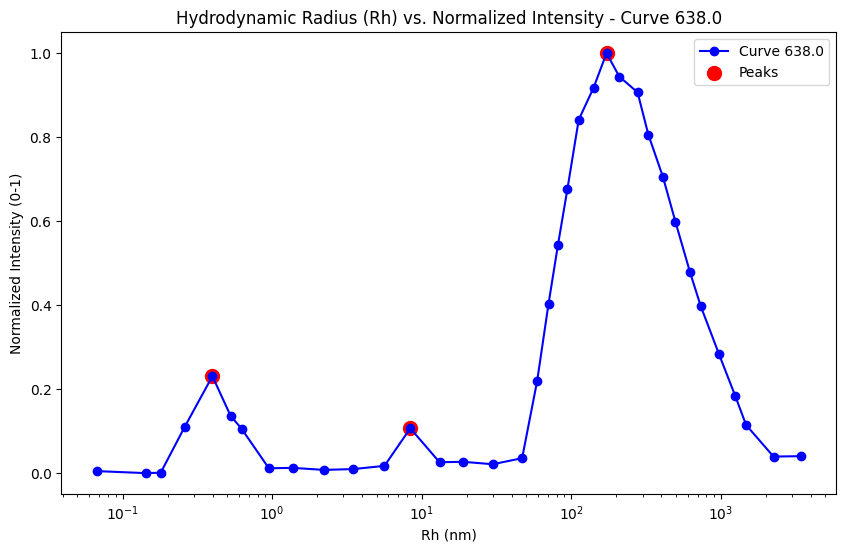

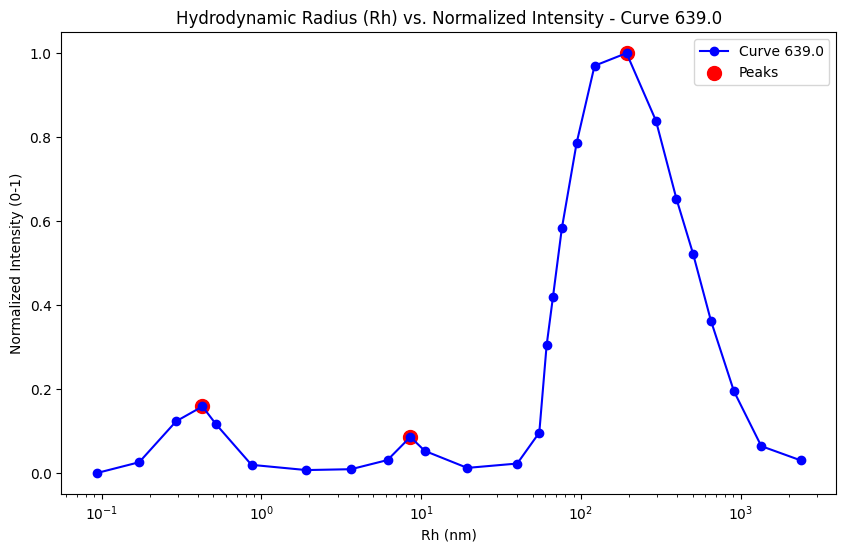

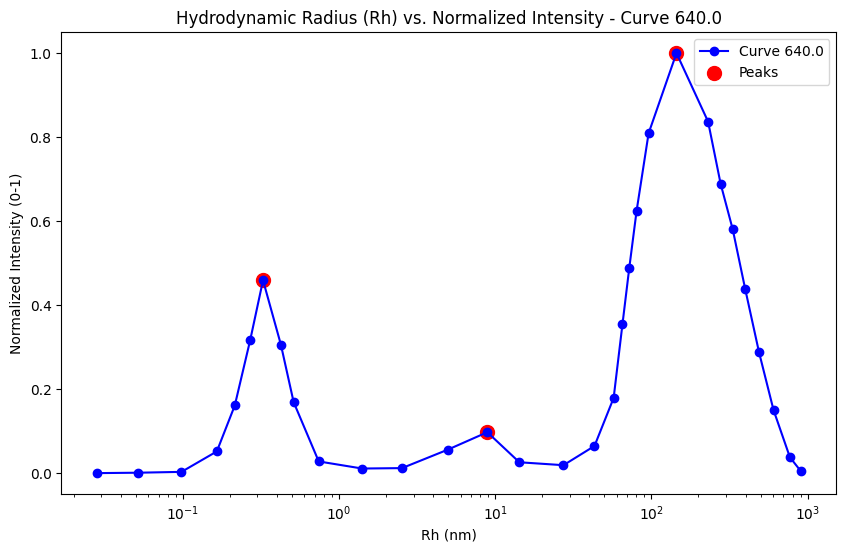

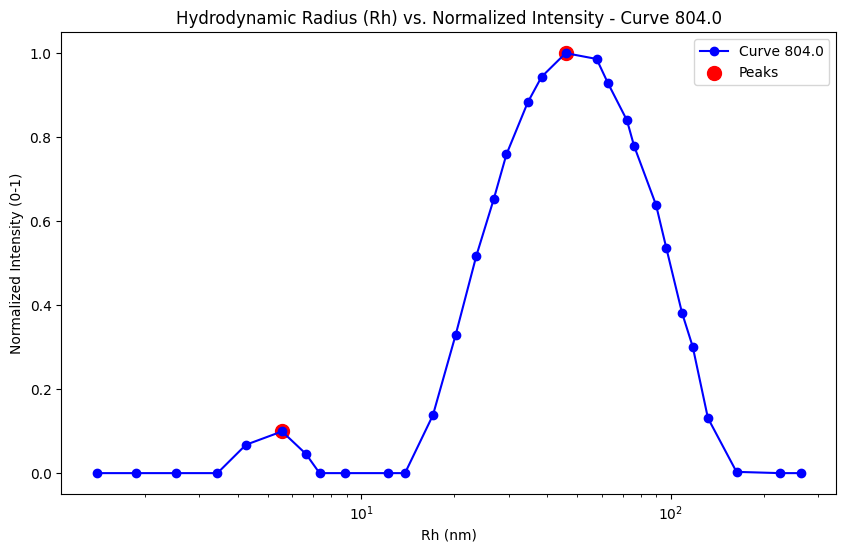

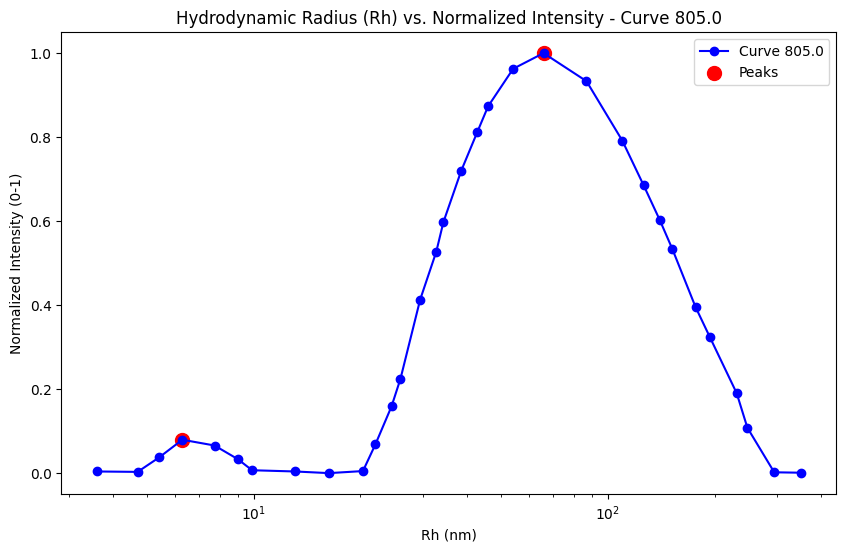

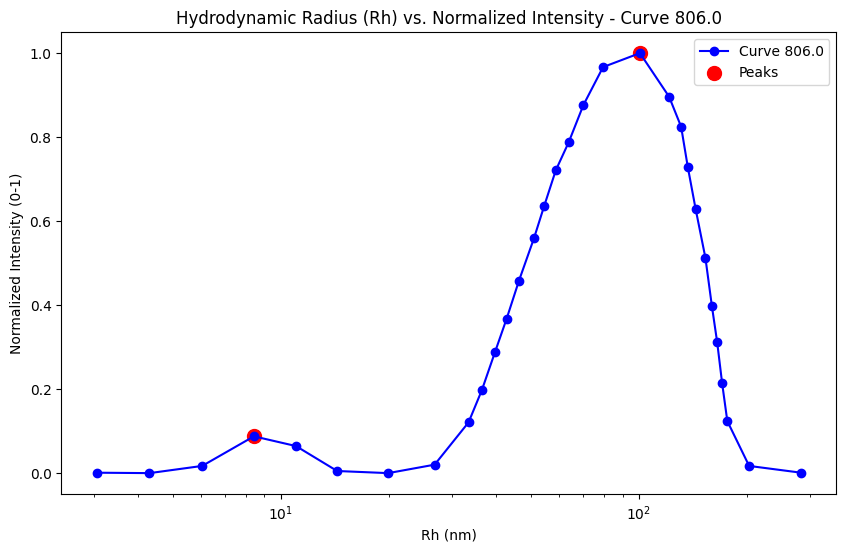

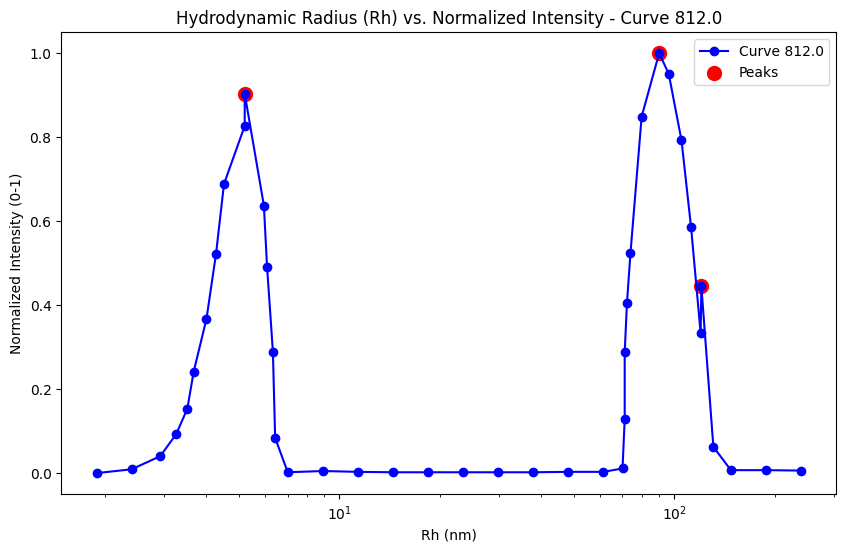

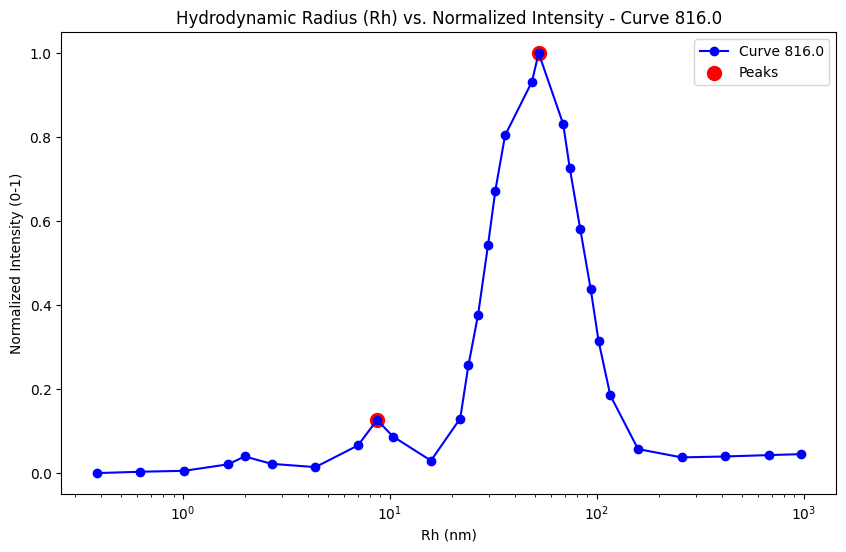

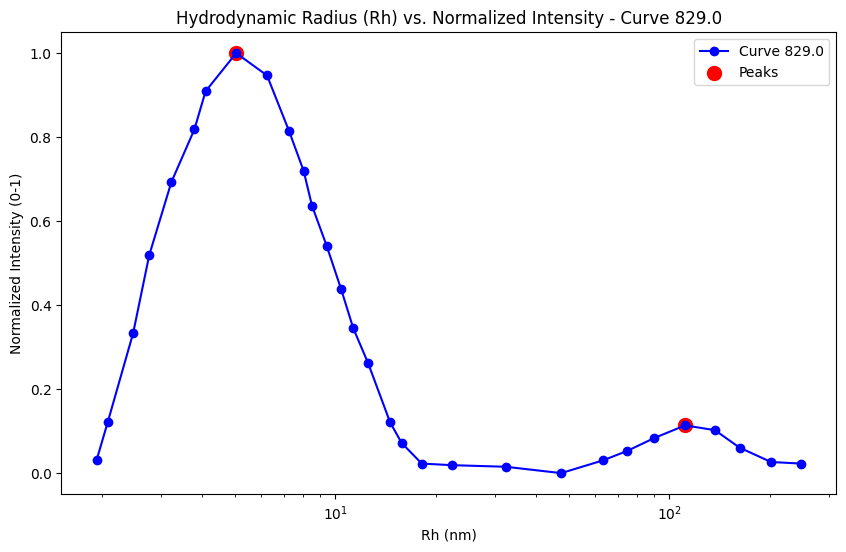

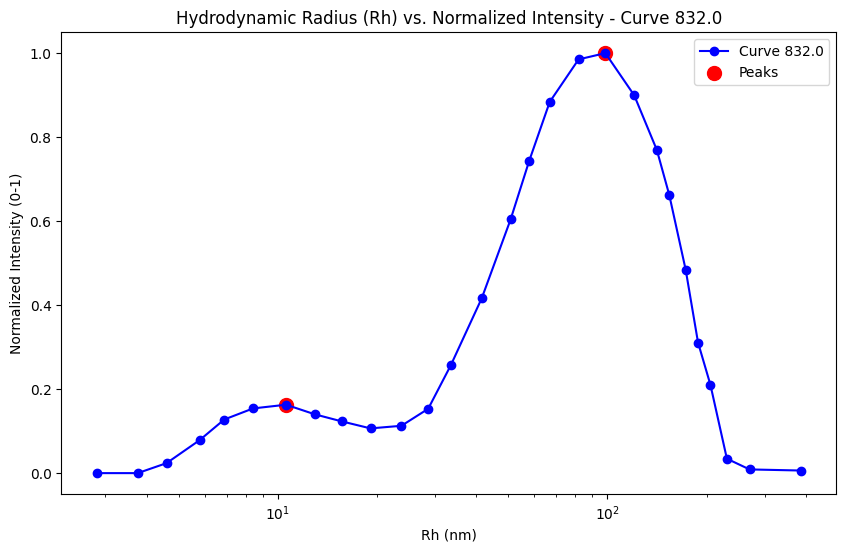

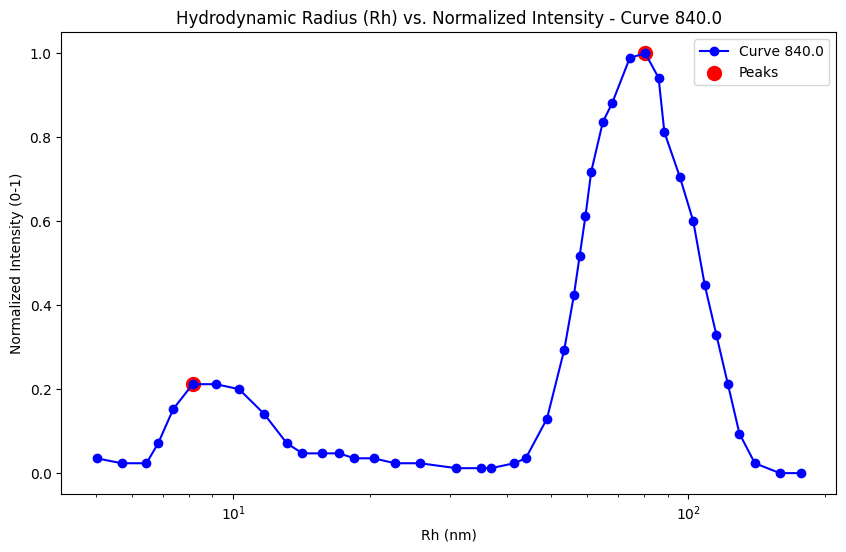

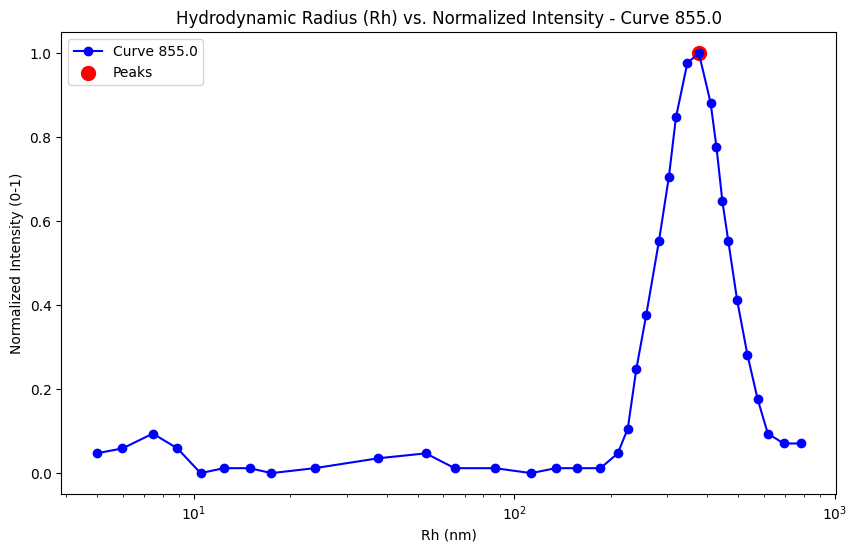

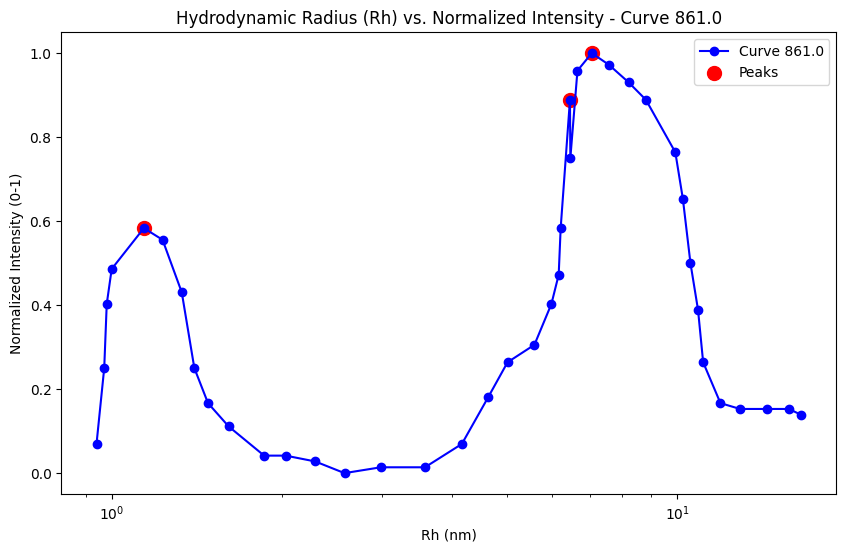

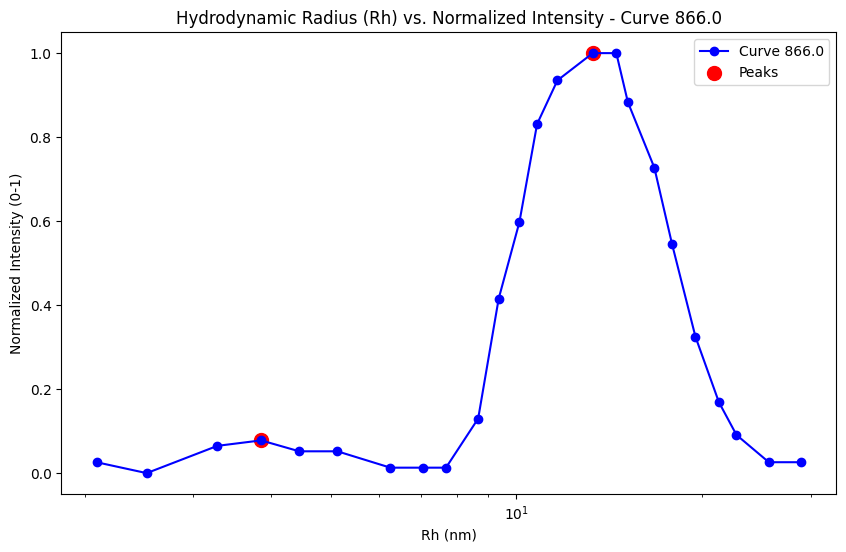

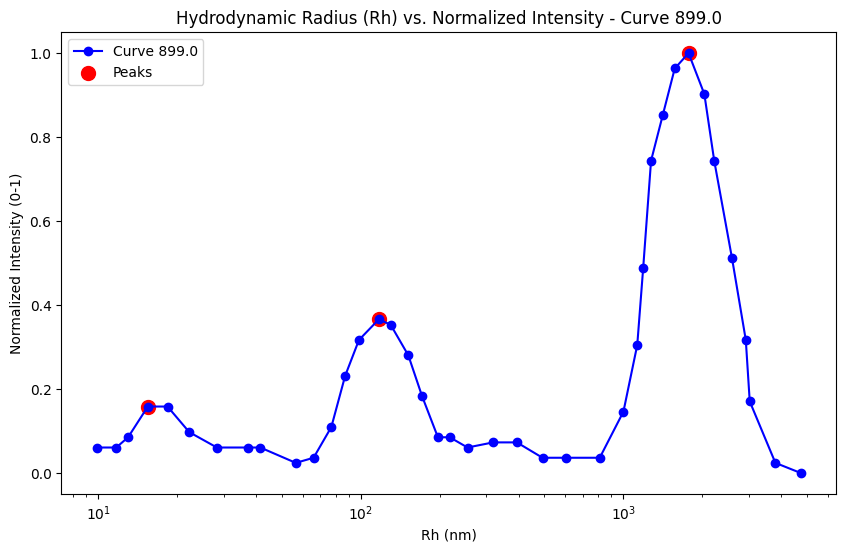

In [65]:
visualize_curves(manual_handle_data_all_rh,peak="peaks",rh_col= 'Rh at peaks')


In [66]:
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 8].index[0], 'peaks'] = np.array([3, 12])
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 136].index[0], 'peaks'] = np.array([17, 28])
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 140].index[0], 'peaks'] = np.array([6, 16, 28])
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 142].index[0], 'peaks'] = np.array([11, 21, 31])

manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 149].index[0], 'peaks'] = np.array([7, 18 ,31])
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 226].index[0], 'peaks'] = np.array([6, 20])
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 260].index[0], 'peaks'] = np.array([9, 17])


manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 334].index[0], 'peaks'] = np.array([3, 18,33])

manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 343].index[0], 'peaks'] = [15]
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 540].index[0], 'peaks'] = np.array([10,15])

manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 542].index[0], 'peaks'] = np.array([27, 46])
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 545].index[0], 'peaks'] = np.array([2, 8, 10, 14])
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 552].index[0], 'peaks'] = np.array([3,6, 13, 19])
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 549].index[0], 'peaks'] = np.array([3, 6, 12, 20])

manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 812].index[0], 'peaks'] = np.array([10,31])

manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 840].index[0], 'peaks'] = np.array([6, 31])
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 855].index[0], 'peaks'] = np.array([2,10,25])
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 861].index[0], 'peaks'] = np.array([4,26])
manual_handle_data_all_rh.at[manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] == 861].index[0], 'peaks'] = np.array([4,26])


In [67]:
print(manual_handle_data_all_rh[manual_handle_data_all_rh['matched index'] ==549][['peaks']])

              peaks
431  [3, 6, 12, 20]


In [68]:
print(manual_handle_data[manual_handle_data['matched index'] ==552][['peaks_above_one']])

    peaks_above_one
434        [13, 19]


In [69]:
manual_handle_data_all_rh[['Rh at peaks']] =manual_handle_data_all_rh.apply(
     lambda row: replace_manual_assigned_peaks(row,"peaks"), axis=1
    )

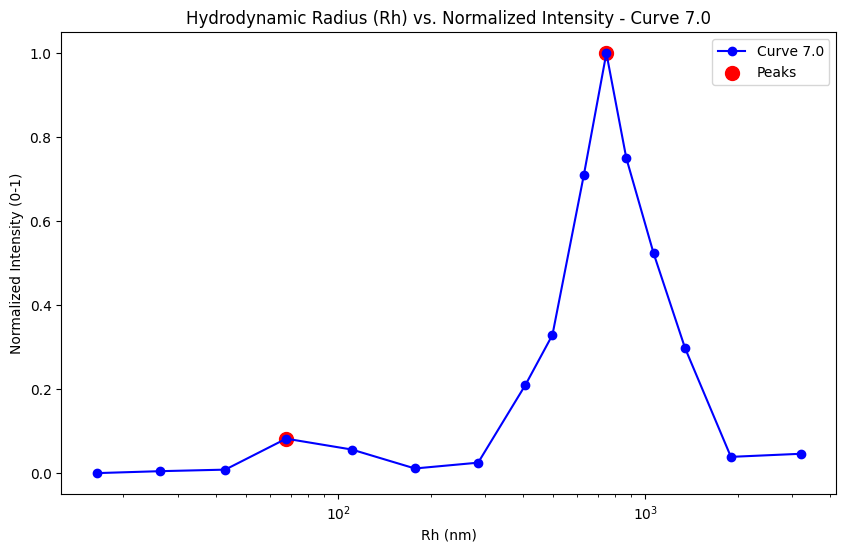

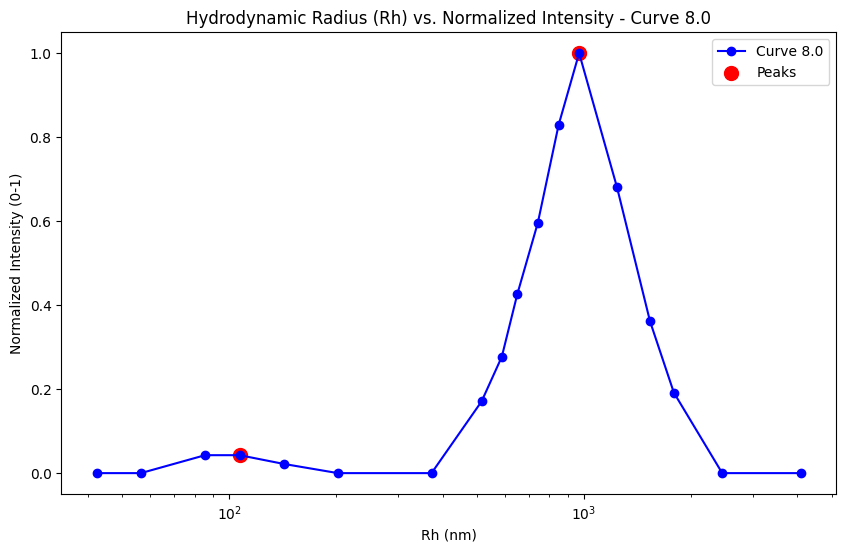

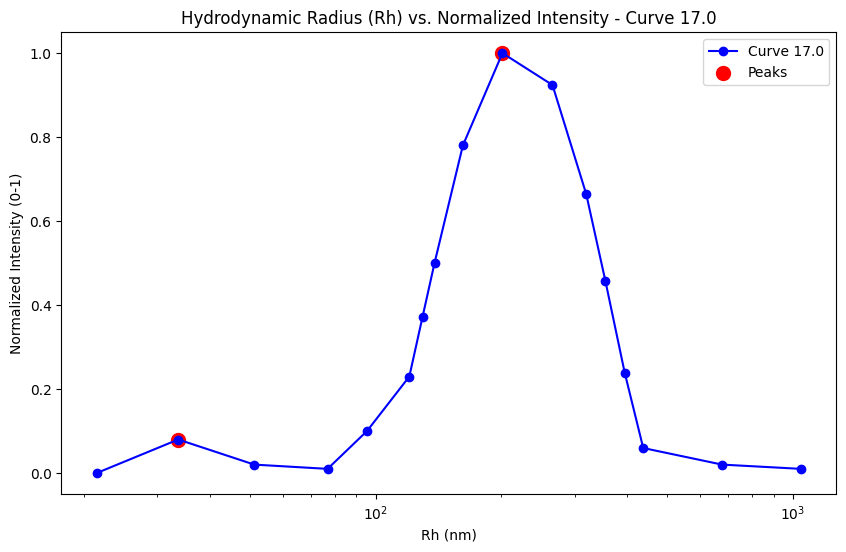

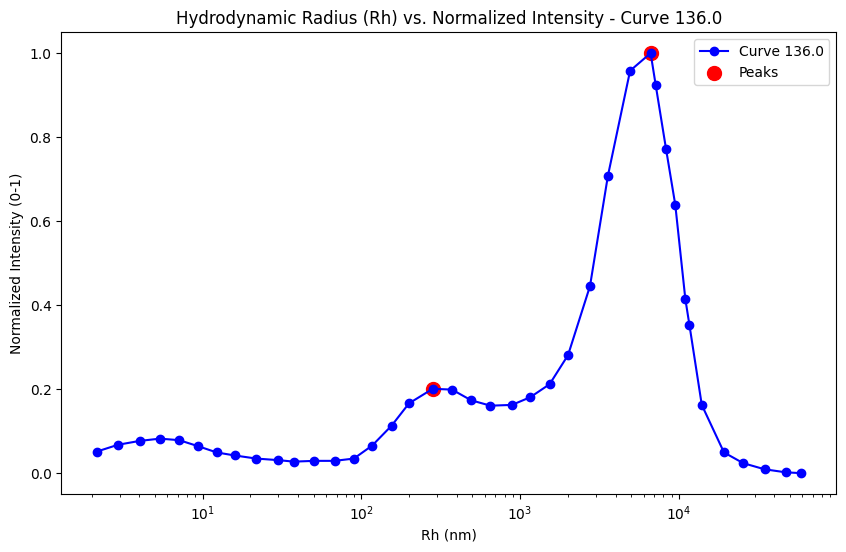

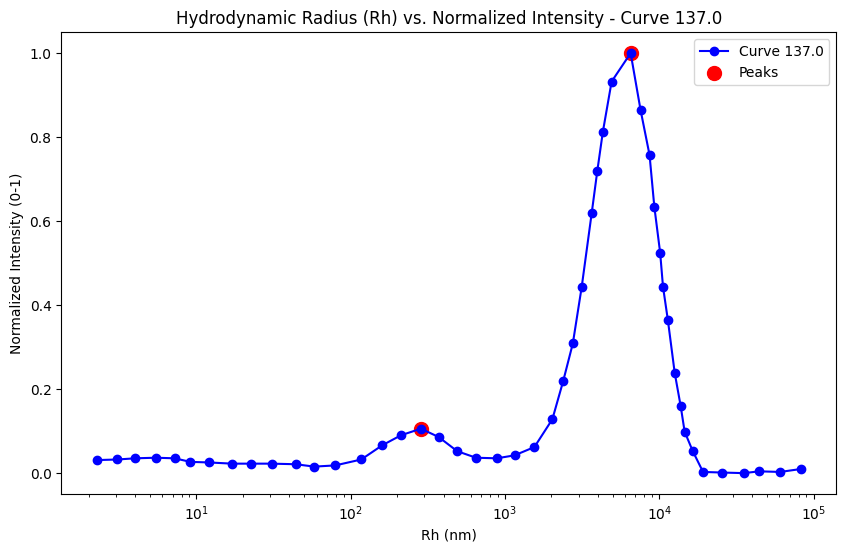

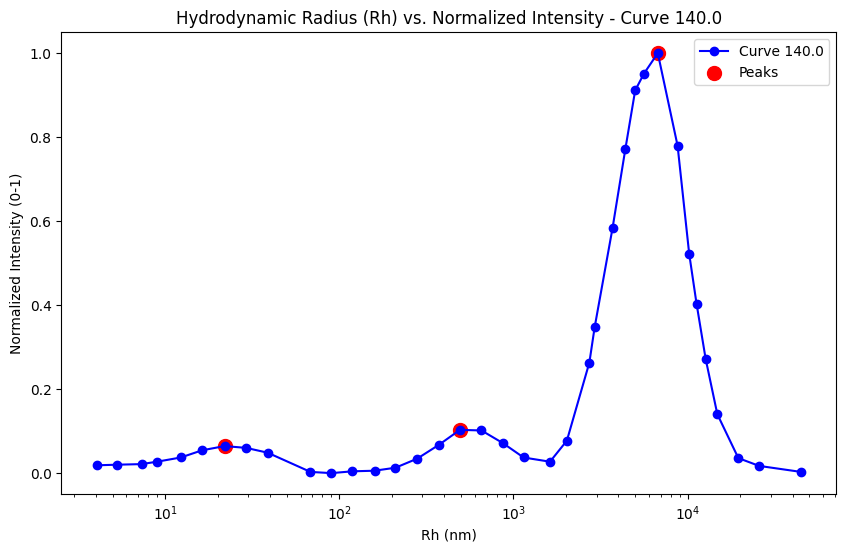

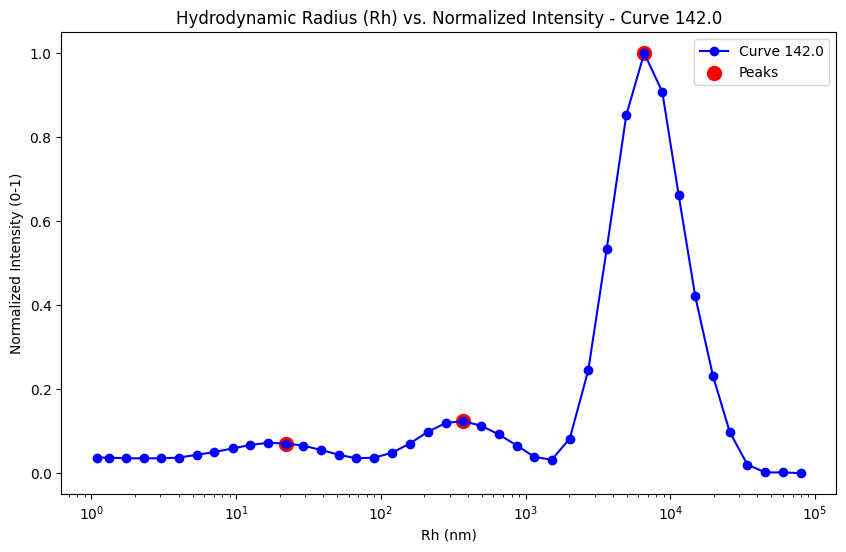

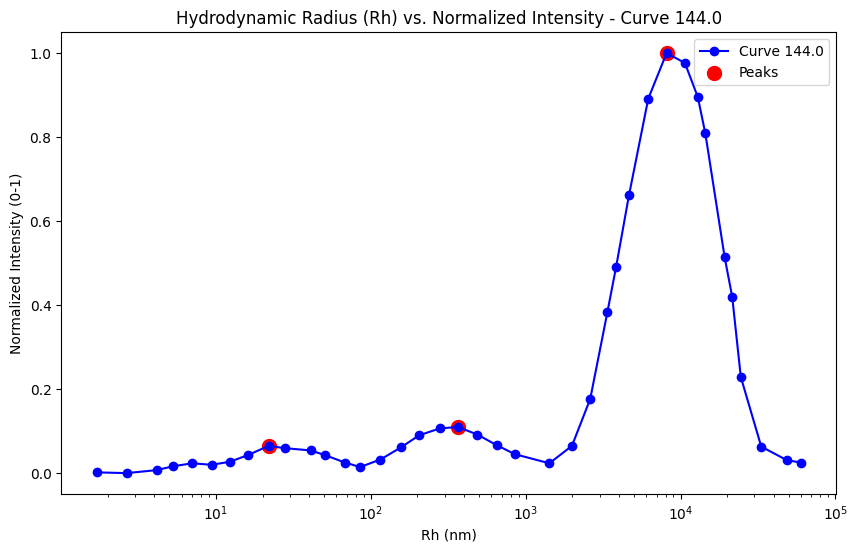

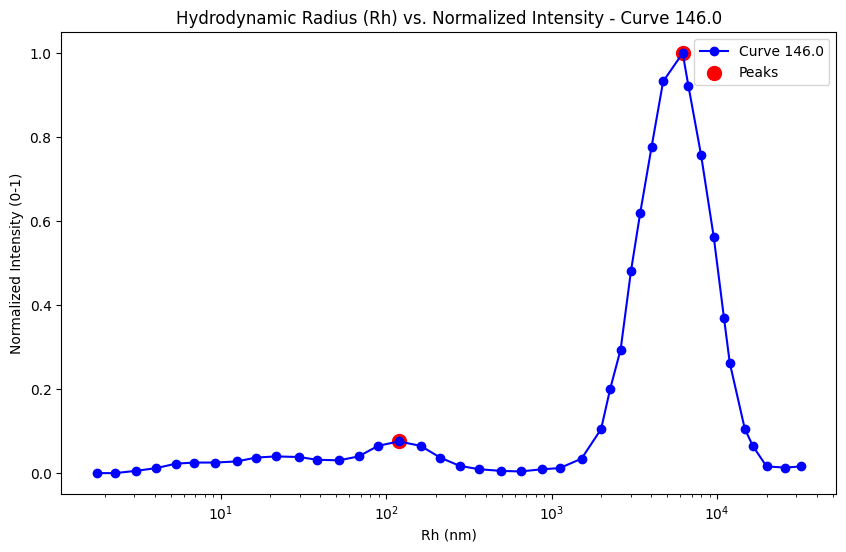

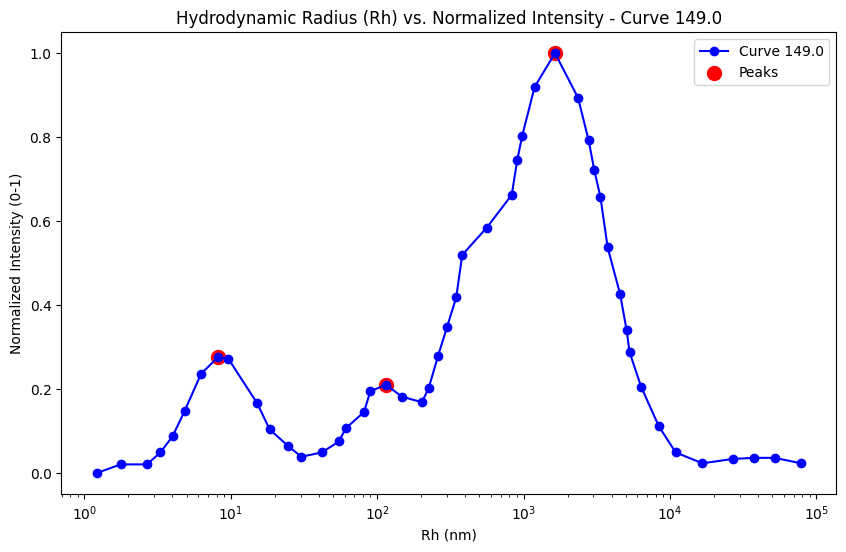

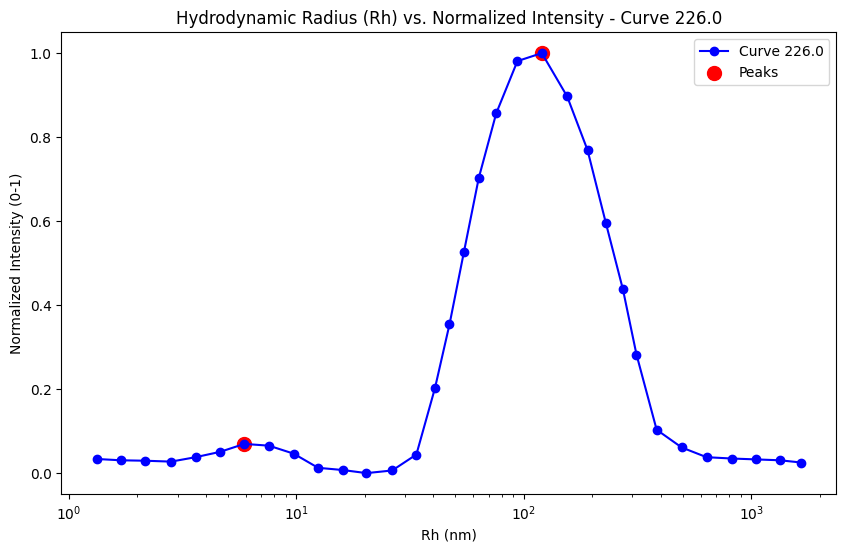

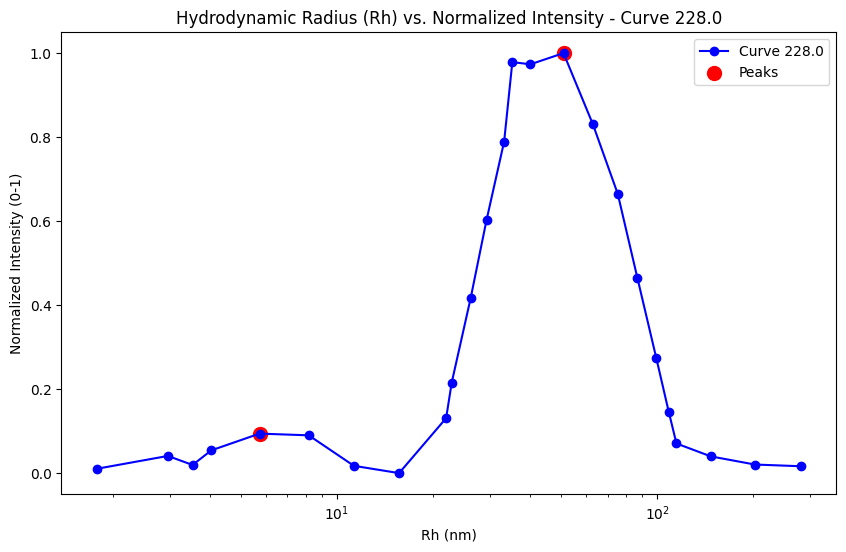

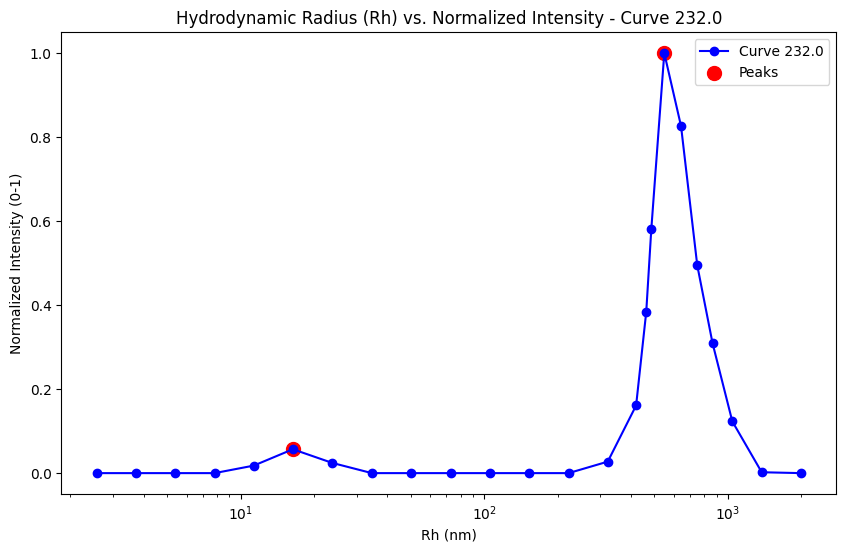

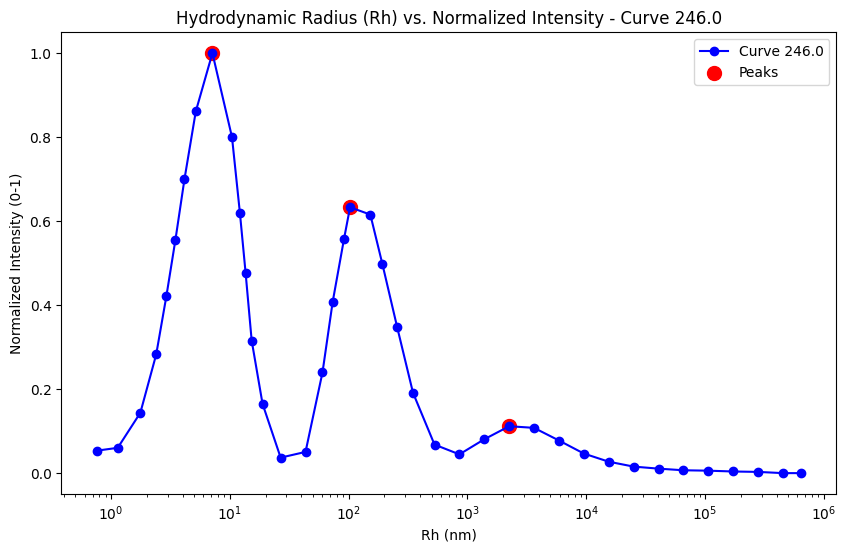

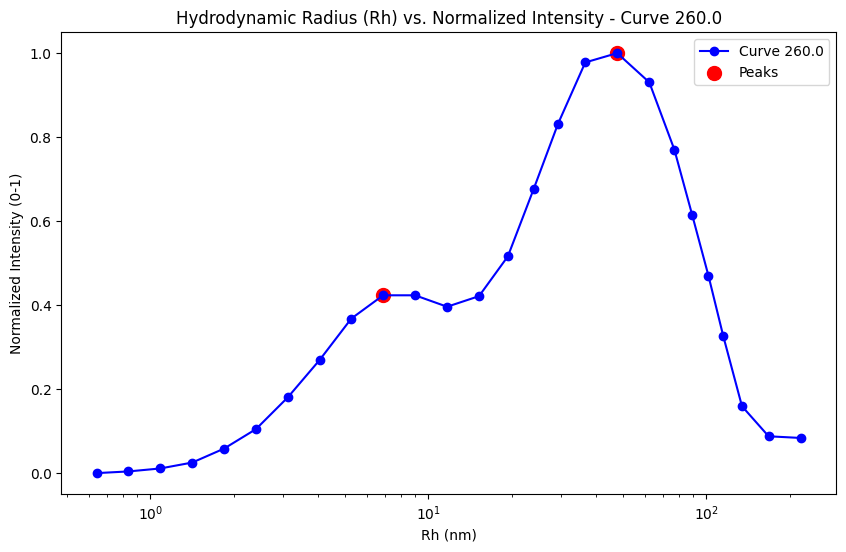

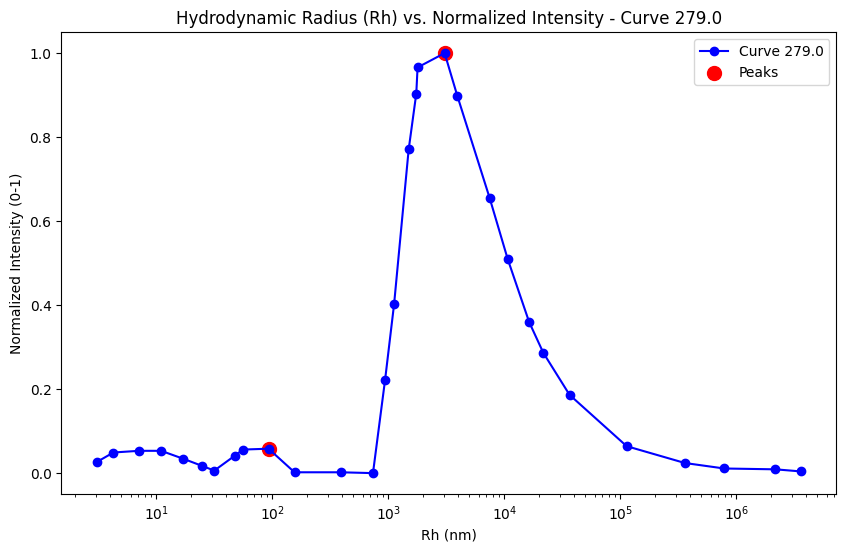

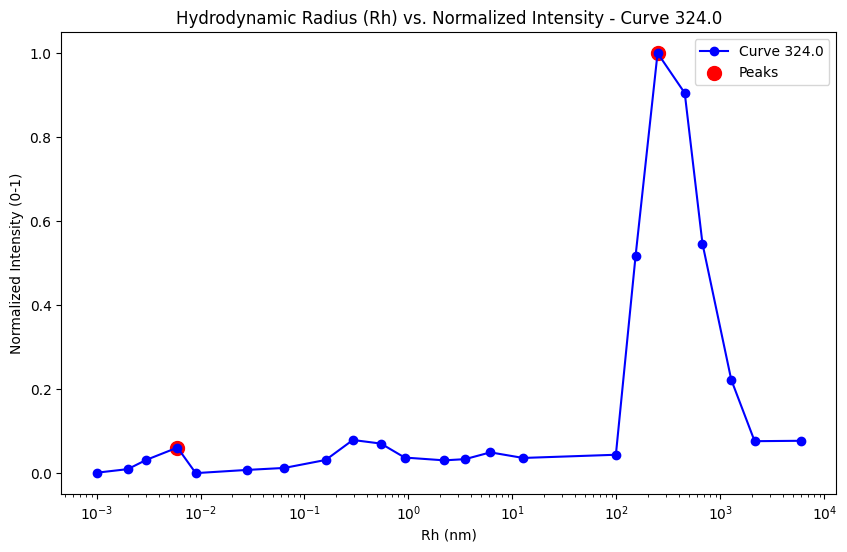

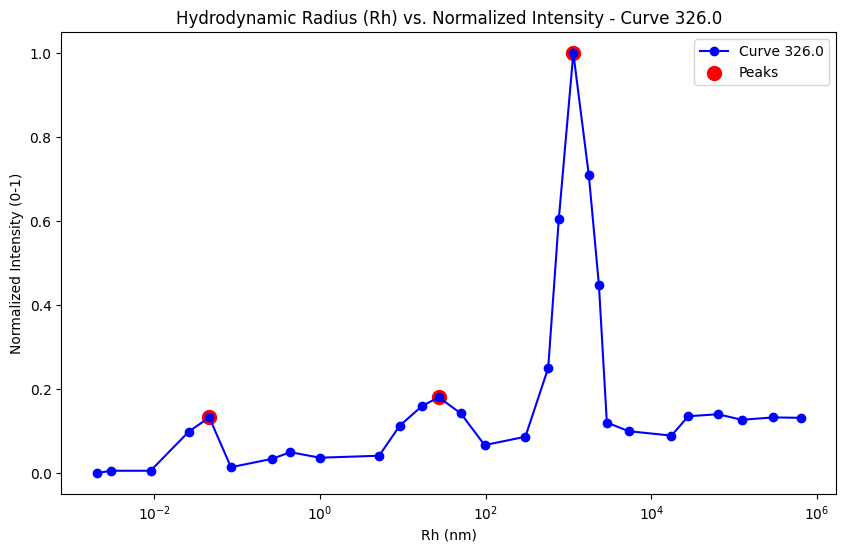

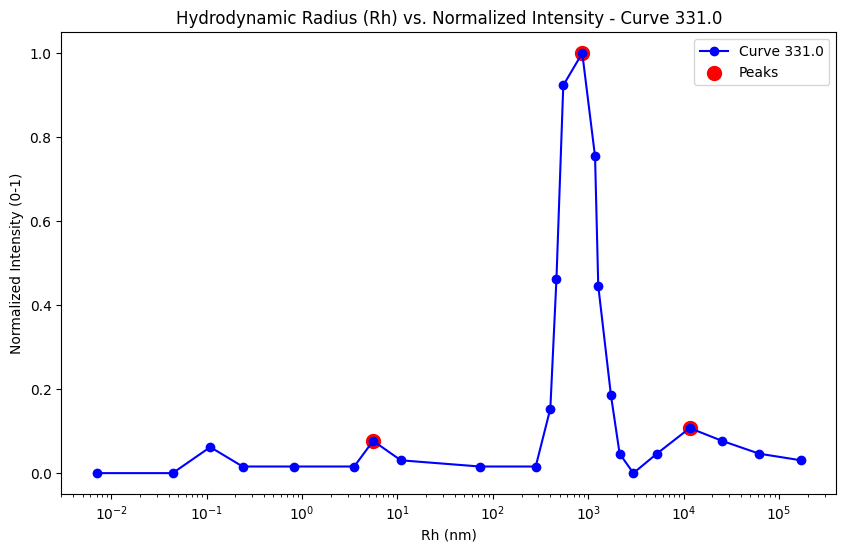

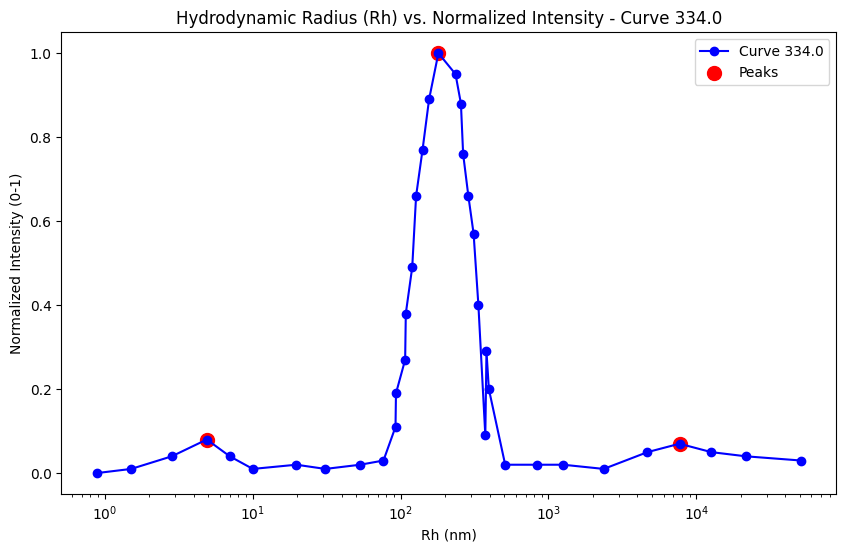

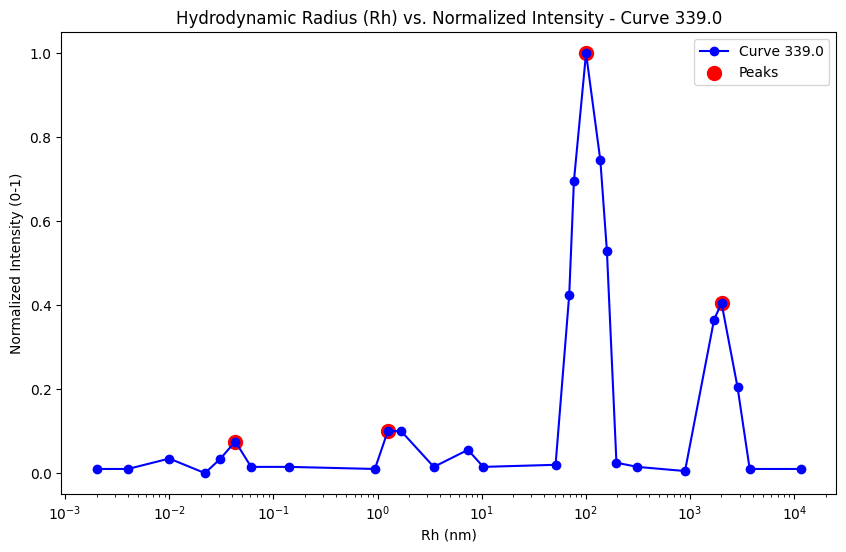

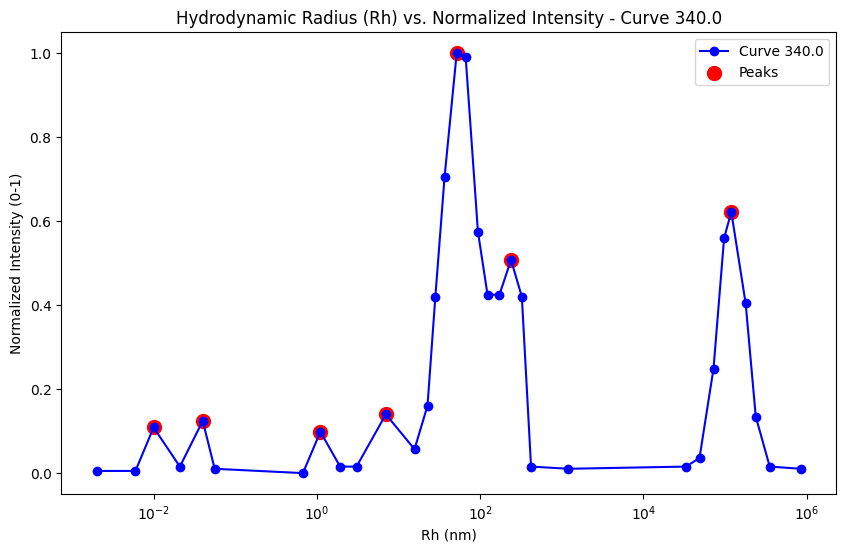

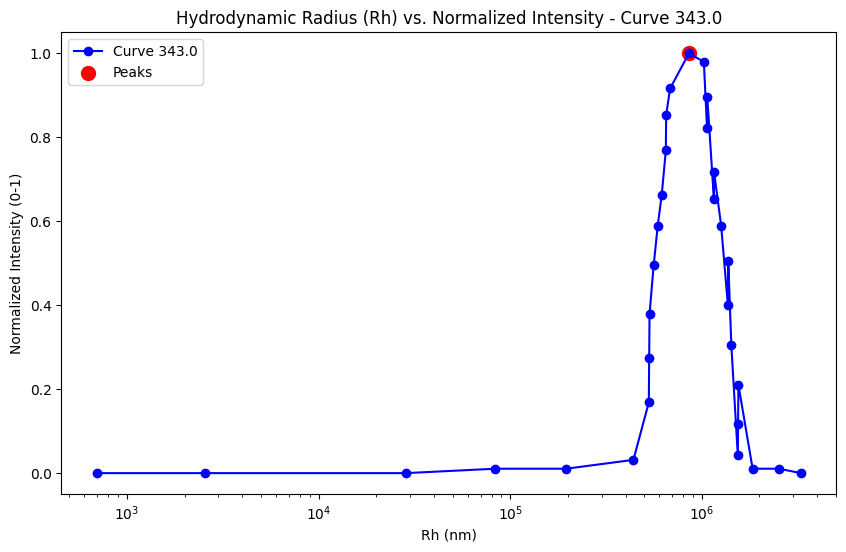

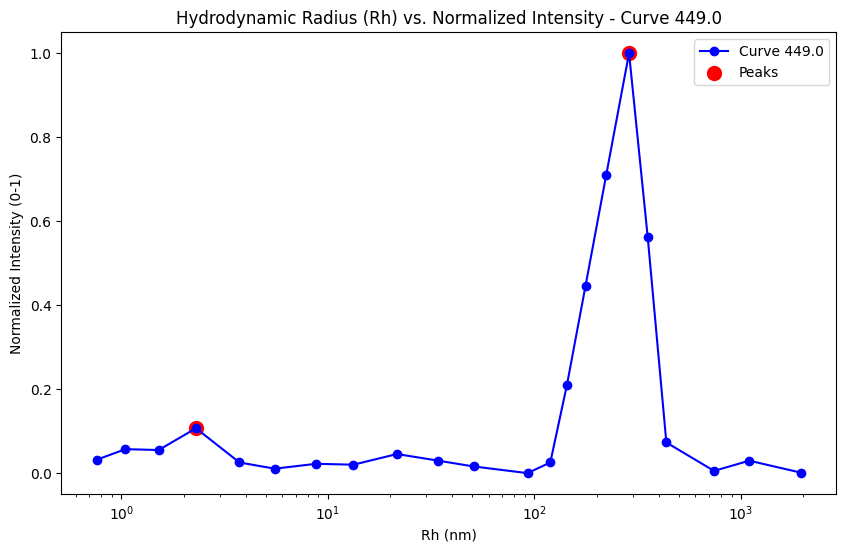

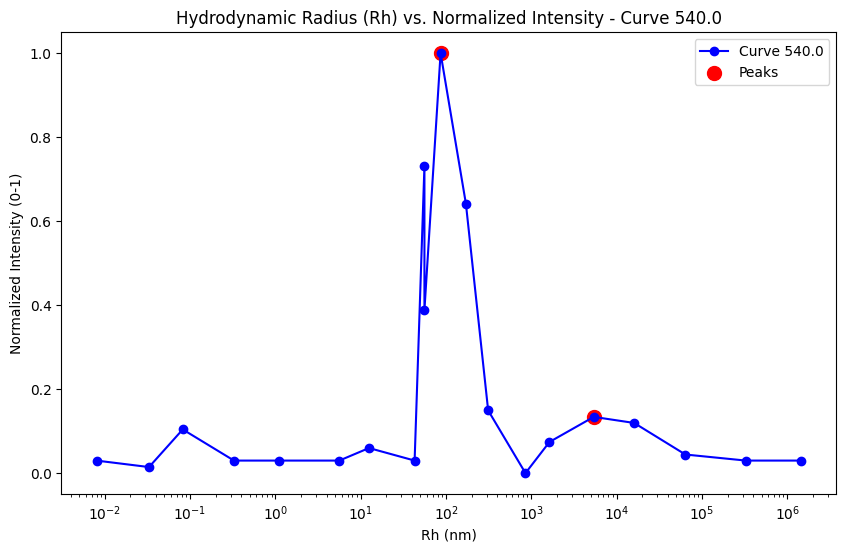

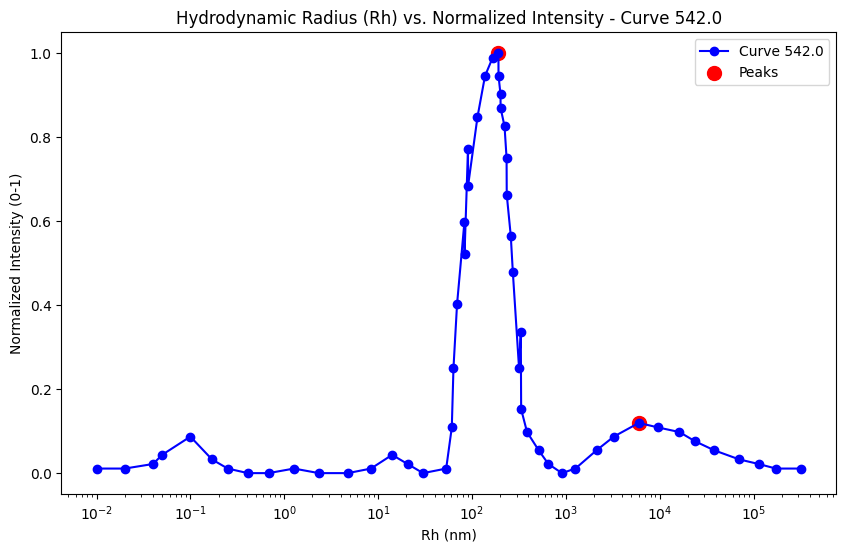

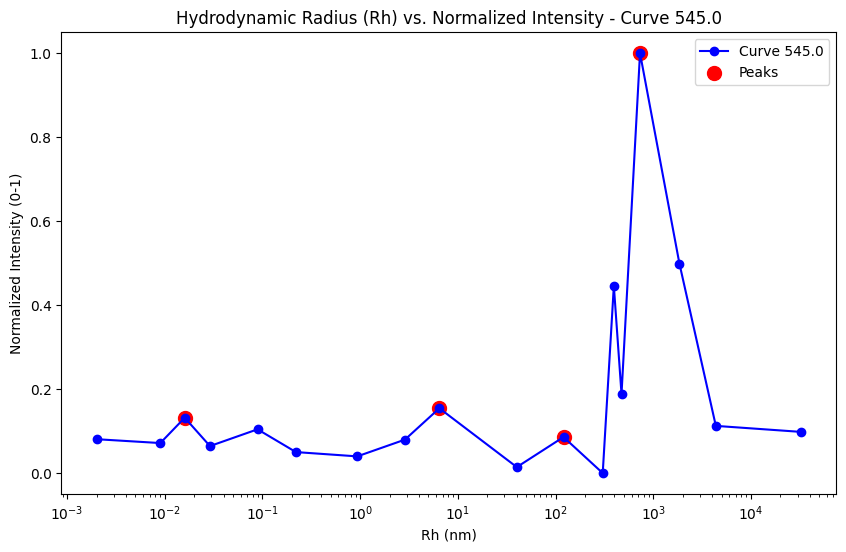

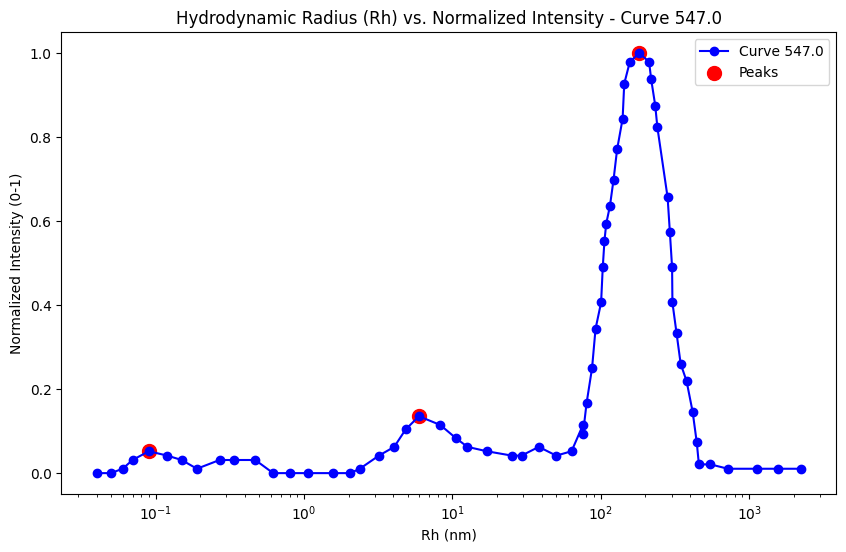

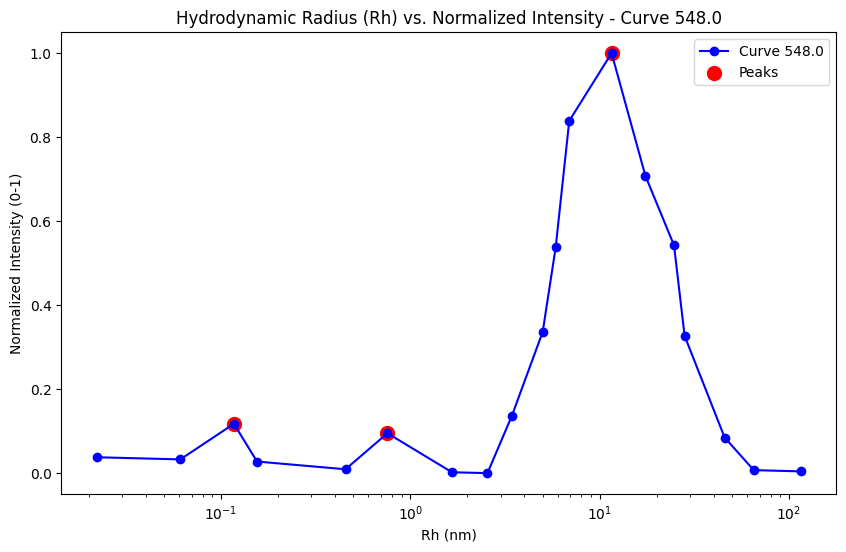

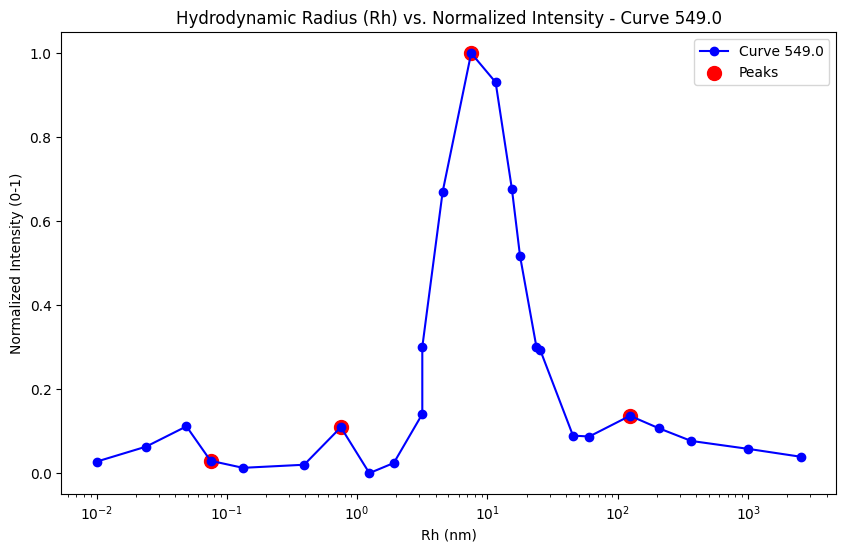

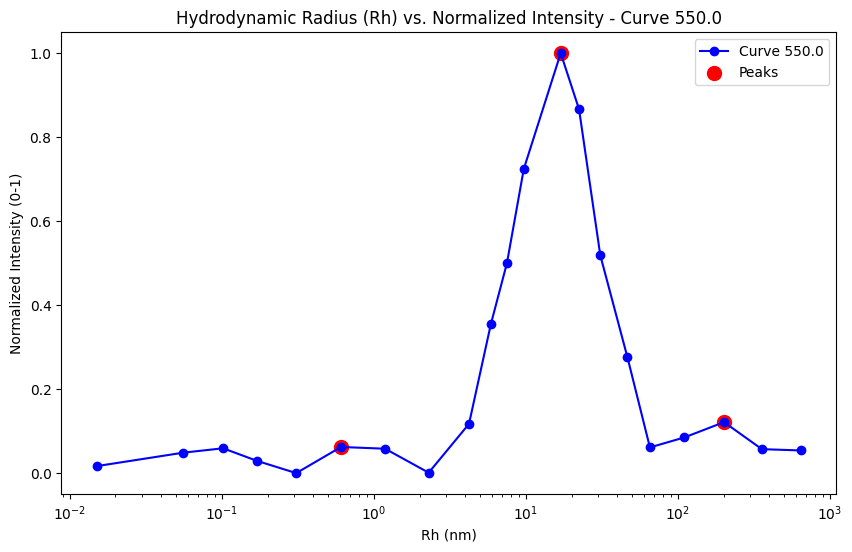

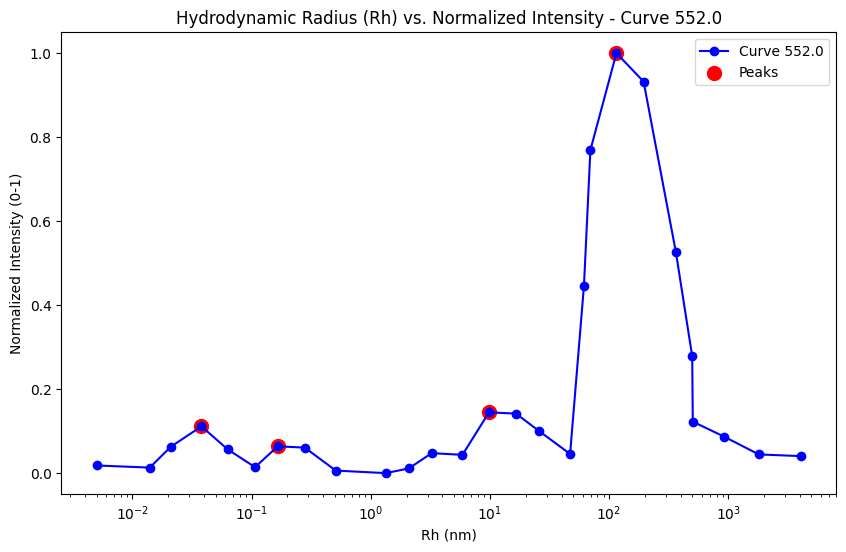

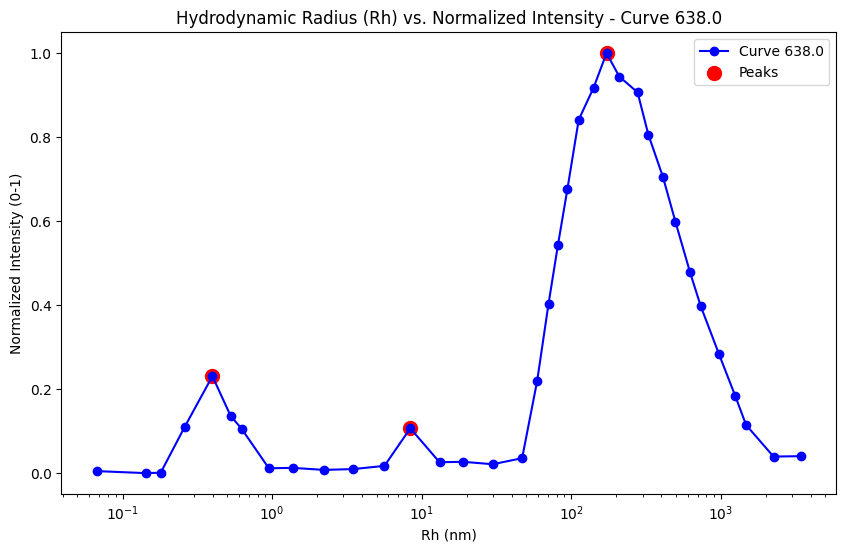

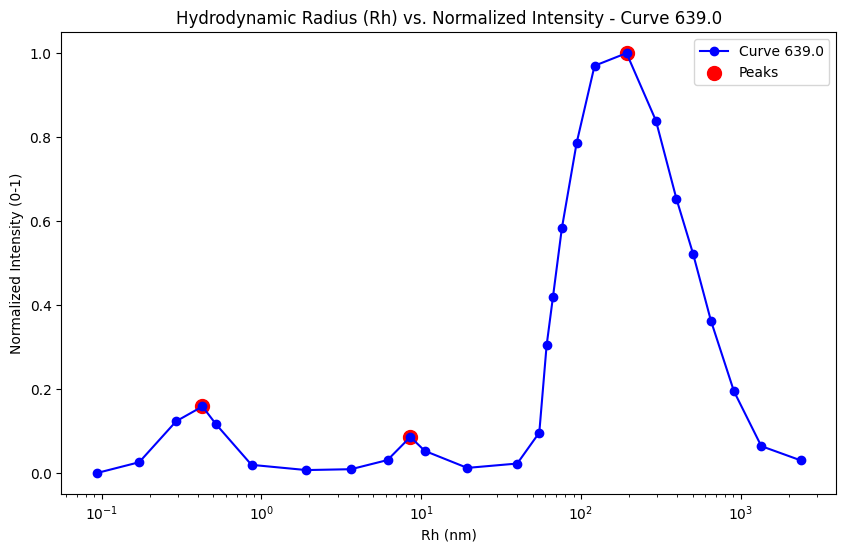

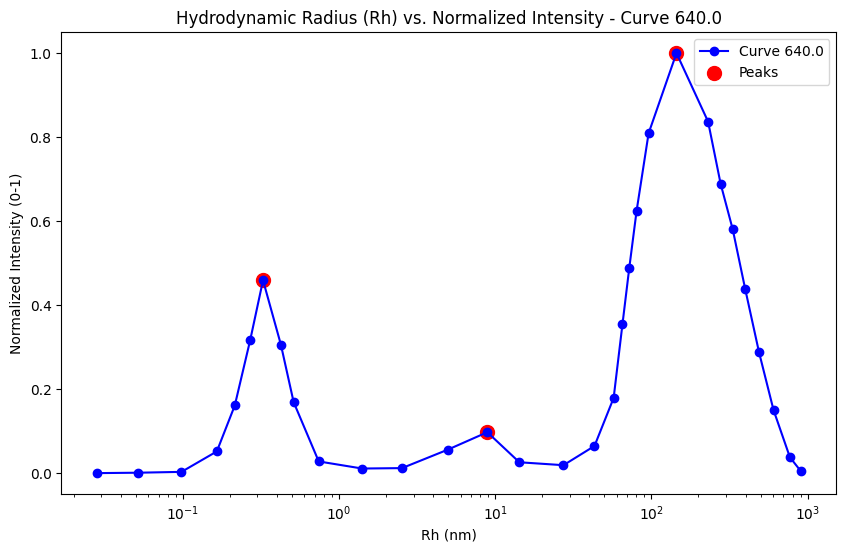

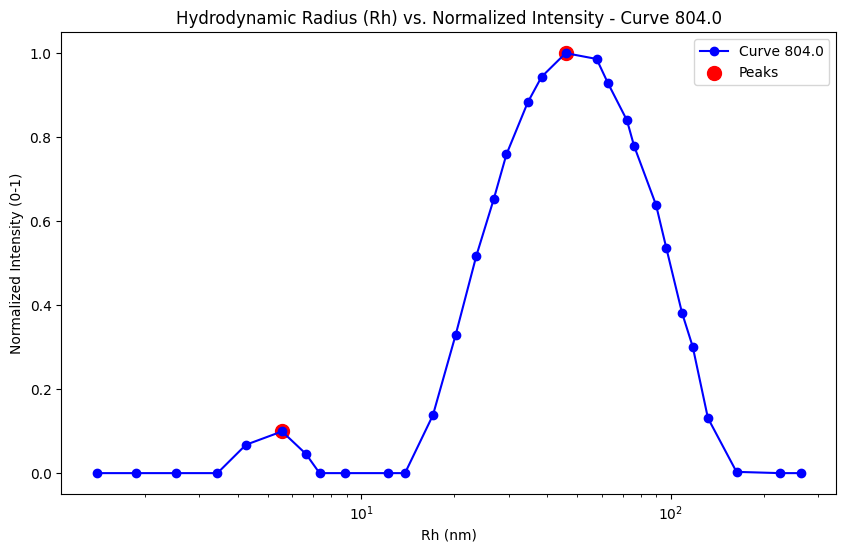

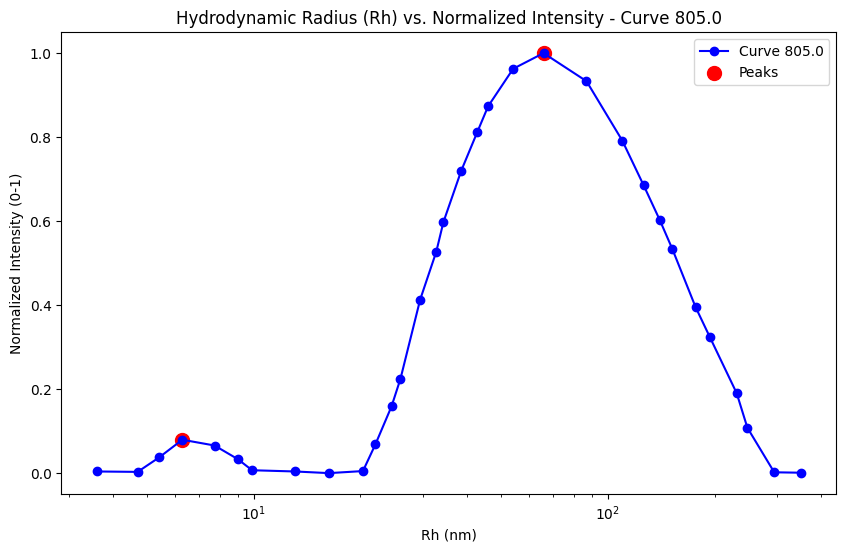

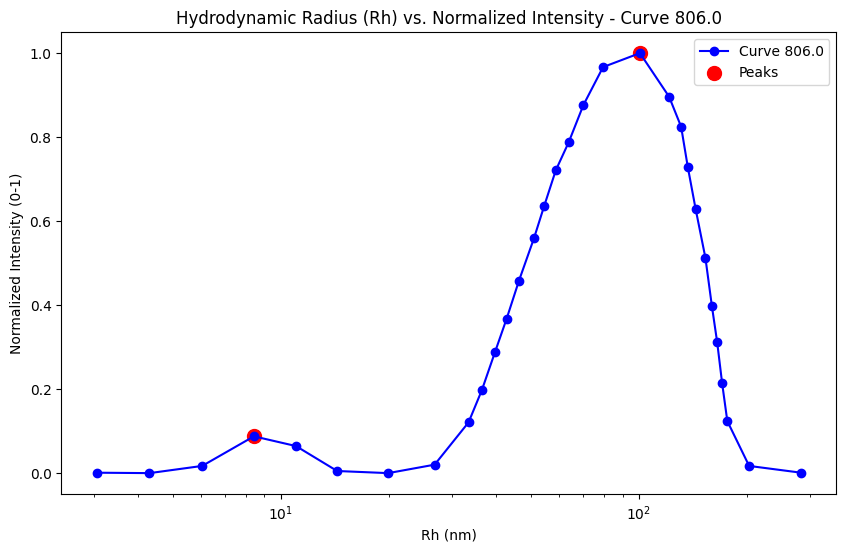

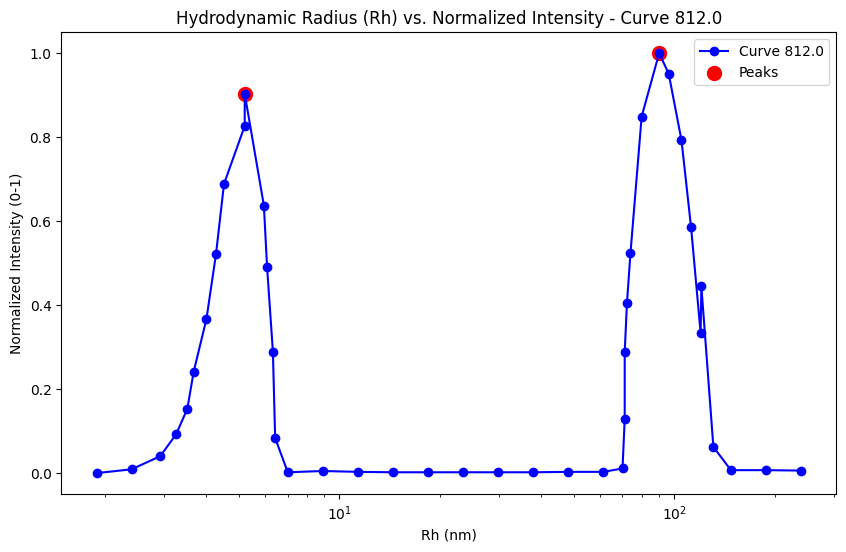

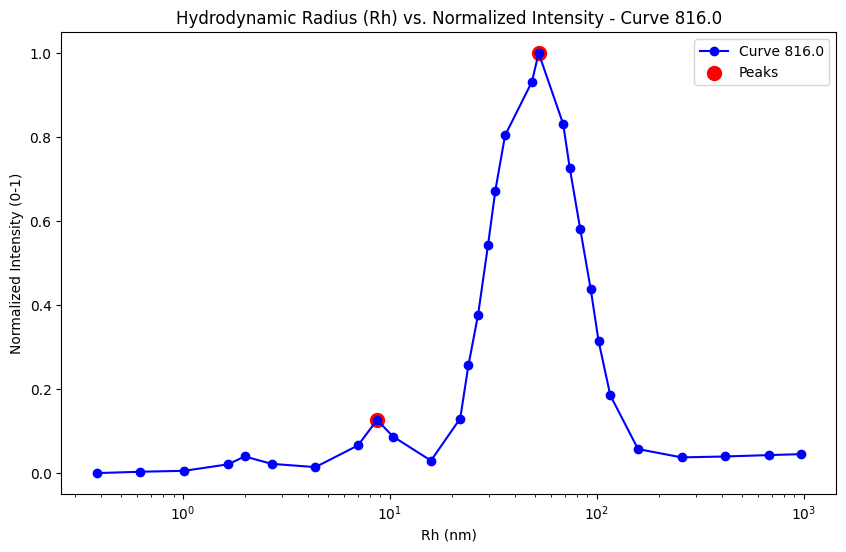

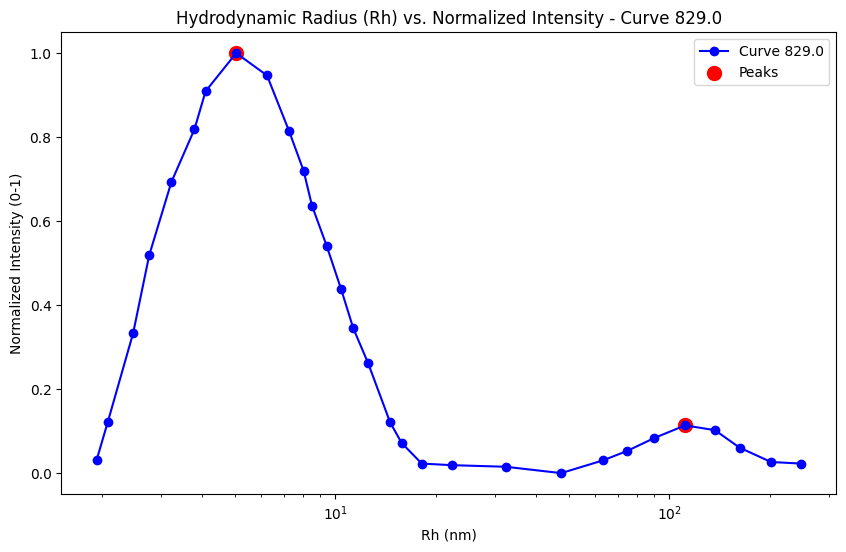

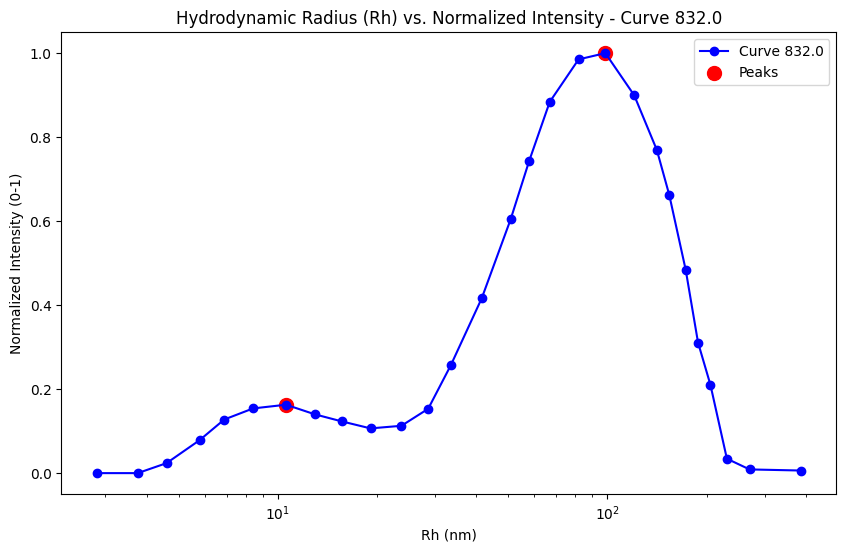

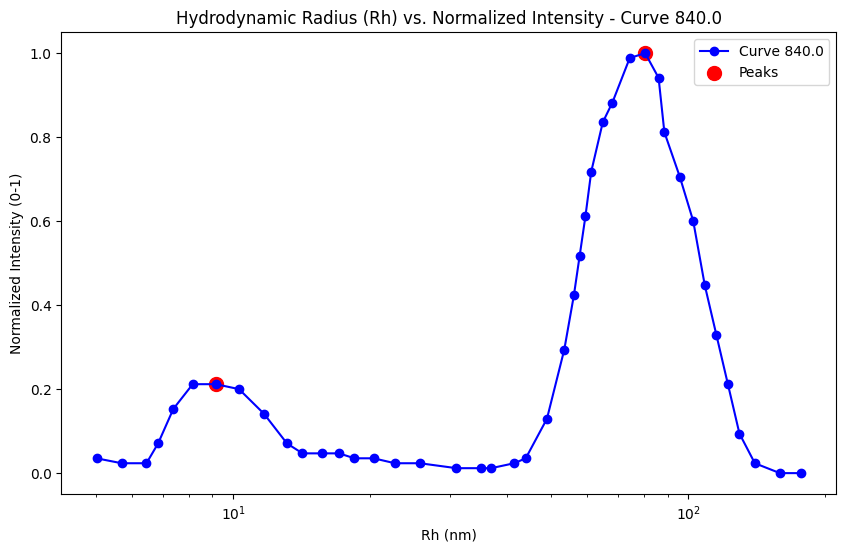

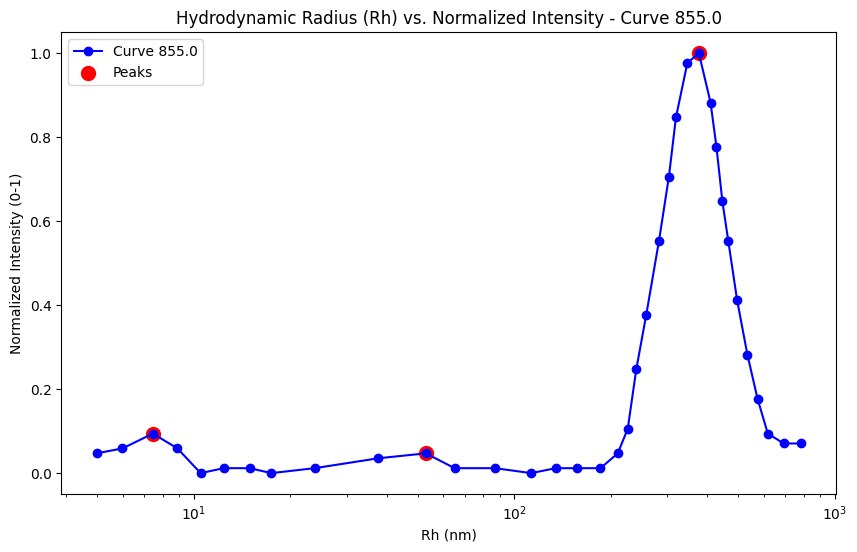

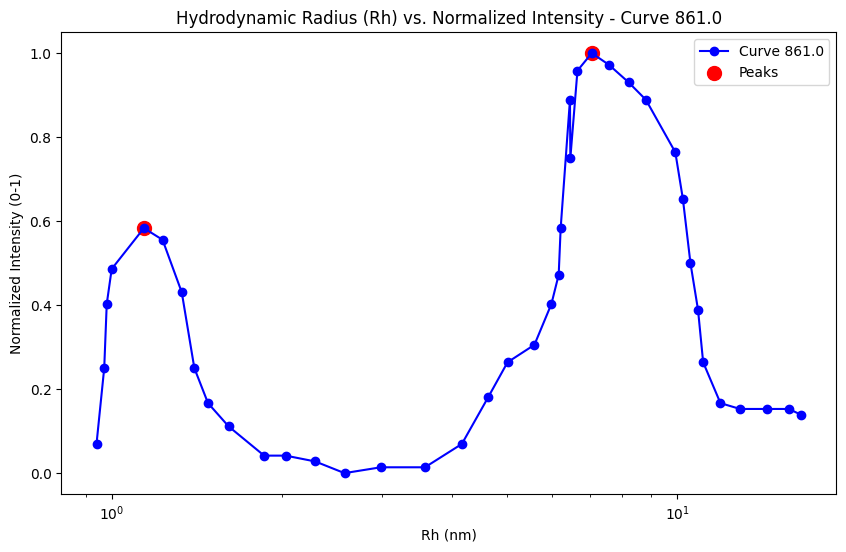

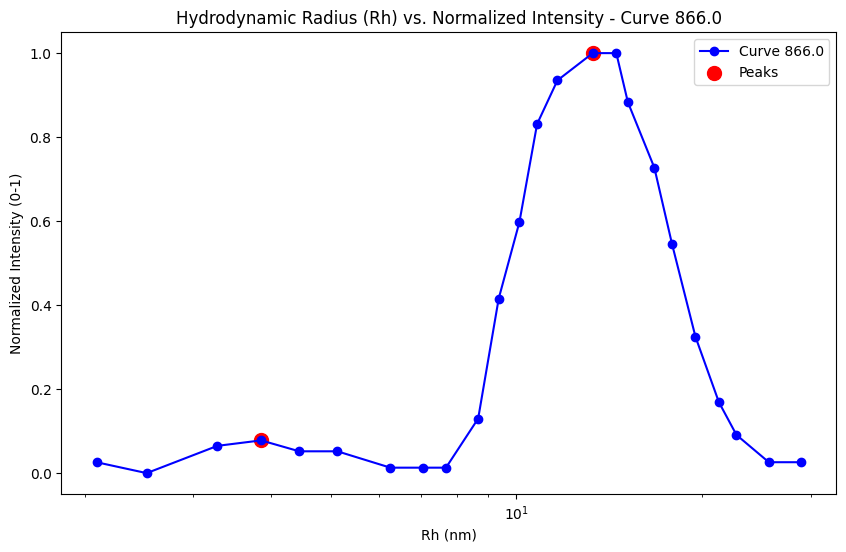

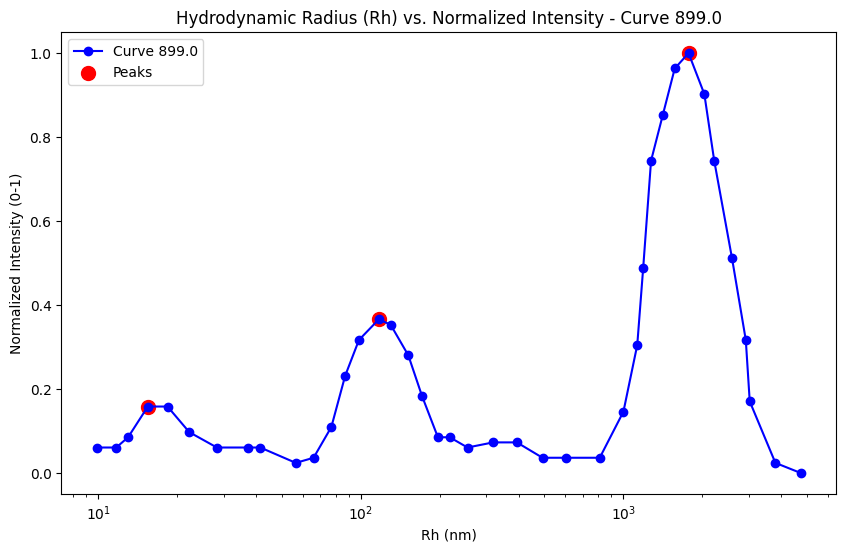

In [70]:
visualize_curves(manual_handle_data_all_rh,peak='peaks',rh_col= 'Rh at peaks')


In [71]:
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 8].index[0], 'peaks_above_one'] = np.array([3, 12])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 136].index[0], 'peaks_above_one'] = np.array([17, 28])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 140].index[0], 'peaks_above_one'] = np.array([6, 16, 28])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 142].index[0], 'peaks_above_one'] = np.array([11, 21, 31])

manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 149].index[0], 'peaks_above_one'] = np.array([7, 18, 31])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 226].index[0], 'peaks_above_one'] = np.array([6, 20])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 260].index[0], 'peaks_above_one'] = np.array([9, 17])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 324].index[0], 'peaks_above_one'] = [17]


# manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 327].index[0], 'peaks_above_one'] = [11, 18]

manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 334].index[0], 'peaks_above_one'] = np.array([3, 18, 33])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 339].index[0], 'peaks_above_one'] = np.array([10, 17, 24])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 343].index[0], 'peaks_above_one'] = [15]
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 540].index[0], 'peaks_above_one'] = np.array([10, 15])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 340].index[0], 'peaks_above_one'] = np.array([7, 10, 15, 20, 28])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 542].index[0], 'peaks_above_one'] = np.array([27, 46])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 545].index[0], 'peaks_above_one'] = np.array([8, 10, 14])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 547].index[0], 'peaks_above_one'] = np.array([20, 45])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 548].index[0], 'peaks_above_one'] = [12]
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 549].index[0], 'peaks_above_one'] = np.array([12, 20])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 550].index[0], 'peaks_above_one'] = np.array([12, 18])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 552].index[0], 'peaks_above_one'] = np.array([13, 19])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 552].index[0], 'peaks_above_one'] = np.array([13, 19])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 549].index[0], 'peaks_above_one'] = np.array([12, 20])

manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 812].index[0], 'peaks_above_one'] = np.array([10,31])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 840].index[0], 'peaks_above_one'] = np.array([6, 31])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 855].index[0], 'peaks_above_one'] = np.array([2,10,25])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 861].index[0], 'peaks_above_one'] = np.array([4,26])
manual_handle_data.at[manual_handle_data[manual_handle_data['matched index'] == 861].index[0], 'peaks_above_one'] = np.array([4,26])

In [72]:
print(manual_handle_data[manual_handle_data['matched index'] ==552][['peaks_above_one']])

    peaks_above_one
434        [13, 19]


In [73]:
# manual_handle_data['peaks'] = manual_handle_data['peaks'].apply(lambda x: np.array(x) if isinstance(x, list) else x)

In [74]:
manual_handle_data[['Rh (above 1 nm) at peaks']] =manual_handle_data.apply(
     lambda row: replace_manual_assigned_peaks(row,"peaks_above_one"), axis=1
    )

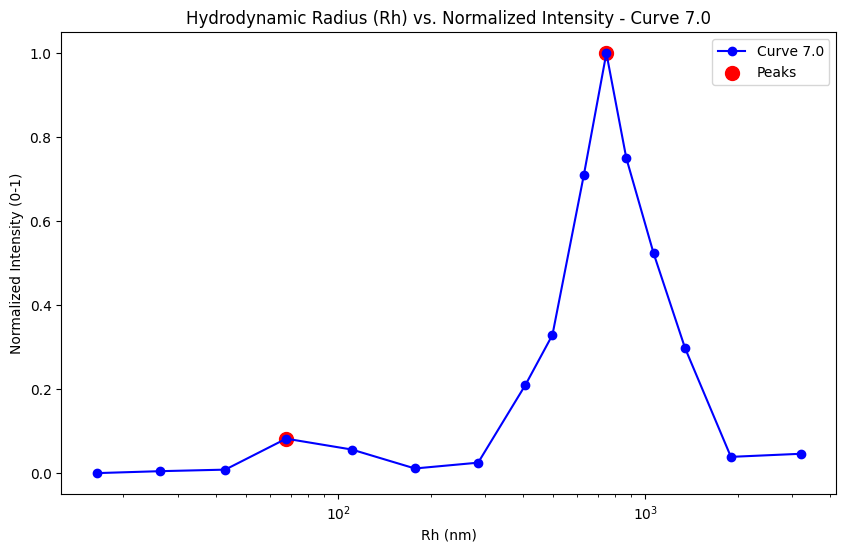

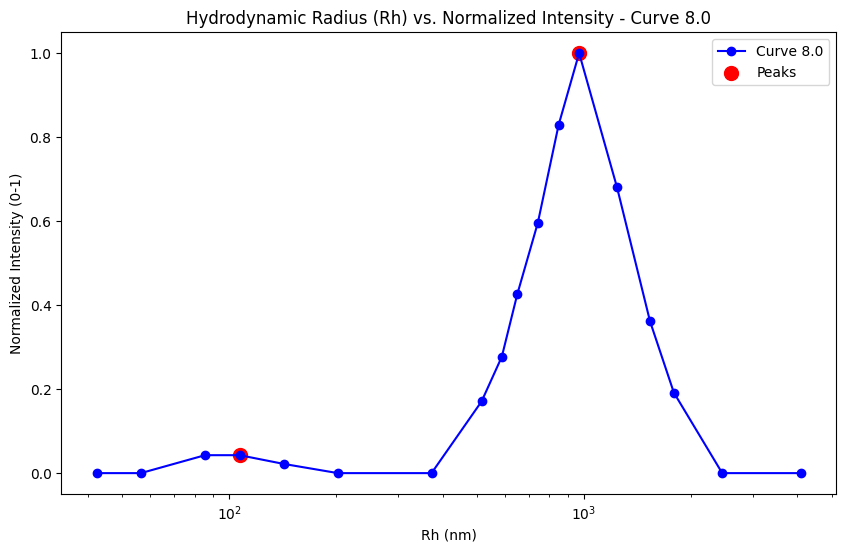

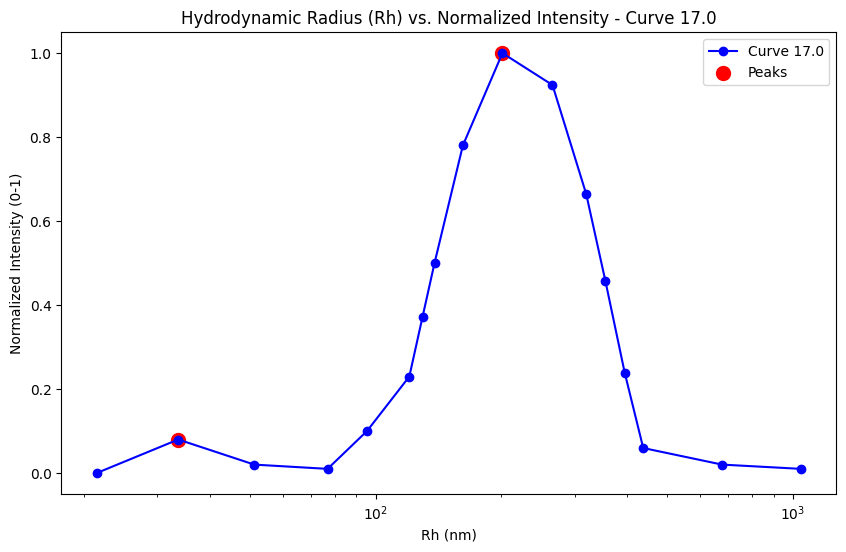

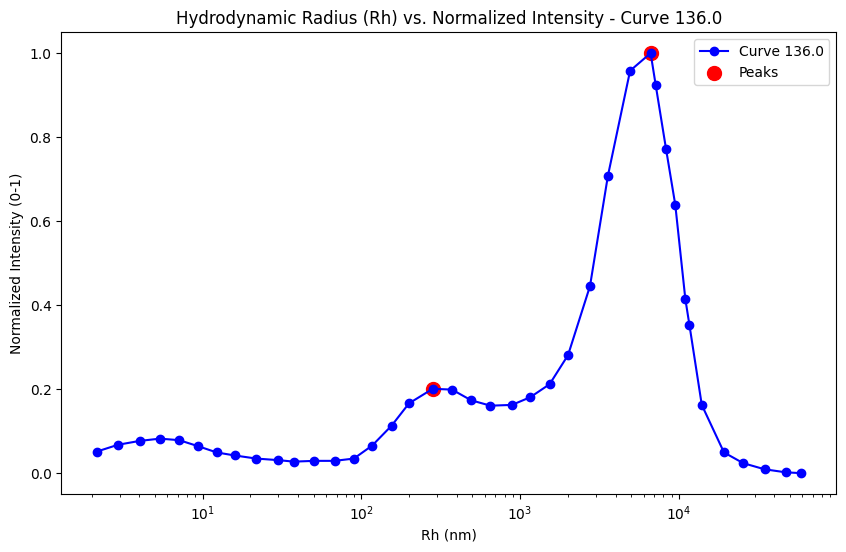

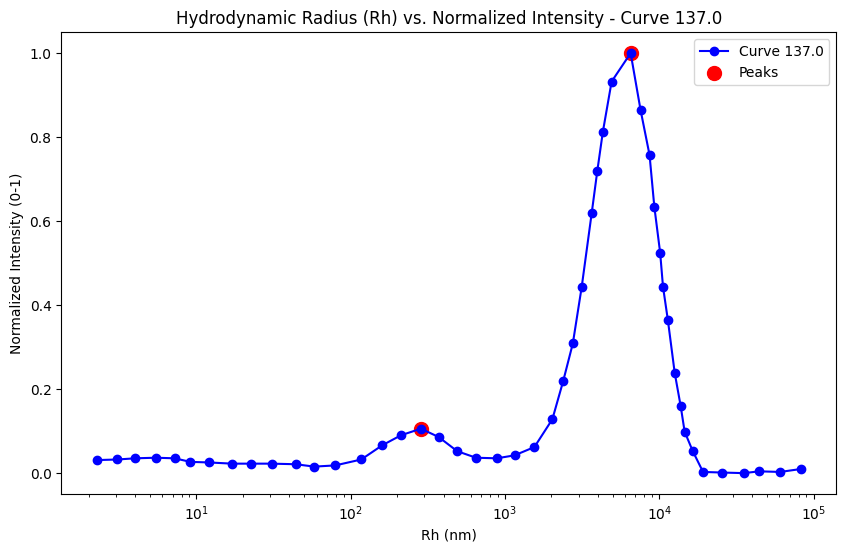

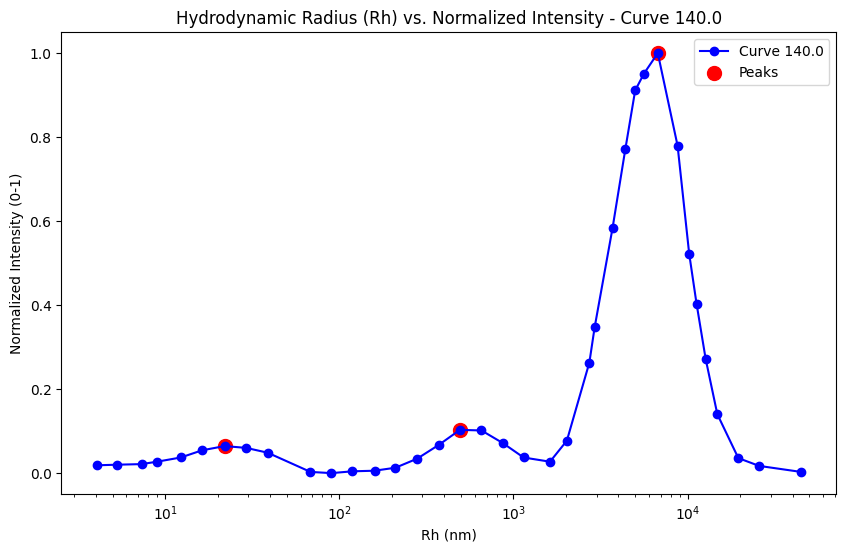

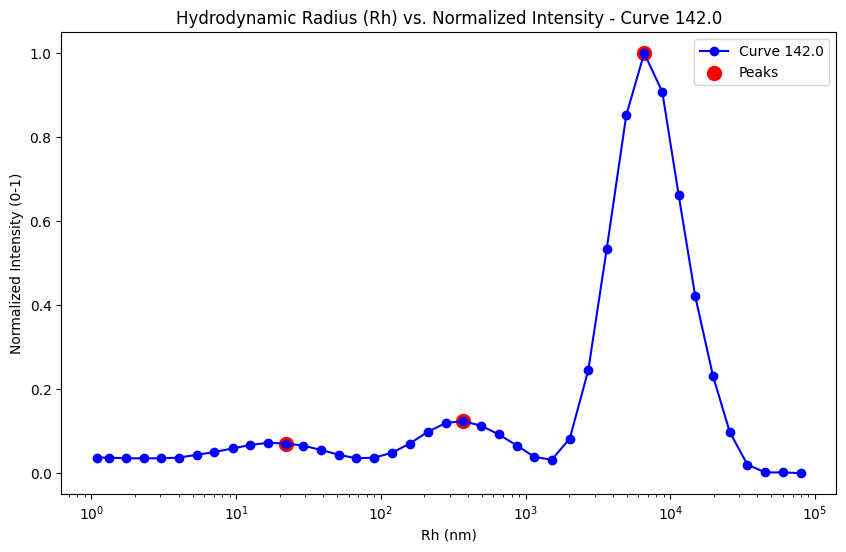

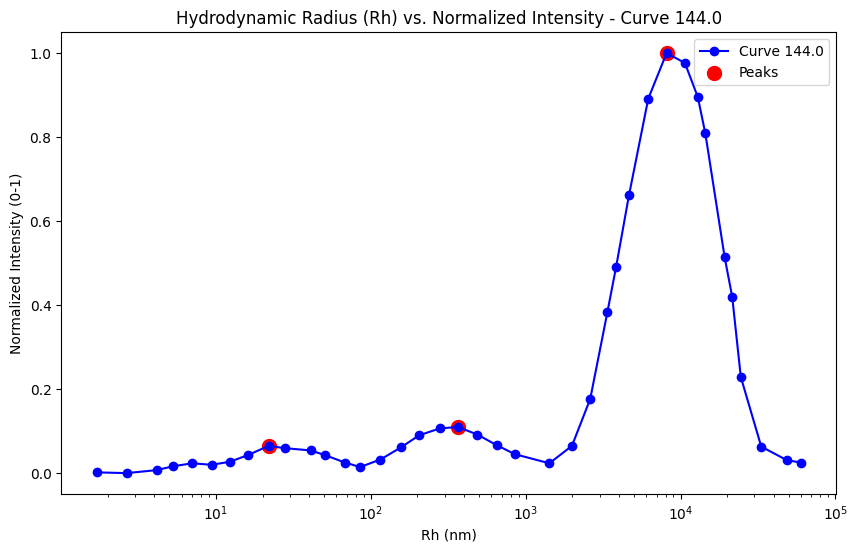

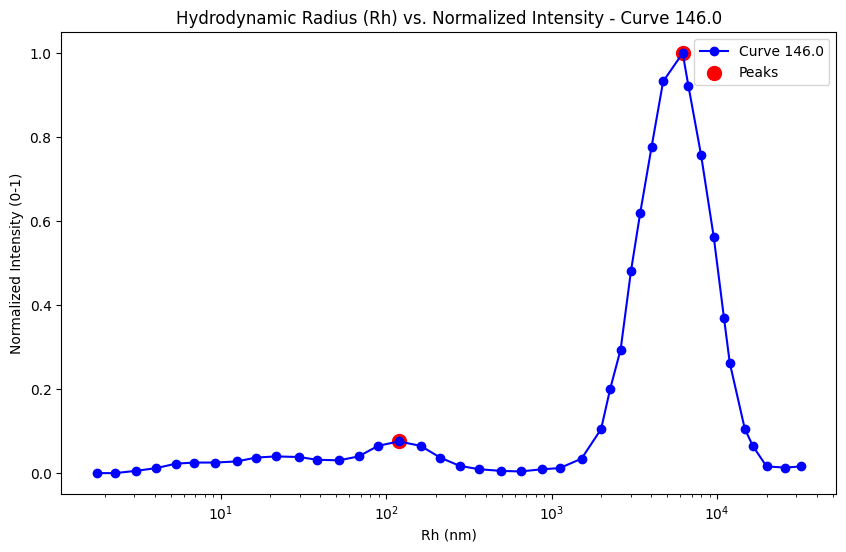

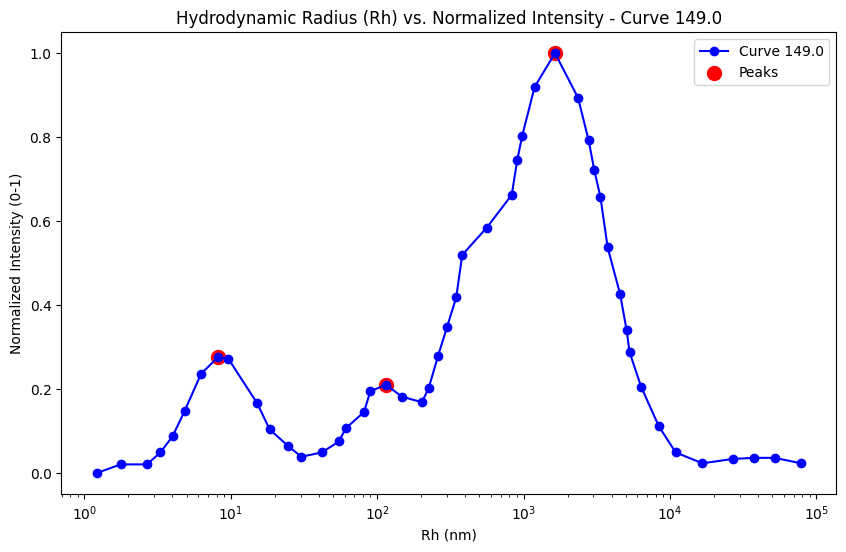

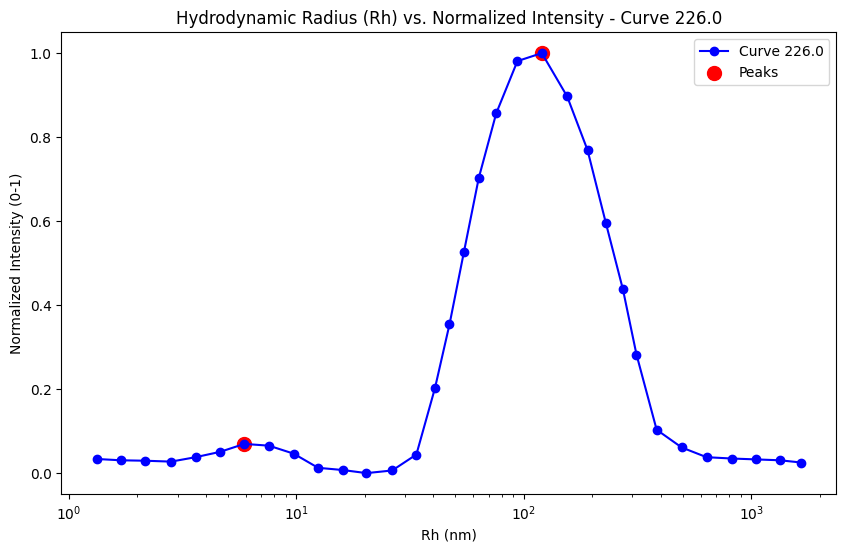

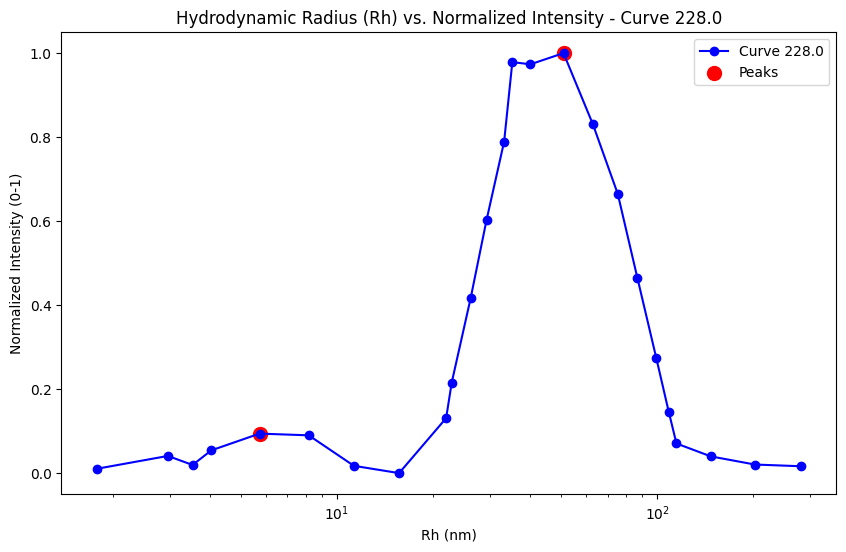

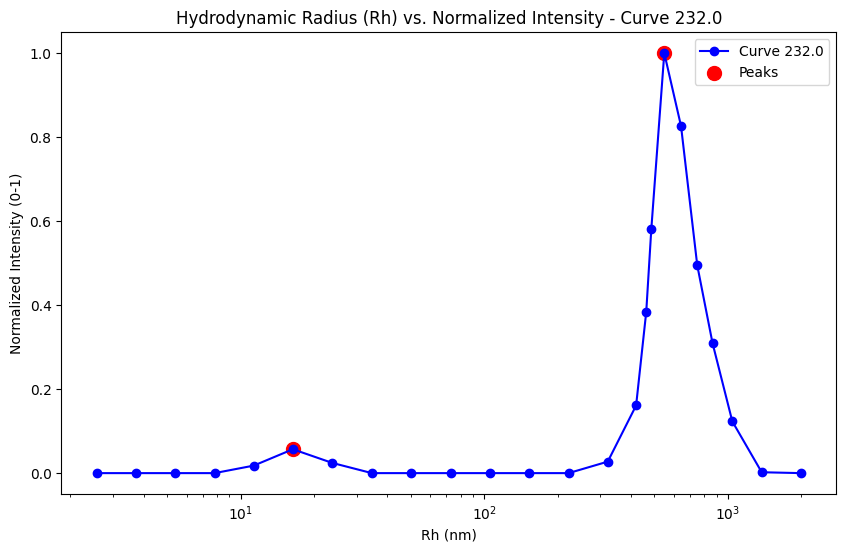

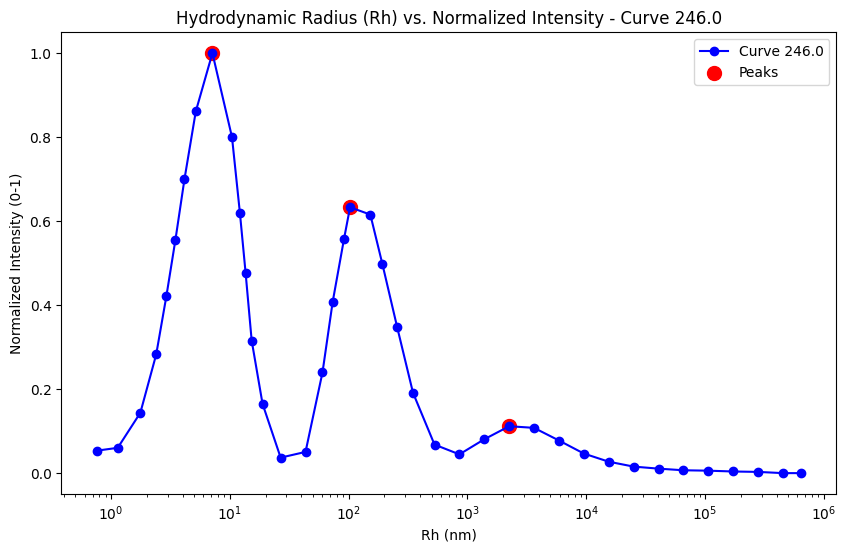

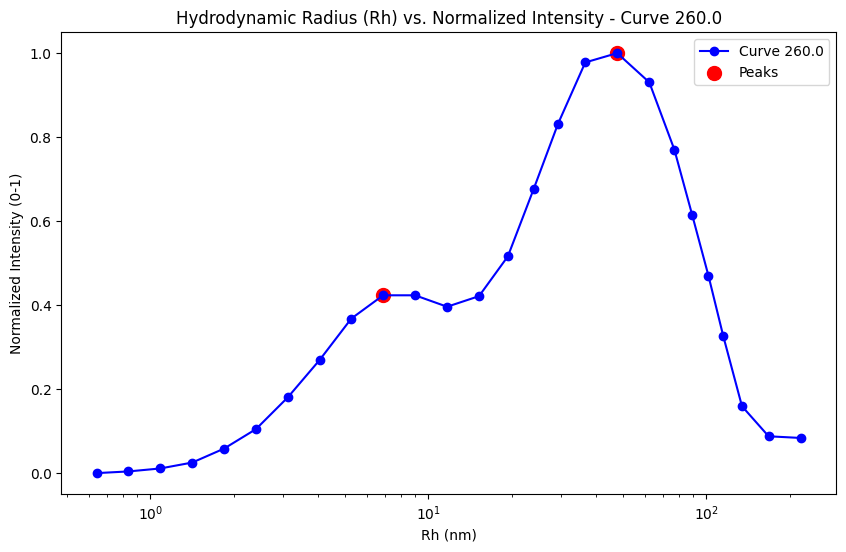

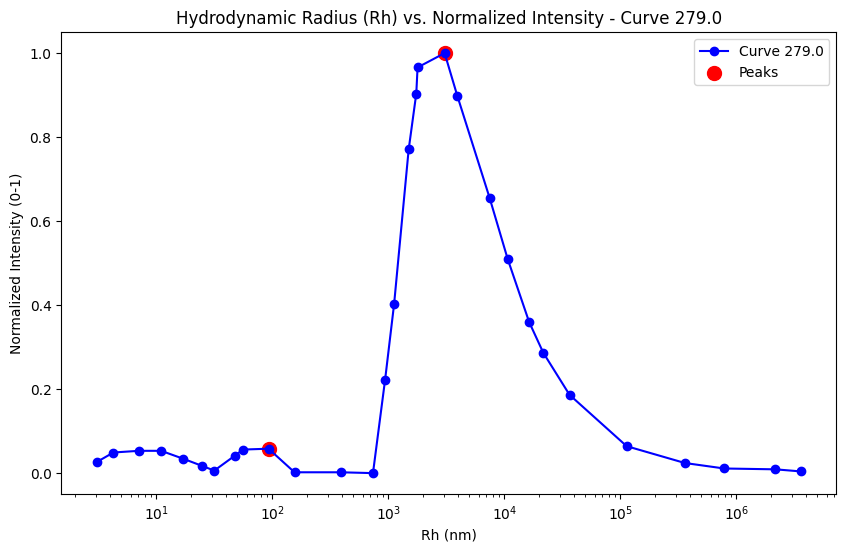

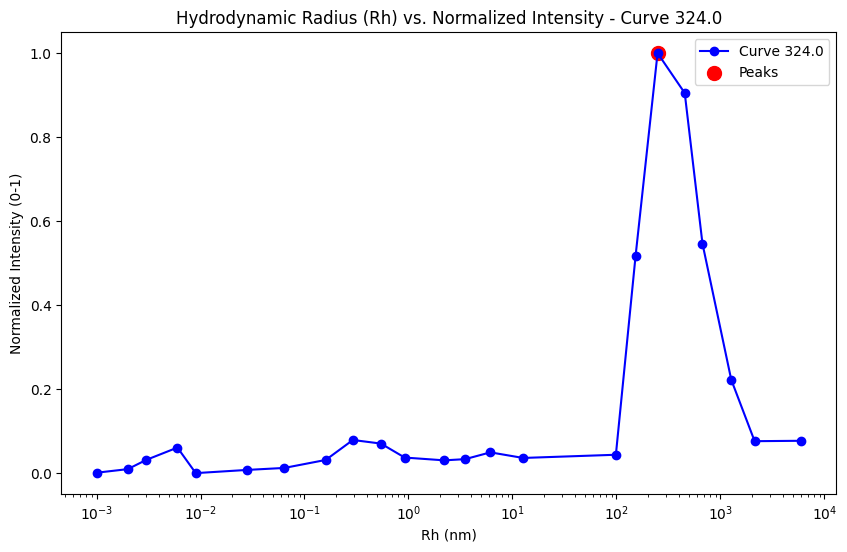

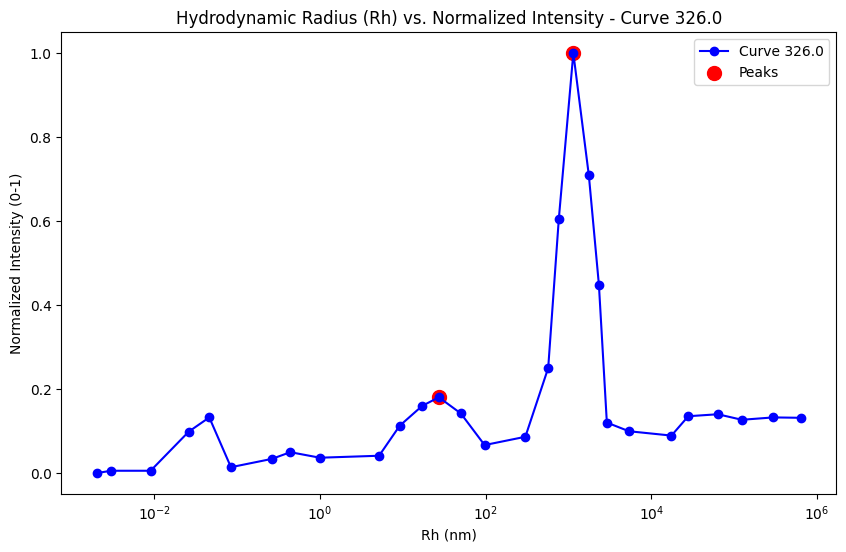

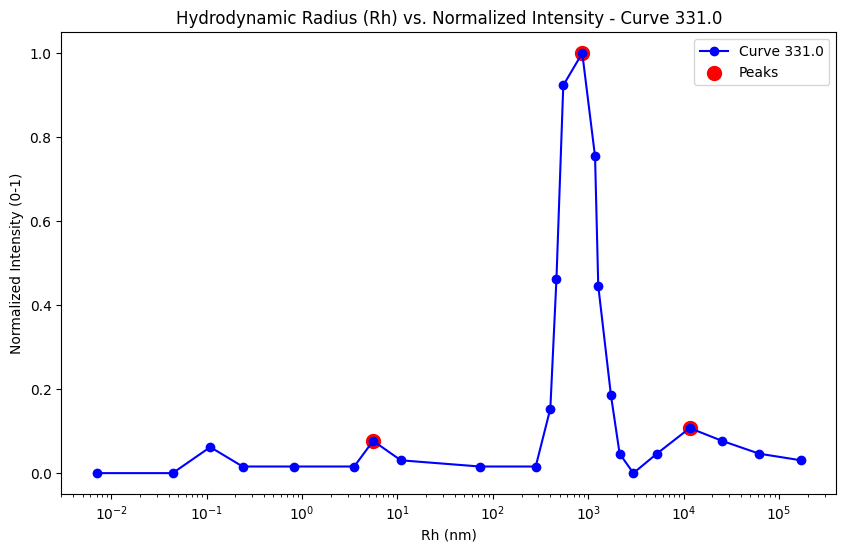

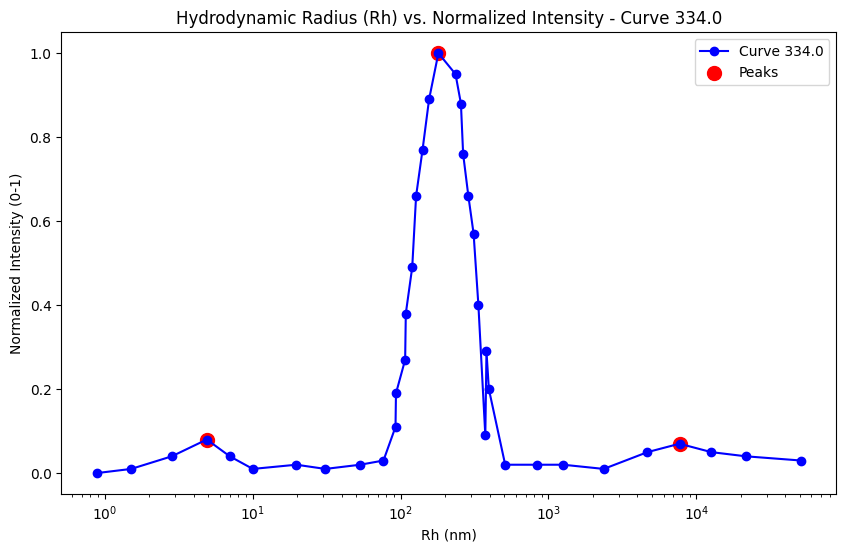

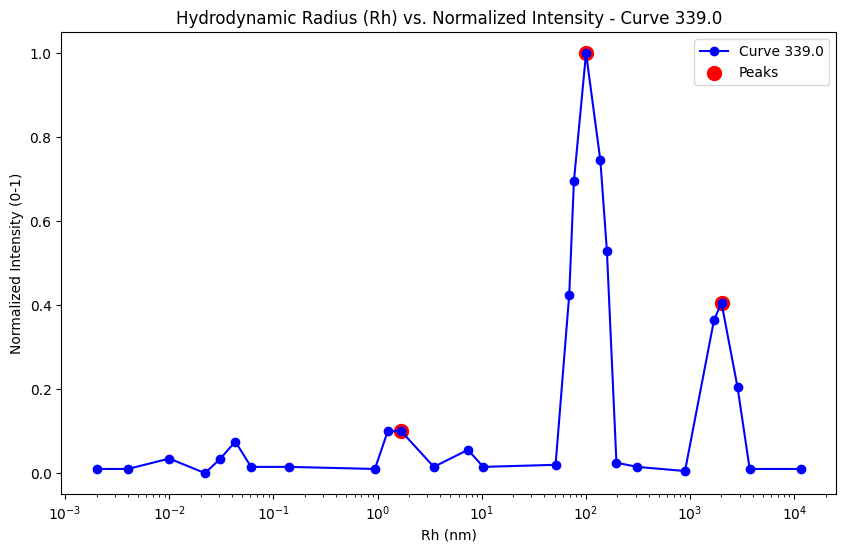

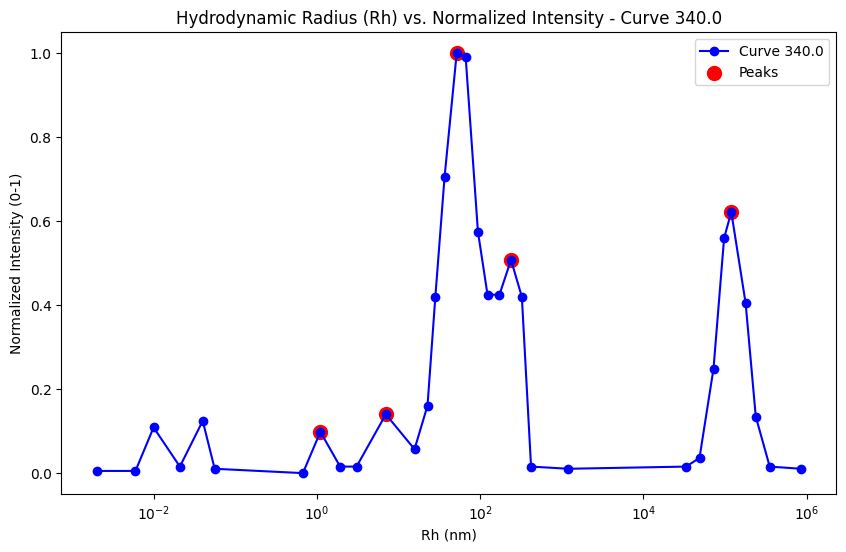

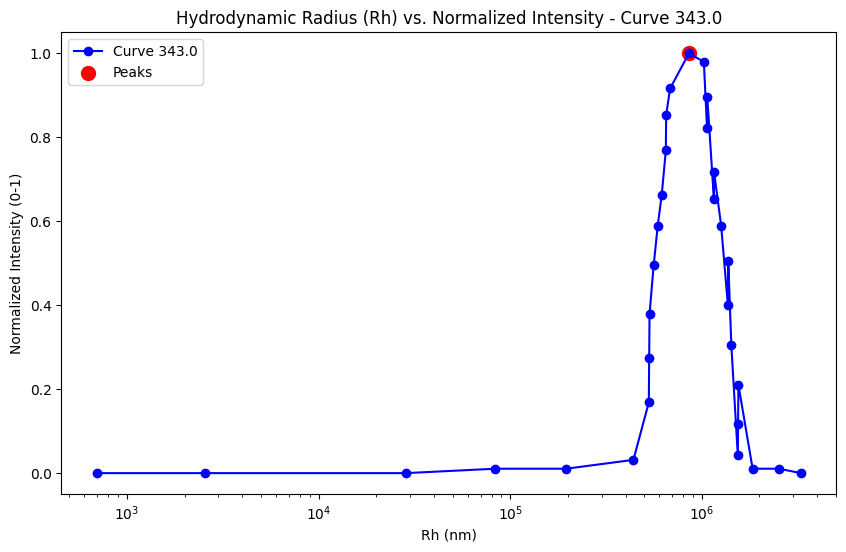

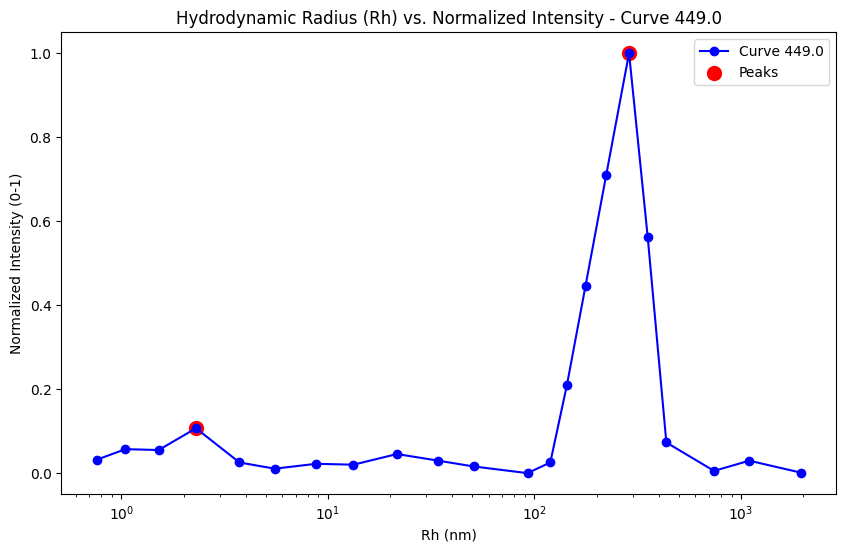

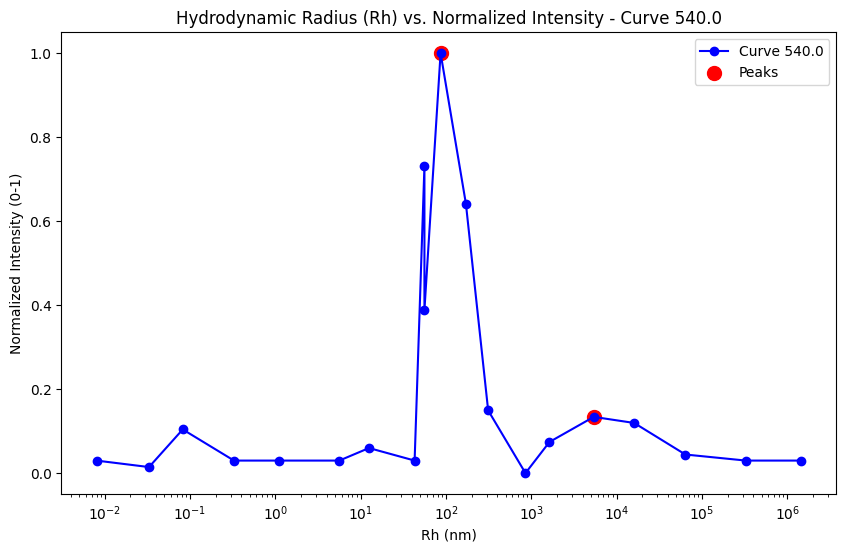

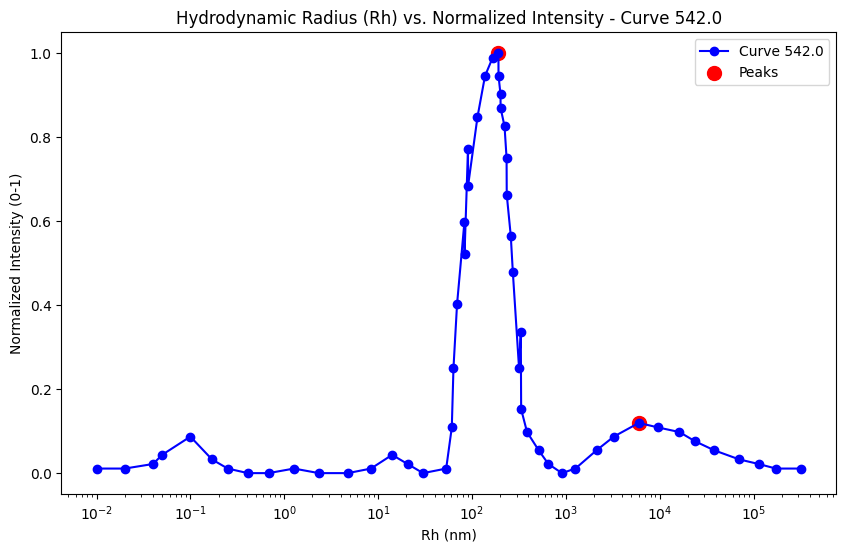

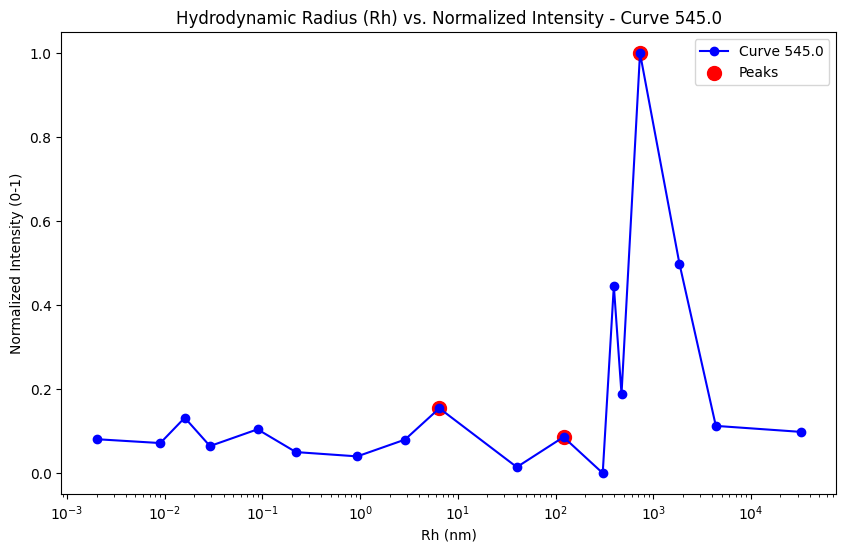

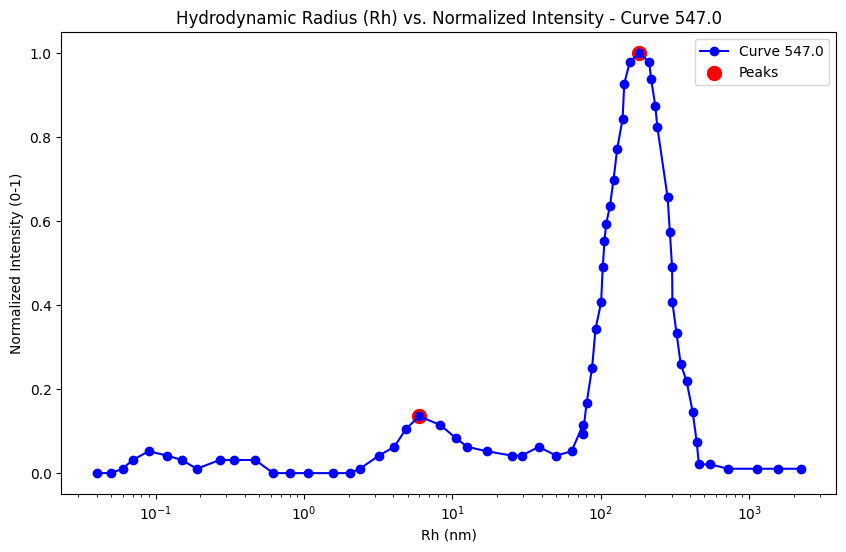

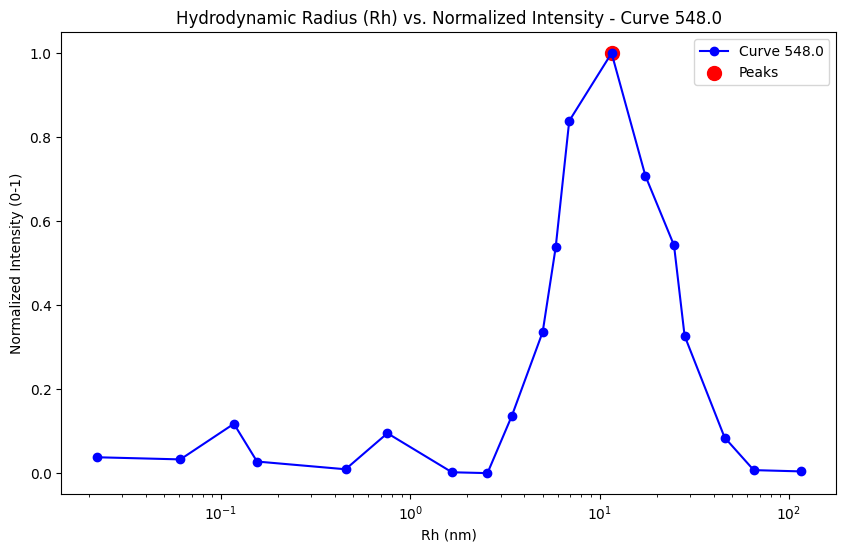

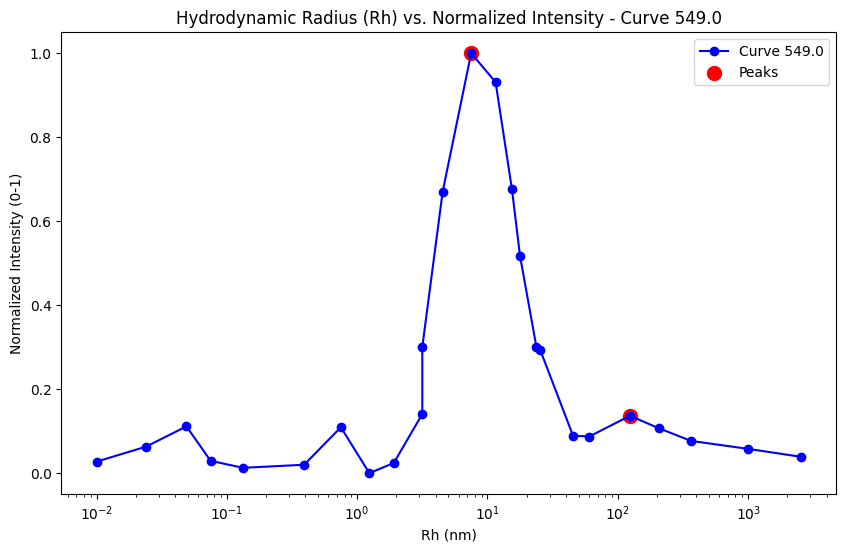

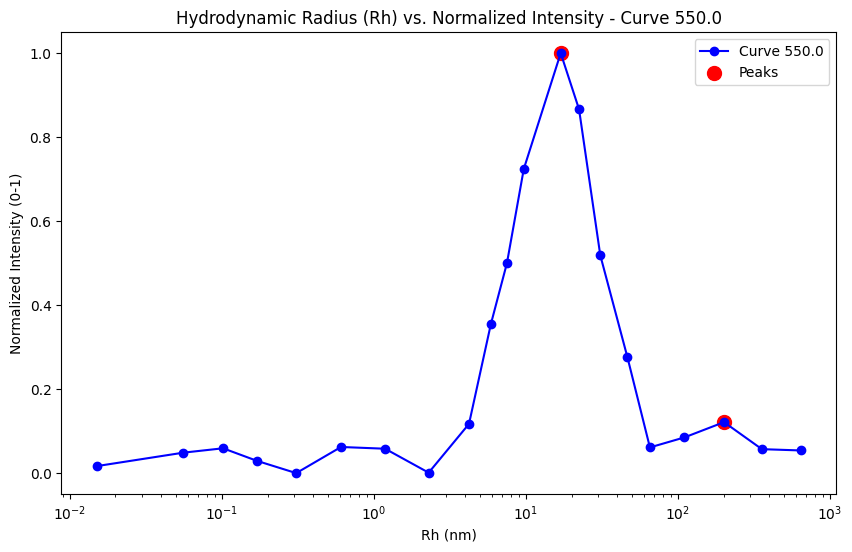

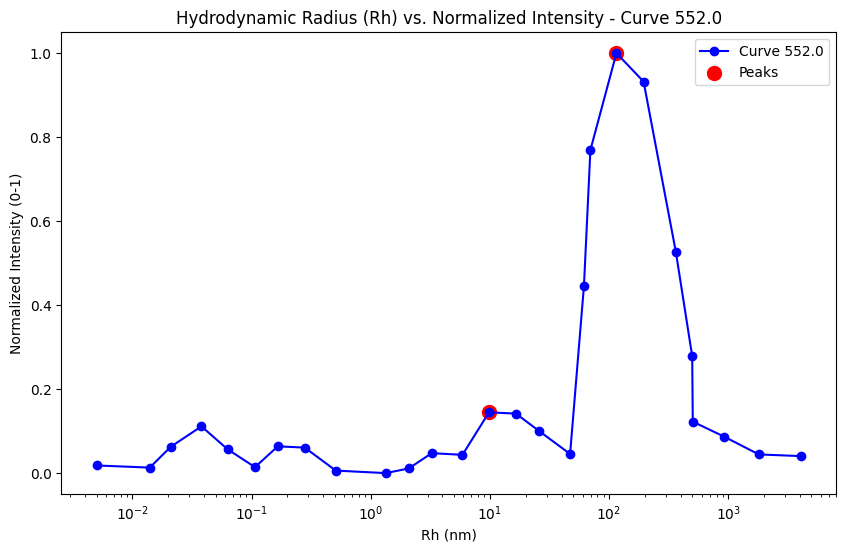

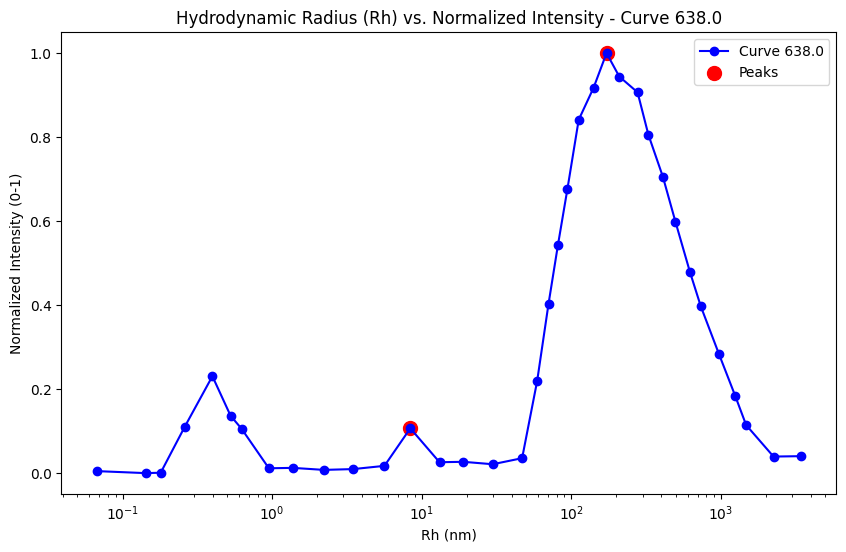

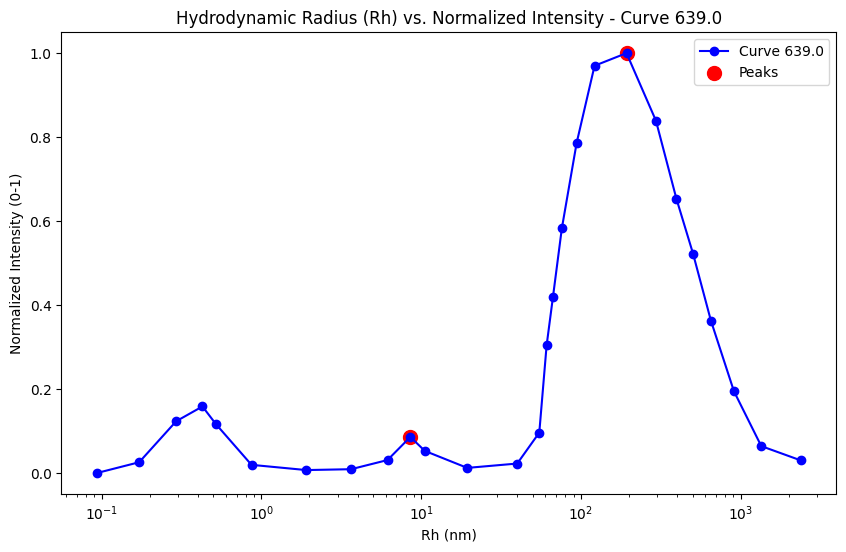

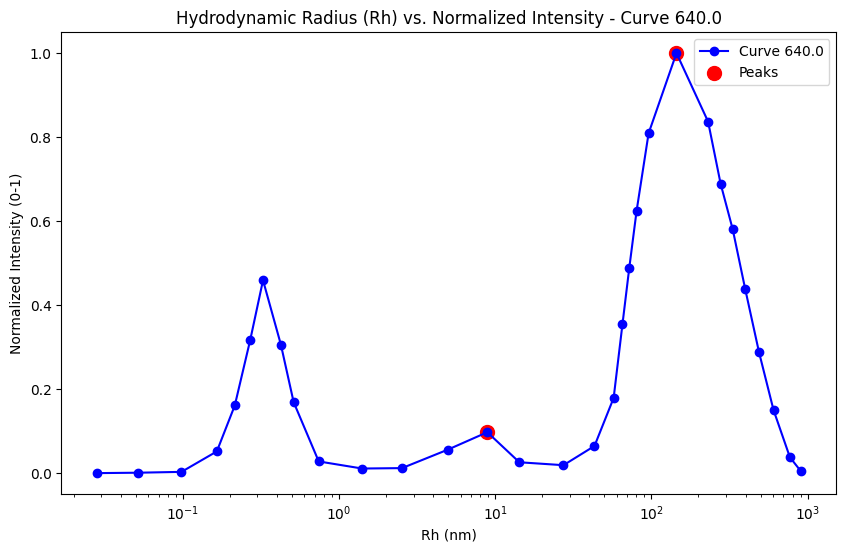

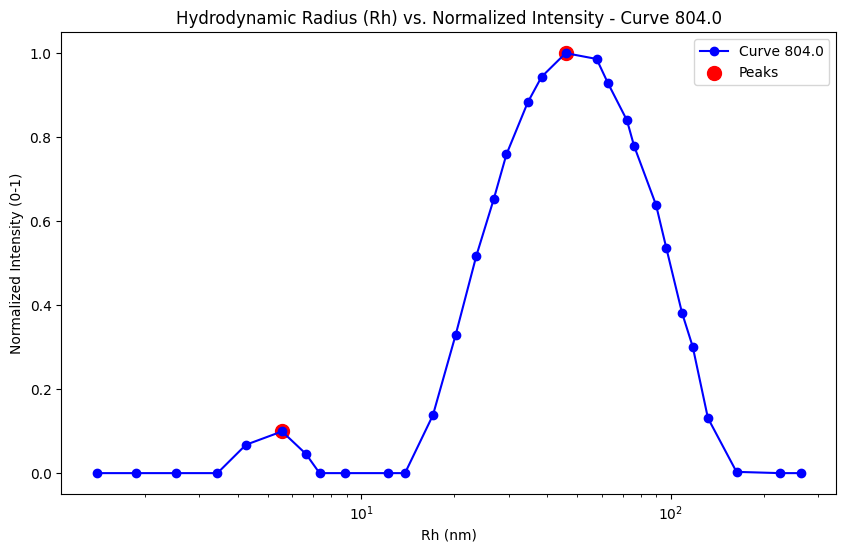

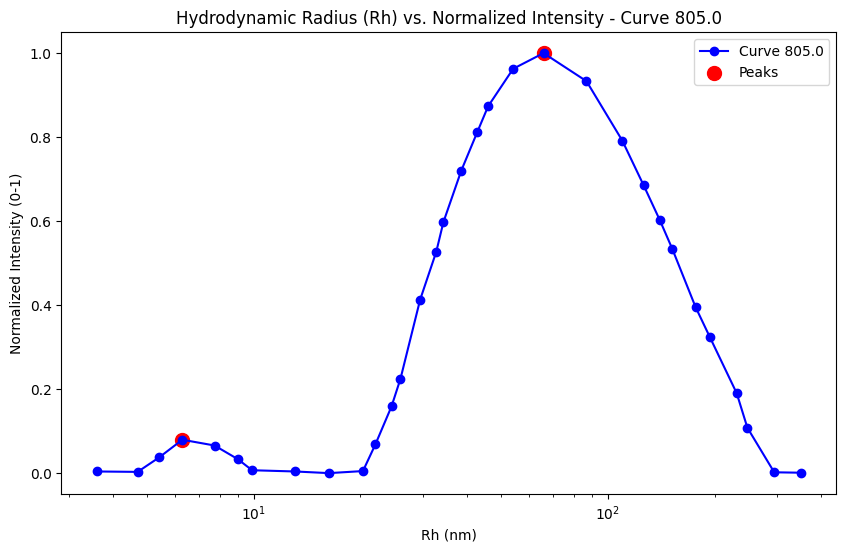

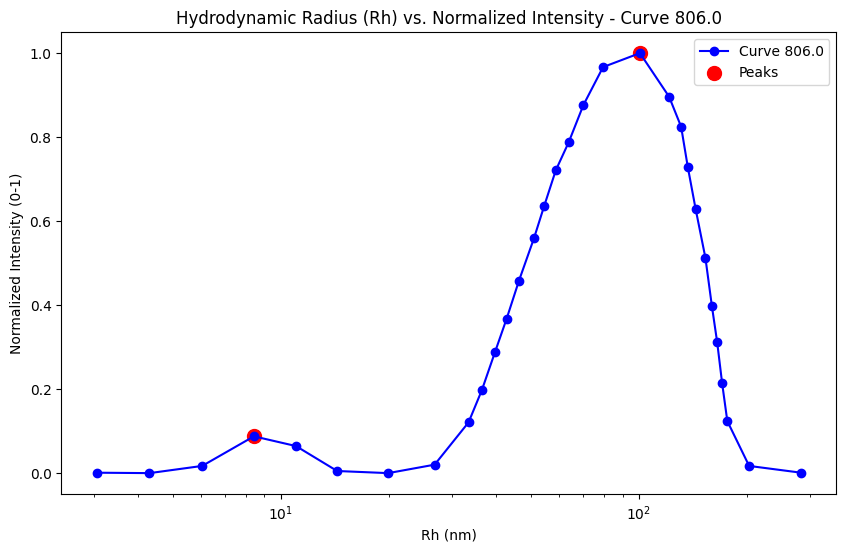

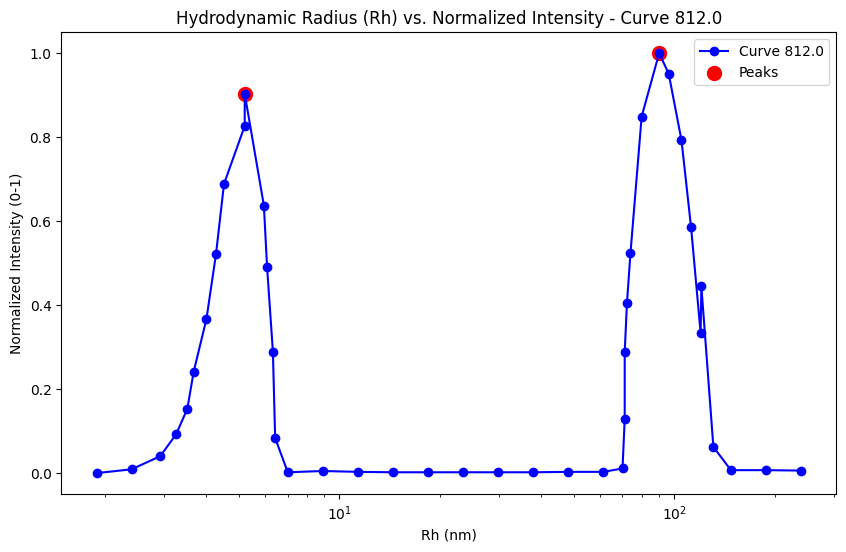

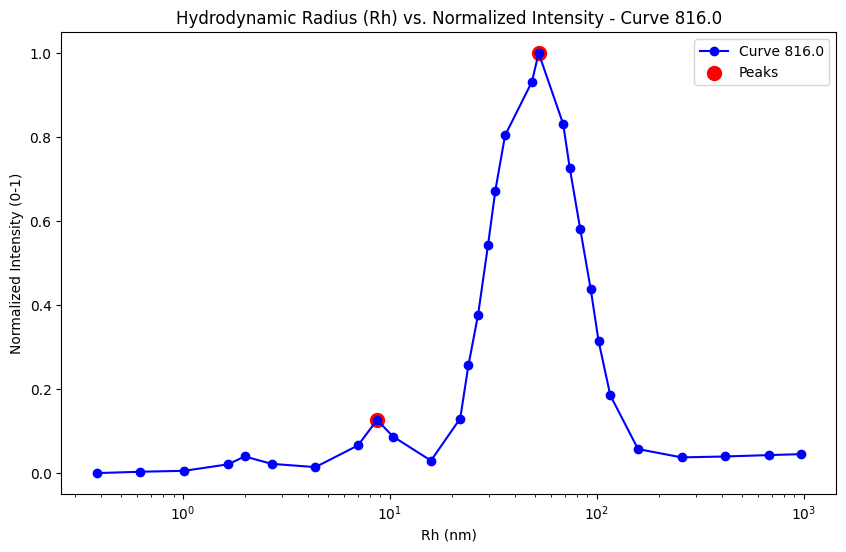

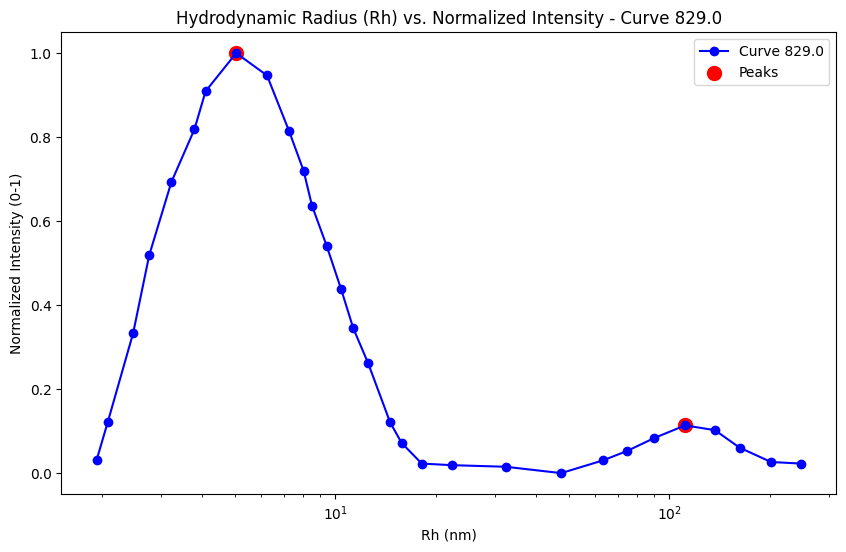

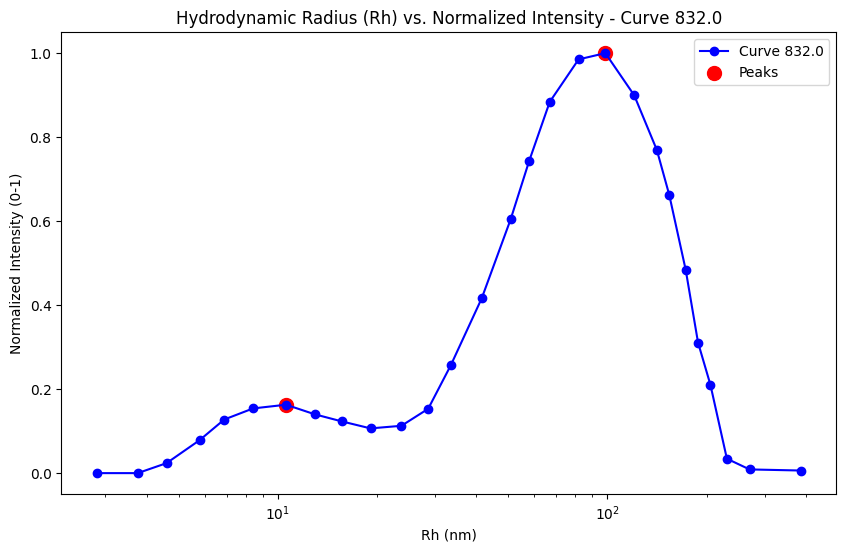

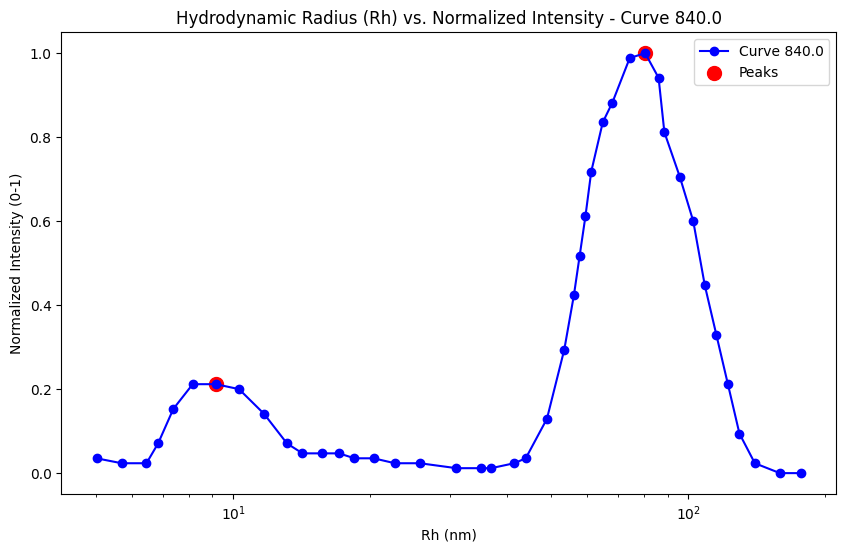

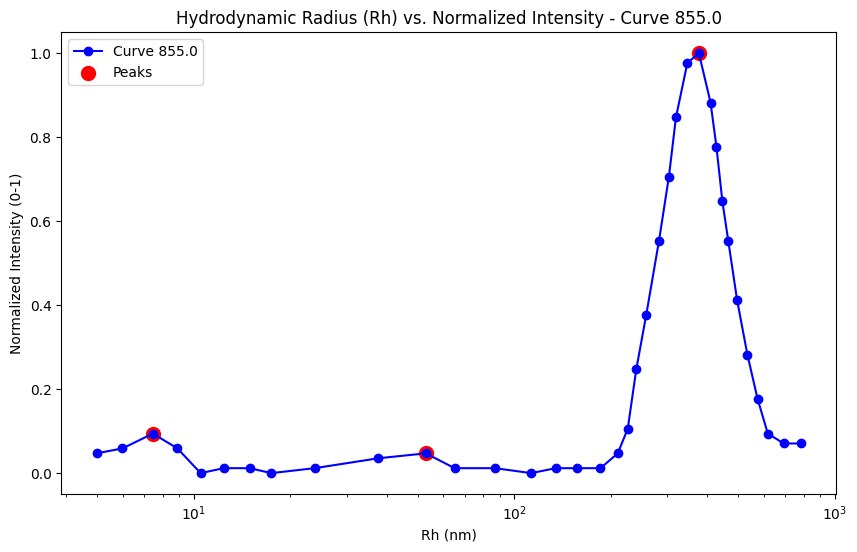

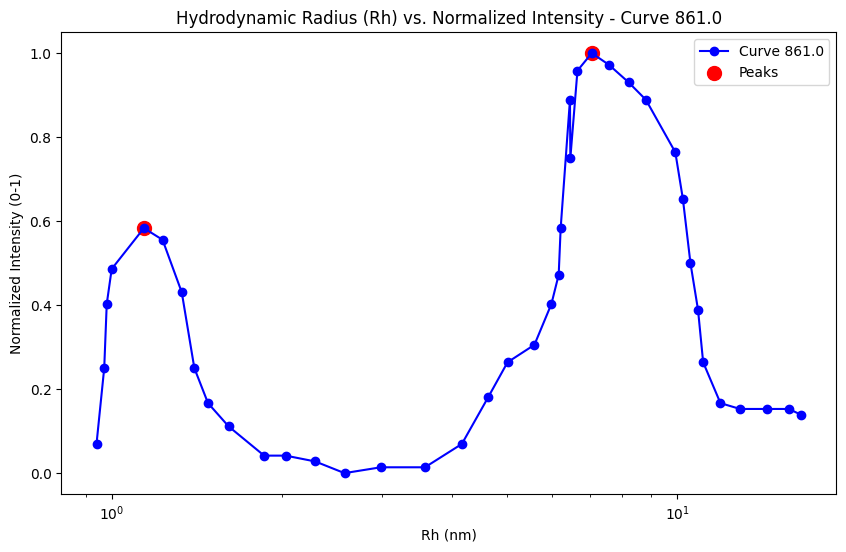

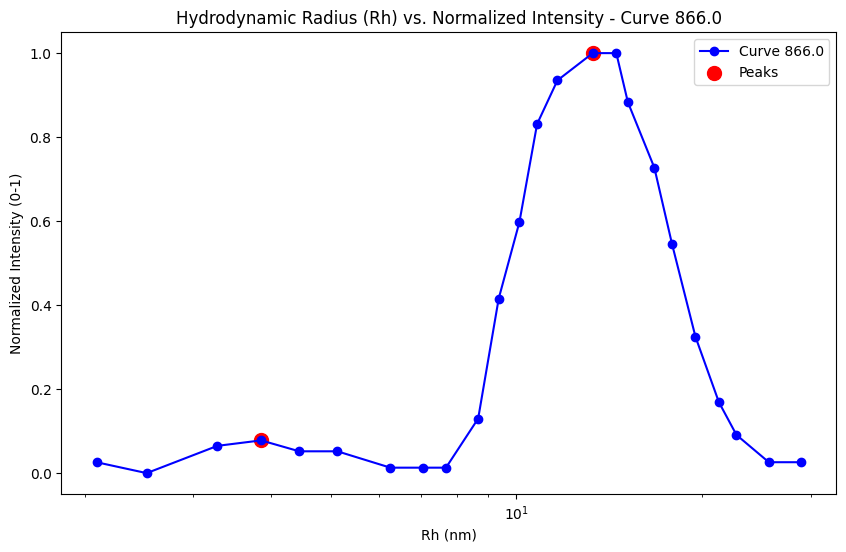

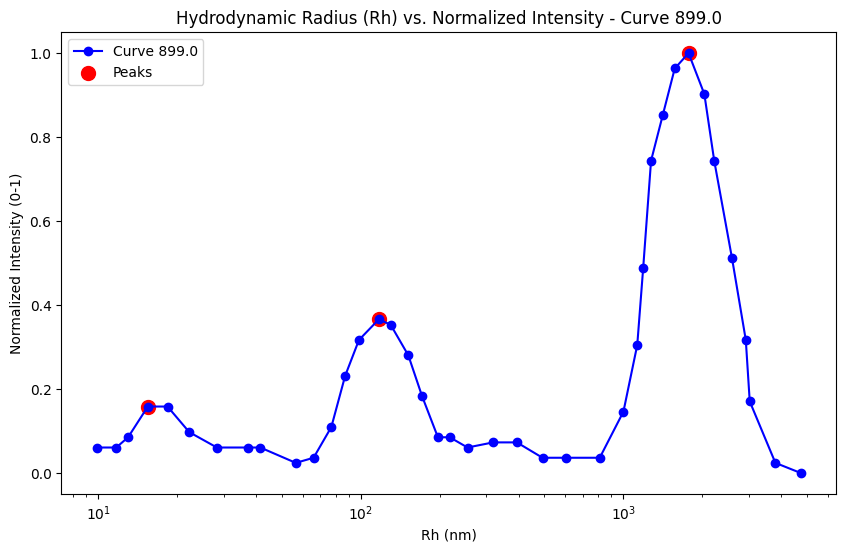

In [75]:
visualize_curves(manual_handle_data,peak="peaks_above_one",rh_col="Rh (above 1 nm) at peaks")

In [76]:
def replace_peaks_and_rh(row, df2, peak, rh_col):
    matched_index = row['matched index']

    # Check if the matched index exists in df2
    matching_row = df2[df2['matched index'] == matched_index]

    if not matching_row.empty:
        # If a match is found, update peaks and Rh at peaks
        row[peak] = matching_row[peak].values[0]
        row[rh_col] = matching_row[rh_col].values[0]

    return row

# Apply the function to update df1
derived_peaks_df_updated = derived_peaks_df.apply(lambda row: replace_peaks_and_rh(row, manual_handle_data,peak='peaks_above_one',rh_col ='Rh (above 1 nm) at peaks'), axis=1)
derived_peaks_df_updated = derived_peaks_df_updated.apply(lambda row: replace_peaks_and_rh(row, manual_handle_data_all_rh, peak='peaks',rh_col ='Rh at peaks' ), axis=1)


In [77]:
Rh_columns_to_map = [
  "peaks_above_one",
  "Rh (above 1 nm) at peaks",
  "peaks",
  "Rh at peaks"
  ]


def add_match_new_columns(row, ref_data, new_cols):
    matched_index = row['matched index']
    matching_row = ref_data[ref_data['matched index'] == matched_index]

    if not matching_row.empty:
        for col in new_cols:
           row[col] = matching_row[col].values[0]
    return row

for col in Rh_columns_to_map:
    pls_data_cleaned[col] = None

In [78]:
pls_data_cleaned = pls_data_cleaned.apply(lambda row: add_match_new_columns(row, derived_peaks_df_updated,new_cols=Rh_columns_to_map), axis=1)

In [79]:
pls_data_cleaned = pls_data_cleaned.rename(columns={'peaks_above_one': 'peak index (above 1 nm)', 'Rh (above 1 nm) at peaks': 'Rh at peaks (above 1 nm)','peaks':'peak index' })

In [80]:
type(pls_data_cleaned.loc[4]["Rh at peaks (above 1 nm)"])

list

In [81]:
pls_data_cleaned['Rh at peaks (above 1 nm)'] = pls_data_cleaned['Rh at peaks (above 1 nm)'].combine_first(
    pls_data_cleaned['Rh (IW avg log)']
).apply(lambda x: x if isinstance(x, list) else [x] if not pd.isna(x) else None)

In [82]:
pls_data_cleaned.to_pickle(data_folder/'dataset_wo_block_cp_(fp-hsp)_added_additive_dropped_polyHSP_dropped_peaks_appended.pkl')
pls_data_cleaned.to_csv(data_folder/'dataset_wo_block_cp_(fp-hsp)_added_additive_dropped_polyHSP_dropped_peaks_appended.csv')

In [83]:
pls_data_cleaned['Rh at peaks (above 1 nm)'].notna().sum()

np.int64(419)

In [84]:
visualize_curves(derived_peaks_df_updated,peak="peaks_above_one",rh_col="Rh (above 1 nm) at peaks")

Output hidden; open in https://colab.research.google.com to view.

In [85]:
# derived_peaks_df_updated_all.to_pickle(data_folder/'peak information dataset.pkl')

In [86]:
derived_peaks_df_updated['num_peaks(above 1nm)'] = derived_peaks_df_updated['peaks_above_one'].apply(lambda x: len(x))
derived_peaks_df_updated['num_peaks'] = derived_peaks_df_updated['peaks'].apply(lambda x: len(x))

peak_counts_all = derived_peaks_df_updated['num_peaks'].value_counts()
peak_counts_df_all = pd.DataFrame({'num_peaks': peak_counts_all.index, 'count': peak_counts_all.values}).sort_values(by='num_peaks')

peak_counts = derived_peaks_df_updated['num_peaks(above 1nm)'].value_counts()
peak_counts_df = pd.DataFrame({'num_peaks(above 1nm)': peak_counts.index, 'count': peak_counts.values}).sort_values(by='num_peaks(above 1nm)')
peak_counts_df

num_peaks(above 1nm)  count
1                     1     92
0                     2    127
2                     3     38
3                     4      2
4                     5      1

### visualization

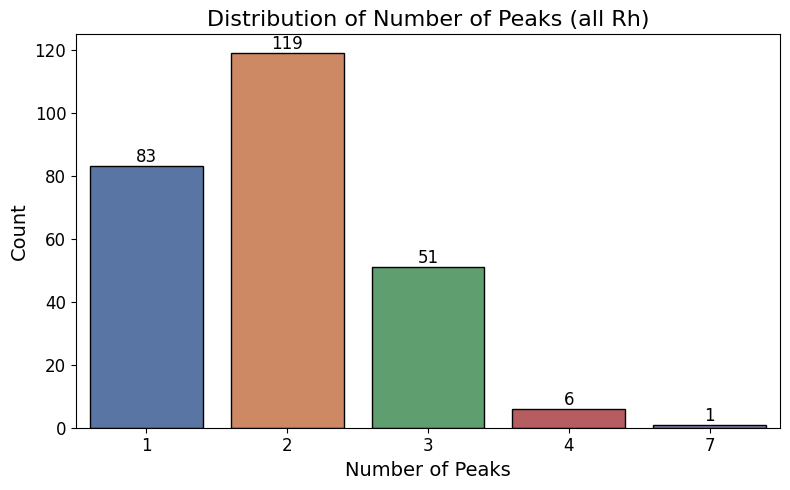

In [87]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='num_peaks', y='count', data=peak_counts_df_all, palette='deep', edgecolor='black')

# Add annotations to each bar
for bar, count in zip(ax.patches, peak_counts_df_all['count']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x position (center of the bar)
        bar.get_height() ,              # y position (just above the bar)
        str(count),                        # annotation text
        ha='center',                       # horizontal alignment
        va='bottom',                       # vertical alignment
        fontsize=12                        # font size
    )

# Customize the plot
ax.set_xlabel("Number of Peaks", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Distribution of Number of Peaks (all Rh)", fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Show the plot
plt.tight_layout()
plt.show()

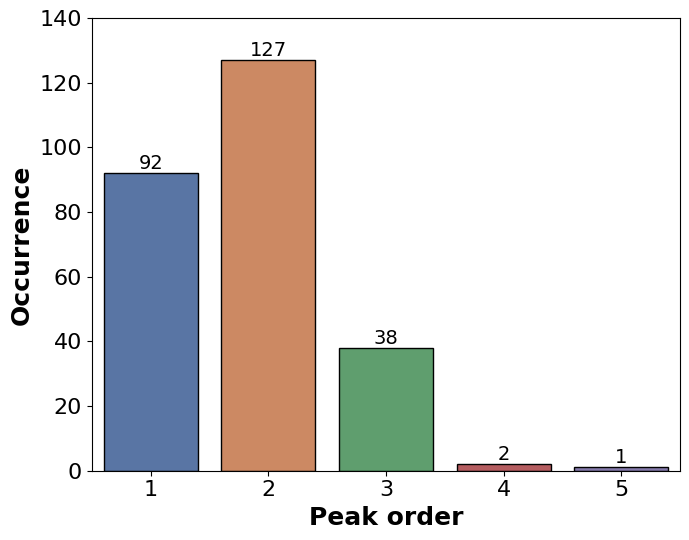

In [105]:
"Number of peaks for each mode"
plt.figure(figsize=(7, 5.5))
ax = sns.barplot(x='num_peaks(above 1nm)', y='count', data=peak_counts_df, palette='deep', edgecolor='black')

# Add annotations to each bar
for bar, count in zip(ax.patches, peak_counts_df['count']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x position (center of the bar)
        bar.get_height() ,              # y position (just above the bar)
        str(count),                        # annotation text
        ha='center',                       # horizontal alignment
        va='bottom',                       # vertical alignment
        fontsize=14                        # font size
    )

# Customize the plot
ax.set_xlabel("Peak order", fontsize=18,fontweight='bold')
ax.set_ylabel("Occurrence", fontsize=18,fontweight='bold')
ax.set_title("", fontsize=22)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(0,140)

# Show the plot
plt.tight_layout()
plt.show()

### in depth data analysis

In [89]:
pls_data_cleaned[pls_data_cleaned['matched index'].isna()]

name  Mw (g/mol)    Mn (g/mol)   PDI Regioregularity R%      DP  \
0     MEH-PPV    611000.0           NaN   NaN                NaN  2350.0   
1     BEH-PPV    306000.0           NaN   NaN                NaN   854.0   
2    BCHA-PPV    920000.0           NaN   NaN                NaN  1055.0   
9         PFO     46000.0           NaN   NaN                NaN     NaN   
11        PFO     46000.0           NaN   NaN                NaN     NaN   
..        ...         ...           ...   ...                ...     ...   
728      P3BT     41000.0  17826.086957  2.30                 85     NaN   
729       PM6     69600.0  30000.000000  2.32                NaN     NaN   
730      P3HT     30960.0  18000.000000  1.72                NaN     NaN   
731   P5TCN-r     52210.0  23000.000000  2.27                NaN     NaN   
732     P5TCN     48720.0  24000.000000  2.03                NaN     NaN   

     SANS  SAXS/GWAXS  DLS  SLS  ...  polymer dH        Ra  \
0       0           0  1.0    1  ...        4.00  2.774887   
1       0           0  1.0    1  ...        3.10  2.193171   
2       0           0  1.0    1  ...        1.00  2.714774   
9       0           0  1.0    1  ...        0.90  7.408956   
11      0           0  1.0    1  ...        0.90  7.408956   
..    ...         ...  ...  ...  ...         ...       ...   
728     0           1  0.0    0  ...        4.60  4.093898   
729     1           0  0.0    0  ...        4.29  2.430658   
730     1           0  0.0    0  ...        4.30  1.615549   
731     1           0  0.0    0  ...        5.50  1.835756   
732     1           0  0.0    0  ...        4.85  1.088577   

     abs(solvent dD - polymer dD)  abs(solvent dP - polymer dP)  \
0                           0.400                         2.500   
1                           0.800                         1.500   
2                           0.500                         1.400   
9                           0.026                         2.842   
11                          0.026                         2.842   
..                            ...                           ...   
728                         1.300                         1.800   
729                         0.700                         1.400   
730                         0.200                         0.700   
731                         0.900                         0.300   
732                         0.100                         0.650   

    abs(solvent dH - polymer dH)  log Rg (nm)  peak index (above 1 nm)  \
0                          0.900          NaN                     None   
1                          0.000          NaN                     None   
2                          2.100          NaN                     None   
9                          6.842          NaN                     None   
11                         6.842          NaN                     None   
..                           ...          ...                      ...   
728                        2.600          NaN                     None   
729                        1.410          NaN                     None   
730                        1.400          NaN                     None   
731                        0.200          NaN                     None   
732                        0.850          NaN                     None   

    Rh at peaks (above 1 nm) peak index  Rh at peaks  
0                     [35.9]       None         None  
1                     [19.8]       None         None  
2                     [33.7]       None         None  
9                    [838.0]       None         None  
11                   [781.0]       None         None  
..                       ...        ...          ...  
728                     None       None         None  
729                     None       None         None  
730                     None       None         None  
731                     None       None         None  
732                     None       None         None

In [90]:
pls_data_cleaned_text_only = pls_data_cleaned[pls_data_cleaned['matched index'].isna() & pls_data_cleaned['Rh at peaks (above 1 nm)'].notna()]
pls_data_cleaned_text_only


name  Mw (g/mol)  Mn (g/mol)  PDI Regioregularity R%      DP  SANS  \
0     MEH-PPV    611000.0         NaN  NaN                NaN  2350.0     0   
1     BEH-PPV    306000.0         NaN  NaN                NaN   854.0     0   
2    BCHA-PPV    920000.0         NaN  NaN                NaN  1055.0     0   
9         PFO     46000.0         NaN  NaN                NaN     NaN     0   
11        PFO     46000.0         NaN  NaN                NaN     NaN     0   
..        ...         ...         ...  ...                ...     ...   ...   
631     4BCMU         NaN         NaN  NaN                NaN  2400.0     0   
632     4BCMU         NaN         NaN  NaN                NaN  2400.0     0   
633     4BCMU         NaN         NaN  NaN                NaN  2400.0     0   
634     4BCMU         NaN         NaN  NaN                NaN  2400.0     0   
669      P3HT     24000.0     16000.0  1.5                NaN     NaN     0   

     SAXS/GWAXS  DLS  SLS  ...  polymer dH        Ra  \
0             0  1.0    1  ...         4.0  2.774887   
1             0  1.0    1  ...         3.1  2.193171   
2             0  1.0    1  ...         1.0  2.714774   
9             0  1.0    1  ...         0.9  7.408956   
11            0  1.0    1  ...         0.9  7.408956   
..          ...  ...  ...  ...         ...       ...   
631           0  1.0    0  ...         7.3  9.310746   
632           0  1.0    0  ...         7.3  9.310746   
633           0  1.0    0  ...         7.3  9.310746   
634           0  1.0    0  ...         7.3  9.310746   
669           0  1.0    1  ...         4.3  5.209607   

     abs(solvent dD - polymer dD)  abs(solvent dP - polymer dP)  \
0                           0.400                         2.500   
1                           0.800                         1.500   
2                           0.500                         1.400   
9                           0.026                         2.842   
11                          0.026                         2.842   
..                            ...                           ...   
631                         1.300                         7.200   
632                         1.300                         7.200   
633                         1.300                         7.200   
634                         1.300                         7.200   
669                         0.800                         3.300   

    abs(solvent dH - polymer dH)  log Rg (nm)  peak index (above 1 nm)  \
0                          0.900          NaN                     None   
1                          0.000          NaN                     None   
2                          2.100          NaN                     None   
9                          6.842          NaN                     None   
11                         6.842          NaN                     None   
..                           ...          ...                      ...   
631                        5.300          NaN                     None   
632                        5.300          NaN                     None   
633                        5.300          NaN                     None   
634                        5.300          NaN                     None   
669                        3.700          NaN                     None   

    Rh at peaks (above 1 nm) peak index  Rh at peaks  
0                     [35.9]       None         None  
1                     [19.8]       None         None  
2                     [33.7]       None         None  
9                    [838.0]       None         None  
11                   [781.0]       None         None  
..                       ...        ...          ...  
631                 [108.01]       None         None  
632                [114.065]       None         None  
633                [111.915]       None         None  
634                   [20.9]       None         None  
669                   [87.0]       None         None  

[159 rows x 178 columns]

In [133]:
monomodal_text = [peaks[0] for peaks in pls_data_cleaned_text_only["Rh at peaks (above 1 nm)"]]
first_order = [sorted(peaks)[0] for peaks in derived_peaks_df_updated[derived_peaks_df_updated['num_peaks(above 1nm)']!=1]['Rh (above 1 nm) at peaks']]
second_order = [sorted(peaks)[1] for peaks in derived_peaks_df_updated[derived_peaks_df_updated['num_peaks(above 1nm)']!=1]['Rh (above 1 nm) at peaks']]
third_order = [sorted(peaks)[2] for peaks in derived_peaks_df_updated[derived_peaks_df_updated['num_peaks(above 1nm)'] != 1]['Rh (above 1 nm) at peaks'] if len(peaks) > 2]
forth_order = [sorted(peaks)[3] for peaks in derived_peaks_df_updated[derived_peaks_df_updated['num_peaks(above 1nm)'] != 1]['Rh (above 1 nm) at peaks'] if len(peaks) > 3]
fifth_order = [sorted(peaks)[4] for peaks in derived_peaks_df_updated[derived_peaks_df_updated['num_peaks(above 1nm)'] != 1]['Rh (above 1 nm) at peaks'] if len(peaks) > 4]
first_order_just_mono = [sorted(peaks)[0] for peaks in derived_peaks_df_updated[derived_peaks_df_updated['num_peaks(above 1nm)']==1]['Rh (above 1 nm) at peaks']]
first_order_mono_included = [sorted(peaks)[0] for peaks in derived_peaks_df_updated['Rh (above 1 nm) at peaks']]


distribution_data_first_order = pd.DataFrame({
    'value': first_order_just_mono + first_order,
    'data type': ['just_mono'] * len(first_order_just_mono) + ['excluded_mono'] * len(first_order)
})

distribution_peaks = pd.DataFrame({
    'value': monomodal_text + first_order + second_order + third_order + forth_order + fifth_order,
    'Peak type': (['Single (text)'] * len(monomodal_text)+
                  ['1st'] * len(first_order) +
                  ['2nd'] * len(second_order) +
                  ['3rd'] * len(third_order) +
                  ['4th'] * len(forth_order) +
                  ['5th'] * len(fifth_order))
                  })

def plot_peaks_distribution(
                            data,
                            title: str,
                            x_label: str,
                            transform_function: callable=None,
                            hue: str=None,
                            legend_fontsize: int = 16,
                            legend_title_fontsize: int = 18
                            ) -> None:

    fig, ax = plt.subplots(figsize=(8, 6))
    df = data.copy()
    if transform_function:
        df['transformed_value'] = transform_function(df['value'])
        data_column = 'transformed_value'
    else:
        data_column = 'value'

    sns.histplot(data=df, x=data_column, kde=False, hue=hue, ax=ax)
    ax.set_xlabel(x_label, fontsize=22, fontweight='bold')
    ax.set_ylabel('Occurrence', fontsize=22, fontweight='bold')
    ax.tick_params(axis='both', labelsize=20)

    leg = ax.get_legend()
    if leg:
        for text in leg.get_texts():
            text.set_fontsize(legend_fontsize-2)
        leg.get_title().set_fontsize(legend_title_fontsize)

    box_inset = ax.inset_axes([0.01, -0.38, 0.99, 0.2])
    sns.boxplot(x=data_column, data=df, hue=hue, ax=box_inset)
    box_inset.set(yticks=[], xlabel=None)
    box_inset.legend_.remove()
    box_inset.tick_params(axis='x', labelsize=17)
    plt.show()


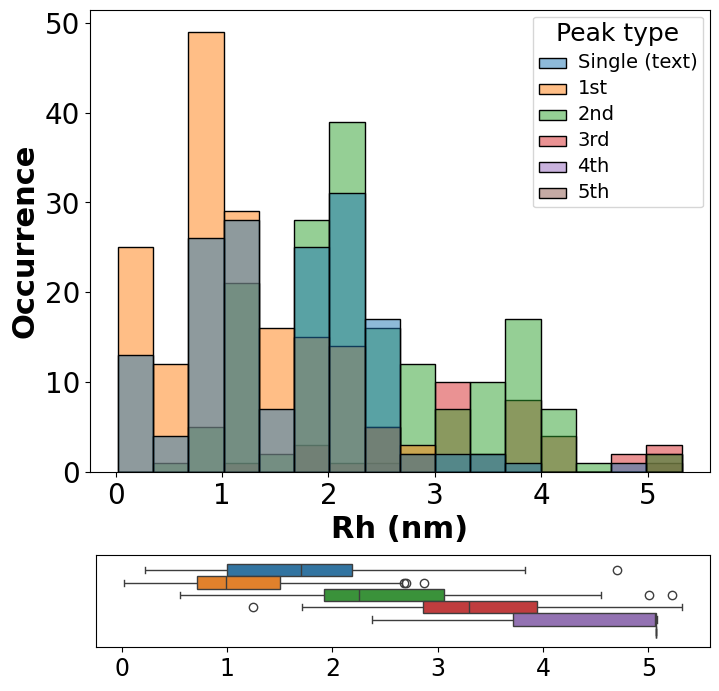

In [134]:
plot_peaks_distribution(distribution_peaks, title="Distribution of different ordred of peaks", transform_function=np.log10, hue='Peak type',x_label="Rh (nm)")

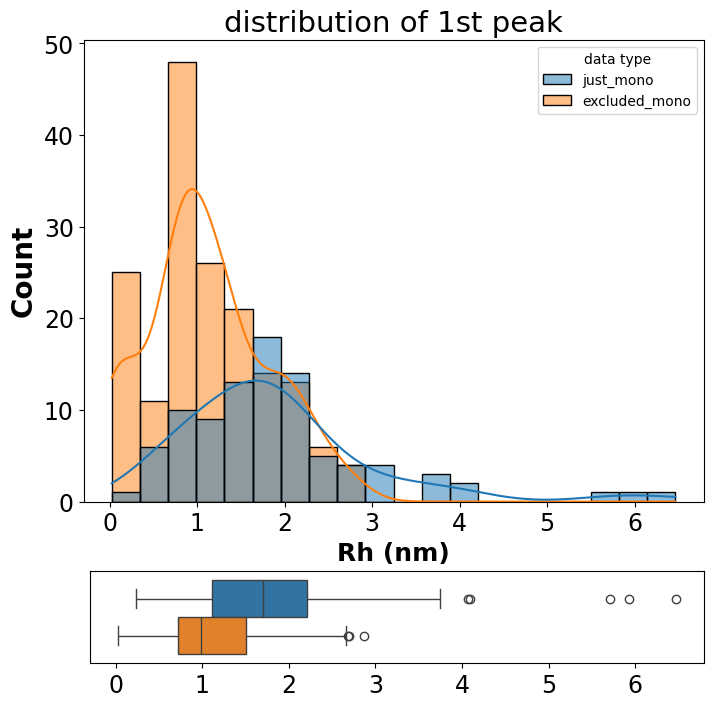

In [93]:
plot_peaks_distribution(distribution_data_first_order, title="distribution of 1st peak", transform_function=np.log10, hue='data type',x_label="Rh (nm)")

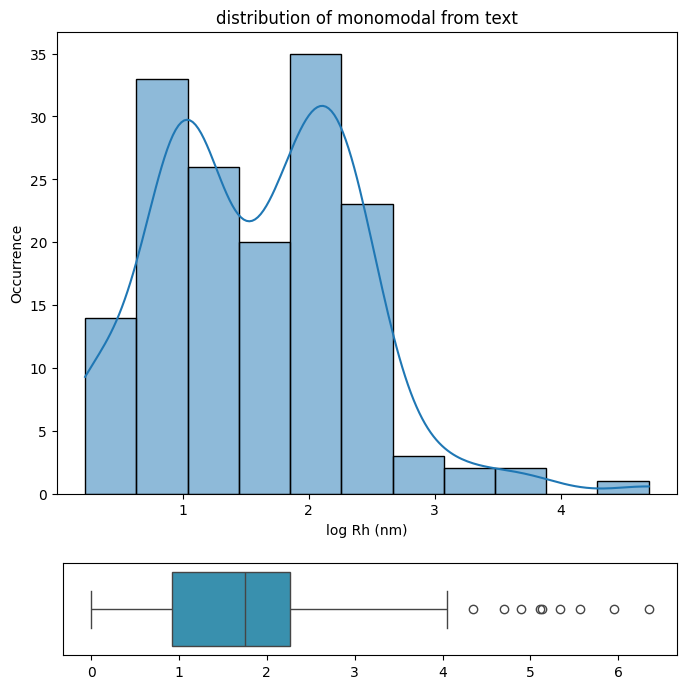

In [94]:
def plot_single_distribution(data,
                            title: str,
                            x_label: str,
                            transform_function: callable=None,
                            ) -> None:
    fig, ax = plt.subplots(figsize=(8, 6))

    df = data.copy()
    if transform_function:
        df = transform_function(df)

    # Plot histogram with KDE
    sns.histplot(df, kde=True, ax=ax)  # kde=True adds a KDE line to the histogram
    ax.set_xlabel('log Rh (nm)')  # Set the label for x-axis
    ax.set_ylabel('Occurrence')    # Set the label for y-axis
    ax.set_title(title)  # Set the title for the plot

    # Create inset box plot
    box_inset = ax.inset_axes([0.01, -0.35, 0.99, 0.2])  # Adjust position for the inset box plot
    sns.boxplot(x=np.log10(analysis_data["Rh1 (nm)"]), ax=box_inset, color='#259AC1')

    # Customize the inset box plot
    box_inset.set(yticks=[], xlabel=None)  # Remove y-ticks and x-label from the box plot
    box_inset.tick_params(axis='x', labelsize=10)

    # Display the plot
    plt.show()

plot_single_distribution(monomodal_text, title="distribution of monomodal from text", transform_function=np.log10, x_label="Rh (nm)")

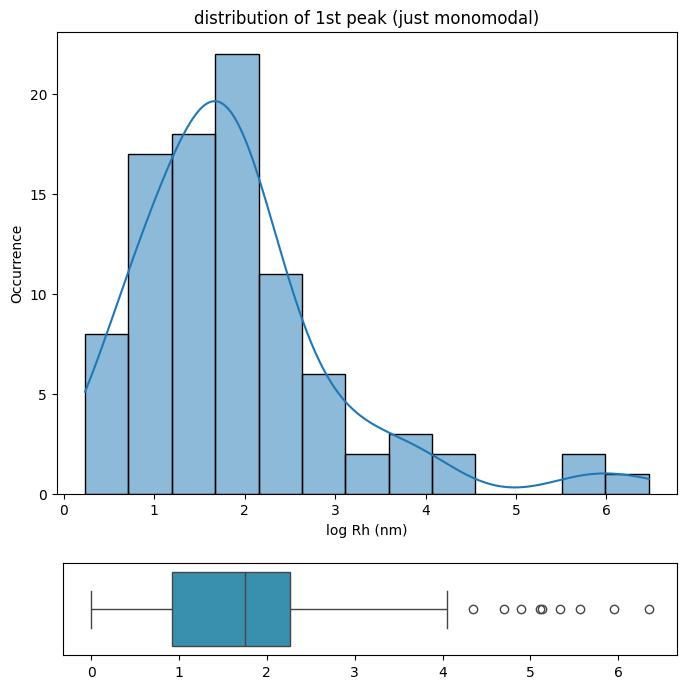

In [95]:
plot_single_distribution(first_order_just_mono, title="distribution of 1st peak (just monomodal)", transform_function=np.log10, x_label="Rh (nm)")

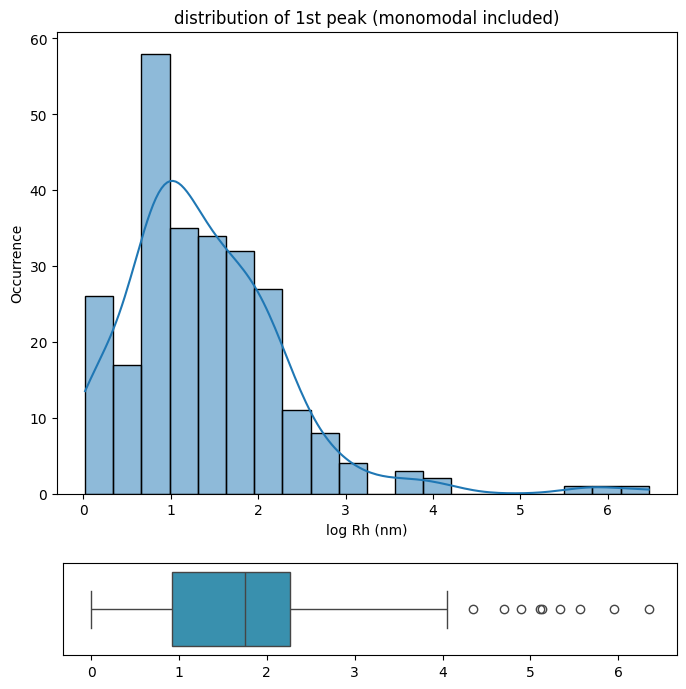

In [96]:
plot_single_distribution(first_order_mono_included, title="distribution of 1st peak (monomodal included)", transform_function=np.log10, x_label="Rh (nm)")

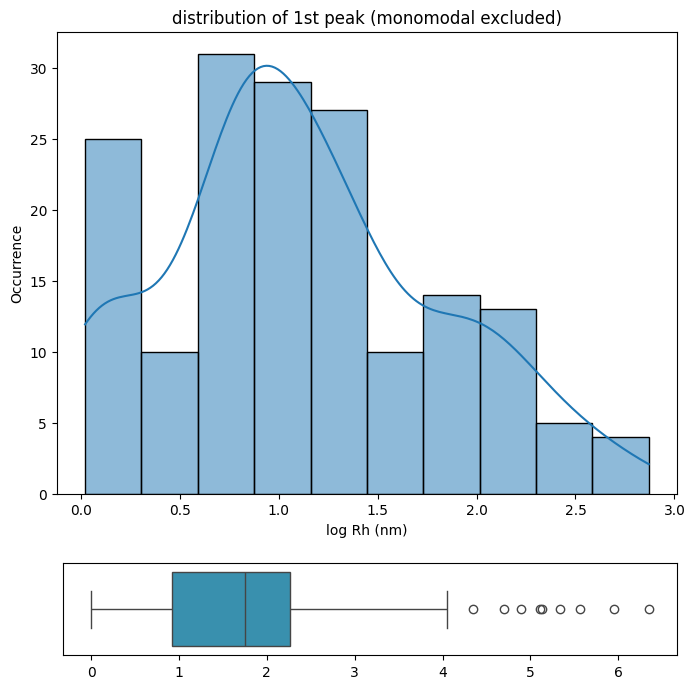

In [97]:
plot_single_distribution(first_order, title="distribution of 1st peak (monomodal excluded)", transform_function=np.log10, x_label="Rh (nm)")

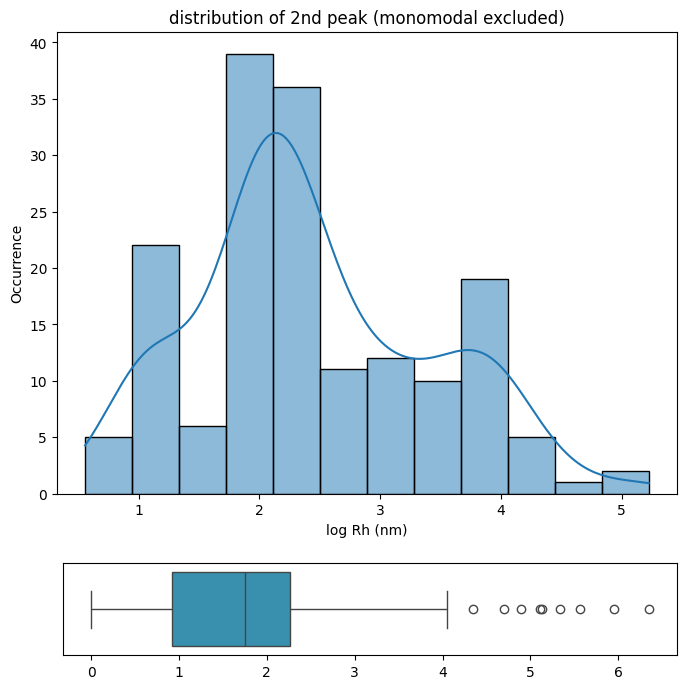

In [98]:
plot_single_distribution(second_order, title="distribution of 2nd peak (monomodal excluded)", transform_function=np.log10, x_label="Rh (nm)")

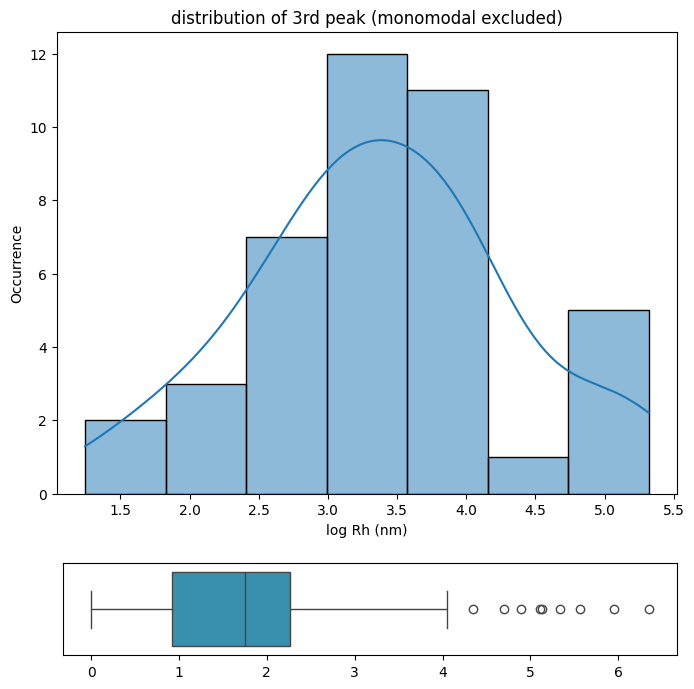

In [99]:
plot_single_distribution(third_order, title="distribution of 3rd peak (monomodal excluded)", transform_function=np.log10, x_label="Rh (nm)")

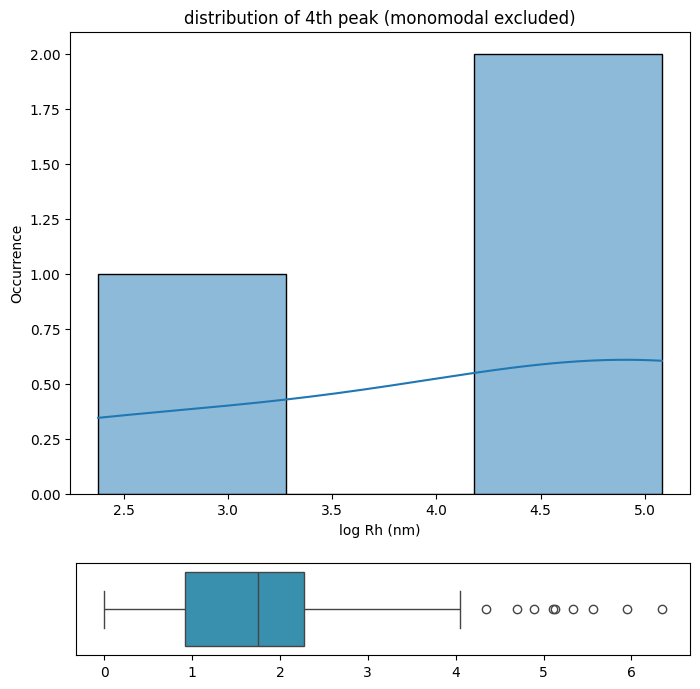

In [100]:
plot_single_distribution(forth_order, title="distribution of 4th peak (monomodal excluded)", transform_function=np.log10, x_label="Rh (nm)")

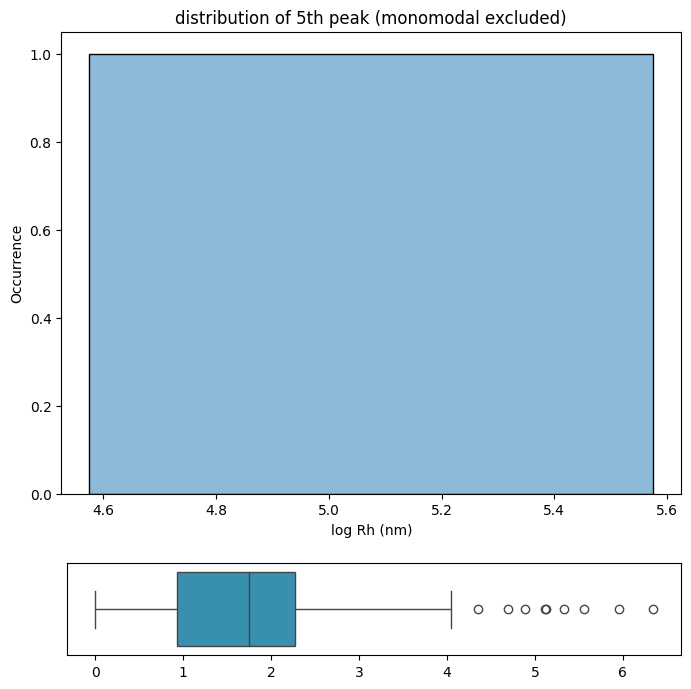

In [101]:
plot_single_distribution(fifth_order, title="distribution of 5th peak (monomodal excluded)", transform_function=np.log10, x_label="Rh (nm)")